In [1]:
import pandas as pd 
import numpy as np
import scipy 
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns 
import statsmodels
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, regularizers, callbacks
import tensorflow as tf


print(f"pandas version = {pd.__version__}")
print(f"numpy version = {np.__version__}")
print(f"scipy version = {scipy.__version__}")
print(f"matplotlib version = {matplotlib.__version__}")
print(f"seaborn version = {sns.__version__}")
print(f"statsmodels version = {statsmodels.__version__}")
print(f"sklearn version = {sklearn.__version__}")
print("\n")

alpha = 0.01
print(f"My significance level for all my hypothesis tests is {100.0*alpha}%")

# Install xgboost
!pip install xgboost
!pip show imbalanced-learn
!pip show scikit-learn
!pip install category_encoders

pandas version = 2.0.3
numpy version = 1.24.3
scipy version = 1.11.1
matplotlib version = 3.7.2
seaborn version = 0.12.2
statsmodels version = 0.14.0
sklearn version = 1.4.2


My significance level for all my hypothesis tests is 1.0%
Name: imbalanced-learn
Version: 0.12.2
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /Users/vuongducthang/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/vuongducthang/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, imbalanced-learn


# Section 1: Preprocessing

## Processing Pesticides Use File

In [2]:
# Read data from CSV file
Pesticides_use = pd.read_csv('Pesticides use - FAOSTAT_data_en_2-27-2024.csv', dtype={'Column14': str}, low_memory=False)

# Handle missing data
Pesticides_use.fillna(0, inplace=True)  # Replace NaN values with 0

# Convert data types
Pesticides_use['Year'] = Pesticides_use['Year'].astype(int)  # Convert 'Year' column to integer type
Pesticides_use['Area'] = Pesticides_use['Area'].str.strip()  # Strip leading and trailing whitespaces in 'Country' column

# Save cleaned data to CSV file without index column
Pesticides_use.to_csv('cleaned_data.csv', index=False)

# Print the cleaned dataset
Pesticides_use

Domain Code          Domain  Area Code (M49)      Area  Element Code  \
0              RP  Pesticides Use                8   Albania          5157   
1              RP  Pesticides Use                8   Albania          5159   
2              RP  Pesticides Use                8   Albania          5173   
3              RP  Pesticides Use                8   Albania          5157   
4              RP  Pesticides Use                8   Albania          5159   
...           ...             ...              ...       ...           ...   
35197          RP  Pesticides Use              716  Zimbabwe          5157   
35198          RP  Pesticides Use              716  Zimbabwe          5157   
35199          RP  Pesticides Use              716  Zimbabwe          5157   
35200          RP  Pesticides Use              716  Zimbabwe          5157   
35201          RP  Pesticides Use              716  Zimbabwe          5157   

                                        Element  Item Code  \
0                              Agricultural Use       1357   
1                      Use per area of cropland       1357   
2      Use per value of agricultural production       1357   
3                              Agricultural Use       1357   
4                      Use per area of cropland       1357   
...                                         ...        ...   
35197                          Agricultural Use       1345   
35198                          Agricultural Use       1345   
35199                          Agricultural Use       1345   
35200                          Agricultural Use       1345   
35201                          Agricultural Use       1345   

                     Item  Year Code  Year    Unit   Value Flag  \
0      Pesticides (total)       2000  2000       t  307.98    E   
1      Pesticides (total)       2000  2000   kg/ha    0.44    E   
2      Pesticides (total)       2000  2000  g/Int$    0.23    E   
3      Pesticides (total)       2001  2001       t  319.38    E   
4      Pesticides (total)       2001  2001   kg/ha    0.46    E   
...                   ...        ...   ...     ...     ...  ...   
35197        Rodenticides       2017  2017       t    0.00    I   
35198        Rodenticides       2018  2018       t    0.00    I   
35199        Rodenticides       2019  2019       t    0.00    I   
35200        Rodenticides       2020  2020       t    0.00    I   
35201        Rodenticides       2021  2021       t    0.00    I   

      Flag Description Note         Regions  
0      Estimated value    0          Europe  
1      Estimated value    0          Europe  
2      Estimated value    0          Europe  
3      Estimated value    0          Europe  
4      Estimated value    0          Europe  
...                ...  ...             ...  
35197    Imputed value    0  Eastern Africa  
35198    Imputed value    0  Eastern Africa  
35199    Imputed value    0  Eastern Africa  
35200    Imputed value    0  Eastern Africa  
35201    Imputed value    0  Eastern Africa  

[35202 rows x 16 columns]

In [3]:
# Filter the DataFrame to include only rows where 'Element' column is 'Agricultural Use'
Pesticides_use = Pesticides_use[Pesticides_use['Element'] == 'Agricultural Use']

# Pivot the DataFrame
Pesticides_use_pivot_table = pd.pivot_table(Pesticides_use, 
                                            values='Value', 
                                            index=['Area', 'Year'], 
                                            columns=['Item'],
                                            aggfunc='first')

# Reset index
Pesticides_use_pivot_table.reset_index(inplace=True)

# Replace NaN values with 0
Pesticides_use_pivot_table.fillna(0, inplace=True)

# Print the resulting pivot table
Pesticides_use_pivot_table

Item      Area  Year  Fungicides and Bactericides  \
0      Albania  2000                       105.73   
1      Albania  2001                       108.08   
2      Albania  2002                       110.43   
3      Albania  2003                       112.77   
4      Albania  2004                       115.12   
...        ...   ...                          ...   
4631  Zimbabwe  2017                       359.59   
4632  Zimbabwe  2018                       359.59   
4633  Zimbabwe  2019                       359.59   
4634  Zimbabwe  2020                       359.59   
4635  Zimbabwe  2021                       359.59   

Item  Fungicides – Seed treatments  Herbicides  Insecticides  \
0                             0.05        7.99        169.60   
1                             0.06        7.99        174.52   
2                             0.07        7.98        179.44   
3                             0.08        7.98        184.36   
4                             0.09        7.98        189.28   
...                            ...         ...           ...   
4631                          0.41      549.41       1092.25   
4632                          0.41      549.41       1092.25   
4633                          0.41      549.41       1092.25   
4634                          0.41      549.41       1092.25   
4635                          0.41      549.41       1092.25   

Item  Insecticides – Seed Treatments  Pesticides (total)  Rodenticides  
0                               9.01              307.98          7.54  
1                              10.81              319.38          8.25  
2                              12.61              330.78          8.96  
3                              14.41              342.17          9.67  
4                              16.21              353.57         10.37  
...                              ...                 ...           ...  
4631                            7.24             2185.07          0.00  
4632                            7.24             2185.07          0.00  
4633                            7.24             2185.07          0.00  
4634                            7.24             2185.07          0.00  
4635                            7.24             2185.07          0.00  

[4636 rows x 9 columns]

## Processing Land Use File

In [4]:
# Read the dataset
Land_use = pd.read_csv('Land use - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check for missing values before processing
missing_values_before = Land_use.isnull().sum()

# Remove rows with missing values, excluding the 'Note' column
Land_use.fillna(0, inplace=True)

# Check for duplicate rows before processing
duplicate_rows_before = Land_use.duplicated().sum()

# Remove duplicate rows
Land_use.drop_duplicates(inplace=True)

# Check again after processing
missing_values_after = Land_use.isnull().sum()
duplicate_rows_after = Land_use.duplicated().sum()


# Display the processed dataset
Land_use

Domain Code    Domain  Area Code (M49)         Area  Element Code  \
0              RL  Land Use                4  Afghanistan          5110   
1              RL  Land Use                4  Afghanistan          5110   
2              RL  Land Use                4  Afghanistan          5110   
3              RL  Land Use                4  Afghanistan          5110   
4              RL  Land Use                4  Afghanistan          5110   
...           ...       ...              ...          ...           ...   
97990          RL  Land Use              716     Zimbabwe          5110   
97991          RL  Land Use              716     Zimbabwe          5110   
97992          RL  Land Use              716     Zimbabwe          5110   
97993          RL  Land Use              716     Zimbabwe          5110   
97994          RL  Land Use              716     Zimbabwe          5110   

      Element  Item Code                               Item  Year Code  Year  \
0        Area       6600                       Country area       1980  1980   
1        Area       6600                       Country area       1981  1981   
2        Area       6600                       Country area       1982  1982   
3        Area       6600                       Country area       1983  1983   
4        Area       6600                       Country area       1984  1984   
...       ...        ...                                ...        ...   ...   
97990    Area       6690  Land area equipped for irrigation       2017  2017   
97991    Area       6690  Land area equipped for irrigation       2018  2018   
97992    Area       6690  Land area equipped for irrigation       2019  2019   
97993    Area       6690  Land area equipped for irrigation       2020  2020   
97994    Area       6690  Land area equipped for irrigation       2021  2021   

          Unit    Value Flag                         Flag Description Note  \
0      1000 ha  65286.0    A                          Official figure    0   
1      1000 ha  65286.0    A                          Official figure    0   
2      1000 ha  65286.0    A                          Official figure    0   
3      1000 ha  65286.0    A                          Official figure    0   
4      1000 ha  65286.0    A                          Official figure    0   
...        ...      ...  ...                                      ...  ...   
97990  1000 ha    186.6    X  Figure from international organizations    0   
97991  1000 ha    186.6    I                            Imputed value    0   
97992  1000 ha    186.6    I                            Imputed value    0   
97993  1000 ha    186.6    I                            Imputed value    0   
97994  1000 ha    186.6    I                            Imputed value    0   

      Regions  
0        Asia  
1        Asia  
2        Asia  
3        Asia  
4        Asia  
...       ...  
97990  Africa  
97991  Africa  
97992  Africa  
97993  Africa  
97994  Africa  

[97995 rows x 16 columns]

In [5]:
# Pivot the DataFrame
Land_use_pivot_table = pd.pivot_table(Land_use, 
                                      values='Value', 
                                      index=['Area', 'Year'], 
                                      columns=['Item'],
                                      aggfunc='first')

# Reset index
Land_use_pivot_table.reset_index(inplace=True)

# Impute missing values using forward fill (ffill)
Land_use_pivot_table.fillna(method='ffill', inplace=True)

# Replace NaN values with 0
Land_use_pivot_table.fillna(0, inplace=True)

# Check again after processing
missing_values_after = Land_use_pivot_table.isnull().sum()

# Display the resulting pivot table
Land_use_pivot_table

Item         Area  Year  Agricultural land  Agriculture  \
0     Afghanistan  1980            38049.0      38049.0   
1     Afghanistan  1981            38053.0      38053.0   
2     Afghanistan  1982            38054.0      38054.0   
3     Afghanistan  1983            38054.0      38054.0   
4     Afghanistan  1984            38054.0      38054.0   
...           ...   ...                ...          ...   
9514     Zimbabwe  2017            16200.0      16200.0   
9515     Zimbabwe  2018            16200.0      16200.0   
9516     Zimbabwe  2019            16200.0      16200.0   
9517     Zimbabwe  2020            16200.0      16200.0   
9518     Zimbabwe  2021            16200.0      16200.0   

Item  Agriculture area actually irrigated  Arable land  Country area  \
0                                    0.00       7910.0       65286.0   
1                                    0.00       7910.0       65286.0   
2                                    0.00       7910.0       65286.0   
3                                    0.00       7910.0       65286.0   
4                                    0.00       7910.0       65286.0   
...                                   ...          ...           ...   
9514                                 0.06       4000.0       39076.0   
9515                                 0.06       4000.0       39076.0   
9516                                 0.06       4000.0       39076.0   
9517                                 0.06       4000.0       39076.0   
9518                                 0.06       4000.0       39076.0   

Item  Cropland  Cropland area actually irrigated  \
0       8049.0                               0.0   
1       8053.0                               0.0   
2       8054.0                               0.0   
3       8054.0                               0.0   
4       8054.0                               0.0   
...        ...                               ...   
9514    4100.0                            3689.5   
9515    4100.0                            3689.5   
9516    4100.0                            3689.5   
9517    4100.0                            3689.5   
9518    4100.0                            3689.5   

Item  Farm buildings and Farmyards  ...  Land area actually irrigated  \
0                            0.000  ...                           0.0   
1                            0.000  ...                           0.0   
2                            0.000  ...                           0.0   
3                            0.000  ...                           0.0   
4                            0.000  ...                           0.0   
...                            ...  ...                           ...   
9514                        20.543  ...                        4336.6   
9515                        20.543  ...                        4336.6   
9516                        20.543  ...                        4336.6   
9517                        20.543  ...                        4336.6   
9518                        20.543  ...                        4336.6   

Item  Land area equipped for irrigation  \
0                                2505.0   
1                                2520.0   
2                                2535.0   
3                                2550.0   
4                                2581.0   
...                                 ...   
9514                              186.6   
9515                              186.6   
9516                              186.6   
9517                              186.6   
9518                              186.6   

Item  Perm. meadows & pastures - Cultivated  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
9514                                 3667.0   
9515                           

## Processing Land Temperature Change File

In [6]:
# Read the CSV file into a DataFrame
Land_temperature_change = pd.read_csv('Land temperature change - FAOSTAT_data_en_2-27-2024.csv')

# Check for missing values before processing
missing_values_before = Land_temperature_change.isnull().sum()

# Remove missing values
Land_temperature_change.dropna(inplace=True)

# Check for duplicate rows before processing
duplicate_rows_before = Land_temperature_change.duplicated().sum()

# Remove duplicate rows
Land_temperature_change.drop_duplicates(inplace=True)

# Check again after processing
missing_values_after = Land_temperature_change.isnull().sum()
duplicate_rows_after = Land_temperature_change.duplicated().sum()

Land_temperature_change

Domain Code                      Domain  Area Code (M49)         Area  \
0              ET  Temperature change on land                4  Afghanistan   
1              ET  Temperature change on land                4  Afghanistan   
2              ET  Temperature change on land                4  Afghanistan   
3              ET  Temperature change on land                4  Afghanistan   
4              ET  Temperature change on land                4  Afghanistan   
...           ...                         ...              ...          ...   
54805          ET  Temperature change on land              716     Zimbabwe   
54806          ET  Temperature change on land              716     Zimbabwe   
54807          ET  Temperature change on land              716     Zimbabwe   
54808          ET  Temperature change on land              716     Zimbabwe   
54809          ET  Temperature change on land              716     Zimbabwe   

       Element Code             Element  Months Code               Months  \
0              7271  Temperature change         7016          Dec–Jan–Feb   
1              7271  Temperature change         7016          Dec–Jan–Feb   
2              7271  Temperature change         7016          Dec–Jan–Feb   
3              7271  Temperature change         7016          Dec–Jan–Feb   
4              7271  Temperature change         7016          Dec–Jan–Feb   
...             ...                 ...          ...                  ...   
54805          6078  Standard Deviation         7020  Meteorological year   
54806          6078  Standard Deviation         7020  Meteorological year   
54807          6078  Standard Deviation         7020  Meteorological year   
54808          6078  Standard Deviation         7020  Meteorological year   
54809          6078  Standard Deviation         7020  Meteorological year   

       Year Code  Year Unit  Value Flag Flag Description Regions  
0           2000  2000   °c  0.618    E  Estimated value    Asia  
1           2001  2001   °c  0.365    E  Estimated value    Asia  
2           2002  2002   °c  1.655    E  Estimated value    Asia  
3           2003  2003   °c  0.997    E  Estimated value    Asia  
4           2004  2004   °c  1.883    E  Estimated value    Asia  
...          ...   ...  ...    ...  ...              ...     ...  
54805       2018  2018   °c  0.311    E  Estimated value  Africa  
54806       2019  2019   °c  0.311    E  Estimated value  Africa  
54807       2020  2020   °c  0.311    E  Estimated value  Africa  
54808       2021  2021   °c  0.311    E  Estimated value  Africa  
54809       2022  2022   °c  0.311    E  Estimated value  Africa  

[48255 rows x 15 columns]

In [7]:
# Extracting the Meteorological year from the 'Months' column
Land_temperature_change['Months'] = Land_temperature_change['Months'].str.extract(r'(\d{4})')

# Filtering to only include Temperature change from the 'Elements' column
Land_temperature_change = Land_temperature_change[Land_temperature_change['Element'] == 'Temperature change']

# Filtering out rows with 'Missing value (data cannot exist, not applicable)' from the 'Flag Description' column
Land_temperature_change = Land_temperature_change[Land_temperature_change['Flag Description'] != 'Missing value (data cannot exist, not applicable)']

# Displaying the filtered DataFrame
Land_temperature_change

Domain Code                      Domain  Area Code (M49)         Area  \
0              ET  Temperature change on land                4  Afghanistan   
1              ET  Temperature change on land                4  Afghanistan   
2              ET  Temperature change on land                4  Afghanistan   
3              ET  Temperature change on land                4  Afghanistan   
4              ET  Temperature change on land                4  Afghanistan   
...           ...                         ...              ...          ...   
54782          ET  Temperature change on land              716     Zimbabwe   
54783          ET  Temperature change on land              716     Zimbabwe   
54784          ET  Temperature change on land              716     Zimbabwe   
54785          ET  Temperature change on land              716     Zimbabwe   
54786          ET  Temperature change on land              716     Zimbabwe   

       Element Code             Element  Months Code Months  Year Code  Year  \
0              7271  Temperature change         7016    NaN       2000  2000   
1              7271  Temperature change         7016    NaN       2001  2001   
2              7271  Temperature change         7016    NaN       2002  2002   
3              7271  Temperature change         7016    NaN       2003  2003   
4              7271  Temperature change         7016    NaN       2004  2004   
...             ...                 ...          ...    ...        ...   ...   
54782          7271  Temperature change         7020    NaN       2018  2018   
54783          7271  Temperature change         7020    NaN       2019  2019   
54784          7271  Temperature change         7020    NaN       2020  2020   
54785          7271  Temperature change         7020    NaN       2021  2021   
54786          7271  Temperature change         7020    NaN       2022  2022   

      Unit  Value Flag Flag Description Regions  
0       °c  0.618    E  Estimated value    Asia  
1       °c  0.365    E  Estimated value    Asia  
2       °c  1.655    E  Estimated value    Asia  
3       °c  0.997    E  Estimated value    Asia  
4       °c  1.883    E  Estimated value    Asia  
...    ...    ...  ...              ...     ...  
54782   °c  0.453    E  Estimated value  Africa  
54783   °c  0.925    E  Estimated value  Africa  
54784   °c  0.389    E  Estimated value  Africa  
54785   °c -0.125    E  Estimated value  Africa  
54786   °c -0.490    E  Estimated value  Africa  

[26120 rows x 15 columns]

In [8]:
# Pivot the DataFrame
Land_temperature_change_pivot_table = pd.pivot_table(Land_temperature_change, 
                                            values='Value', 
                                            index=['Area', 'Year'], 
                                            columns=['Element'],
                                            aggfunc='first')

# Reset index
Land_temperature_change_pivot_table.reset_index(inplace=True)

# Replace NaN values with 0
Land_use_pivot_table.fillna(0, inplace=True)

# Print the resulting pivot table
Land_temperature_change_pivot_table

Element         Area  Year  Temperature change
0        Afghanistan  2000               0.618
1        Afghanistan  2001               0.365
2        Afghanistan  2002               1.655
3        Afghanistan  2003               0.997
4        Afghanistan  2004               1.883
...              ...   ...                 ...
5263        Zimbabwe  2018               0.094
5264        Zimbabwe  2019               0.645
5265        Zimbabwe  2020               0.784
5266        Zimbabwe  2021              -0.508
5267        Zimbabwe  2022              -0.511

[5268 rows x 3 columns]

## Processing Foreign direct investment File

In [9]:
# Read the CSV file into a DataFrame
Foreign_direct_investment = pd.read_csv('Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check for missing data before processing
missing_values_before = Foreign_direct_investment.isnull().sum()

# Remove missing values
Foreign_direct_investment = Foreign_direct_investment.dropna(subset=Foreign_direct_investment.columns.difference(['Note']))

# Check for duplicate rows before processing
duplicate_rows_before = Foreign_direct_investment.duplicated().sum()

# Remove duplicate rows
Foreign_direct_investment.drop_duplicates(inplace=True)

# Check again after processing
missing_values_after = Foreign_direct_investment.isnull().sum()
duplicate_rows_after = Foreign_direct_investment.duplicated().sum()

# Show the updated DataFrame
Foreign_direct_investment

Domain Code                           Domain  Area Code (M49)  \
0             FDI  Foreign Direct Investment (FDI)                4   
1             FDI  Foreign Direct Investment (FDI)                4   
2             FDI  Foreign Direct Investment (FDI)                4   
3             FDI  Foreign Direct Investment (FDI)                4   
4             FDI  Foreign Direct Investment (FDI)                4   
...           ...                              ...              ...   
12271         FDI  Foreign Direct Investment (FDI)              716   
12272         FDI  Foreign Direct Investment (FDI)              716   
12273         FDI  Foreign Direct Investment (FDI)              716   
12274         FDI  Foreign Direct Investment (FDI)              716   
12275         FDI  Foreign Direct Investment (FDI)              716   

              Area  Element Code    Element  Item Code                Item  \
0      Afghanistan          6110  Value US$      23082   Total FDI inflows   
1      Afghanistan          6110  Value US$      23082   Total FDI inflows   
2      Afghanistan          6110  Value US$      23082   Total FDI inflows   
3      Afghanistan          6110  Value US$      23082   Total FDI inflows   
4      Afghanistan          6110  Value US$      23082   Total FDI inflows   
...            ...           ...        ...        ...                 ...   
12271     Zimbabwe          6110  Value US$      23085  Total FDI outflows   
12272     Zimbabwe          6110  Value US$      23085  Total FDI outflows   
12273     Zimbabwe          6110  Value US$      23085  Total FDI outflows   
12274     Zimbabwe          6110  Value US$      23085  Total FDI outflows   
12275     Zimbabwe          6110  Value US$      23085  Total FDI outflows   

       Year Code  Year         Unit       Value Flag  \
0           2000  2000  million USD    0.170000    X   
1           2001  2001  million USD    0.680000    X   
2           2002  2002  million USD   50.000000    X   
3           2003  2003  million USD   57.800000    X   
4           2004  2004  million USD  186.900000    X   
...          ...   ...          ...         ...  ...   
12271       2018  2018  million USD   26.771877    X   
12272       2019  2019  million USD   32.000000    X   
12273       2020  2020  million USD   33.000000    X   
12274       2021  2021  million USD   32.000000    X   
12275       2022  2022  million USD   17.000000    X   

                              Flag Description    Note Regions  
0      Figure from international organizations  UNCTAD    Asia  
1      Figure from international organizations  UNCTAD    Asia  
2      Figure from international organizations  UNCTAD    Asia  
3      Figure from international organizations  UNCTAD    Asia  
4      Figure from international organizations  UNCTAD    Asia  
...                                        ...     ...     ...  
12271  Figure from international organizations  UNCTAD  Africa  
12272  Figure from international organizations  UNCTAD  Africa  
12273  Figure from international organizations  UNCTAD  Africa  
12274  Figure from international organizations  UNCTAD  Africa  
12275  Figure from international organizations  UNCTAD  Africa  

[12276 rows x 16 columns]

In [10]:
# Pivot the DataFrame
Foreign_direct_investment_pivot_table = pd.pivot_table(Foreign_direct_investment, 
                                                       values='Value', 
                                                       index=['Area', 'Year'], 
                                                       columns=['Item'],
                                                       aggfunc='first')

# Reset index
Foreign_direct_investment_pivot_table.reset_index(inplace=True)

# Replace NaN values with 0
Foreign_direct_investment_pivot_table.fillna(0, inplace=True)

# Print the resulting pivot table
Foreign_direct_investment_pivot_table

Item         Area  Year  FDI inflows to Agriculture, Forestry and Fishing  \
0     Afghanistan  2000                                               0.0   
1     Afghanistan  2001                                               0.0   
2     Afghanistan  2002                                               0.0   
3     Afghanistan  2003                                               0.0   
4     Afghanistan  2004                                               0.0   
...           ...   ...                                               ...   
4575     Zimbabwe  2018                                               0.0   
4576     Zimbabwe  2019                                               0.0   
4577     Zimbabwe  2020                                               0.0   
4578     Zimbabwe  2021                                               0.0   
4579     Zimbabwe  2022                                               0.0   

Item  FDI inflows to Food, Beverages and Tobacco  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
4575                                         0.0   
4576                                         0.0   
4577                                         0.0   
4578                                         0.0   
4579                                         0.0   

Item  FDI outflows to Agriculture, Forestry and Fishing  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
4575                                                0.0   
4576                                                0.0   
4577                                                0.0   
4578                                                0.0   
4579                                                0.0   

Item  FDI outflows to Food, Beverages and Tobacco  Total FDI inflows  \
0                                             0.0           0.170000   
1                                             0.0           0.680000   
2                                             0.0          50.000000   
3                                             0.0          57.800000   
4                                             0.0         186.900000   
...                                           ...                ...   
4575                                          0.0         745.007943   
4576                                          0.0         280.000000   
4577                                          0.0         194.000000   
4578                                          0.0         250.000000   
4579                                          0.0         341.500000   

Item  Total FDI outflows  
0               0.000000  
1               0.000000  
2               0.000000  
3               1.000000  
4              -0.700000  
...                  ...  
4575           26.771877  
4576           32.000000  
4577           33.000000  
4578           32.000000  
4579           17.000000  

[4580 rows x 8 columns]

## Processing Food Trade Indicators File

In [11]:
# Read the CSV file into a DataFrame
Food_trade_indicators = pd.read_csv('Food trade indicators - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Kiểm tra dữ liệu thiếu trước khi xử lý
missing_values_before = Food_trade_indicators.isnull().sum()

# Loại bỏ dữ liệu thiếu
Food_trade_indicators = Food_trade_indicators.dropna(subset=Food_trade_indicators.columns.difference(['Note']))

# Kiểm tra dữ liệu trùng lặp trước khi xử lý
duplicate_rows_before = Foreign_direct_investment.duplicated().sum()

# Loại bỏ dữ liệu trùng lặp
Food_trade_indicators.drop_duplicates(inplace=True)

# Kiểm tra lại sau khi xử lý
missing_values_after = Food_trade_indicators.isnull().sum()
duplicate_rows_after = Food_trade_indicators.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

Food_trade_indicators

Domain Code                        Domain  Area Code (M49)  \
0              TCL  Crops and livestock products                4   
1              TCL  Crops and livestock products                4   
2              TCL  Crops and livestock products                4   
3              TCL  Crops and livestock products                4   
4              TCL  Crops and livestock products                4   
...            ...                           ...              ...   
141733         TCL  Crops and livestock products              716   
141734         TCL  Crops and livestock products              716   
141735         TCL  Crops and livestock products              716   
141736         TCL  Crops and livestock products              716   
141737         TCL  Crops and livestock products              716   

               Area  Element Code       Element Item Code (CPC)  \
0       Afghanistan          5622  Import Value           F1888   
1       Afghanistan          5622  Import Value           F1888   
2       Afghanistan          5622  Import Value           F1888   
3       Afghanistan          5622  Import Value           F1888   
4       Afghanistan          5622  Import Value           F1888   
...             ...           ...           ...             ...   
141733     Zimbabwe          5922  Export Value           F1896   
141734     Zimbabwe          5622  Import Value           F1896   
141735     Zimbabwe          5922  Export Value           F1896   
141736     Zimbabwe          5622  Import Value           F1896   
141737     Zimbabwe          5922  Export Value           F1896   

                            Item  Year Code  Year      Unit      Value Flag  \
0       Cereals and Preparations       1991  1991  1000 USD   41600.00    A   
1       Cereals and Preparations       1992  1992  1000 USD   25600.00    E   
2       Cereals and Preparations       1993  1993  1000 USD   40000.00    E   
3       Cereals and Preparations       1994  1994  1000 USD   25700.00    E   
4       Cereals and Preparations       1995  1995  1000 USD   37720.00    E   
...                          ...        ...   ...       ...        ...  ...   
141733                   Tobacco       2020  2020  1000 USD  794956.99    A   
141734                   Tobacco       2021  2021  1000 USD   18265.04    A   
141735                   Tobacco       2021  2021  1000 USD  836533.69    A   
141736                   Tobacco       2022  2022  1000 USD   27138.09    A   
141737                   Tobacco       2022  2022  1000 USD  998057.60    A   

       Flag Description  Note Regions  
0       Official figure   NaN    Asia  
1       Estimated value   NaN    Asia  
2       Estimated value   NaN    Asia  
3       Estimated value   NaN    Asia  
4       Estimated value   NaN    Asia  
...                 ...   ...     ...  
141733  Official figure   NaN  Africa  
141734  Official figure   NaN  Africa  
141735  Official figure   NaN  Africa  
141736  Official figure   NaN  Africa  
141737  Official figure   NaN  Africa  

[141738 rows x 16 columns]

In [12]:
# Filter the DataFrame to get Import and Export values separately
Food_import = Food_trade_indicators[Food_trade_indicators['Element'] == 'Import Value'].pivot_table(
    index=['Area', 'Item', 'Year'],
    values='Value',
    aggfunc='first'
).rename(columns={'Value': 'Import_Value'}).reset_index()

Food_export = Food_trade_indicators[Food_trade_indicators['Element'] == 'Export Value'].pivot_table(
    index=['Area', 'Item', 'Year'],
    values='Value',
    aggfunc='first'
).rename(columns={'Value': 'Export_Value'}).reset_index()

# Merge the Import and Export DataFrames based on 'Area', 'Item', and 'Year'
Food_trade_indicators = pd.merge(Food_import, Food_export, on=['Area', 'Item', 'Year'], how='inner')

# Add a column for the year ahead
Food_trade_indicators['Future'] = Food_trade_indicators['Year'] + 3

# Merge the DataFrame
Food_trade_indicators_pivot_table = pd.merge(Food_trade_indicators, Food_trade_indicators[['Area', 'Item', 'Year', 'Export_Value']], left_on=['Area', 'Item', 'Future'], right_on=['Area', 'Item', 'Year'], suffixes=('', '_Future_3_Year'), how='left')

# Sort the DataFrame
Food_trade_indicators_pivot_table.sort_values(by=['Area', 'Item', 'Year'], inplace=True)

# Drop unnecessary columns
Food_trade_indicators_pivot_table.drop(['Future', 'Year_Future_3_Year'], axis=1, inplace=True)

# Replace NaN values with 0
Food_trade_indicators_pivot_table.fillna(0, inplace=True)

# Display the modified DataFrame
Food_trade_indicators_pivot_table

Area                 Item  Year  Import_Value  Export_Value  \
0      Afghanistan  Alcoholic Beverages  2014       5312.42         39.04   
1      Afghanistan  Alcoholic Beverages  2015        688.35         66.62   
2      Afghanistan  Alcoholic Beverages  2016        603.25          8.25   
3      Afghanistan  Alcoholic Beverages  2018       5908.79         30.94   
4      Afghanistan  Alcoholic Beverages  2020       4293.84          8.78   
...            ...                  ...   ...           ...           ...   
67739     Zimbabwe              Tobacco  2018      24977.84     893113.05   
67740     Zimbabwe              Tobacco  2019       7215.50     828488.44   
67741     Zimbabwe              Tobacco  2020      18370.85     794956.99   
67742     Zimbabwe              Tobacco  2021      18265.04     836533.69   
67743     Zimbabwe              Tobacco  2022      27138.09     998057.60   

       Export_Value_Future_3_Year  
0                            0.00  
1                           30.94  
2                            0.00  
3                           60.15  
4                            0.00  
...                           ...  
67739                   836533.69  
67740                   998057.60  
67741                        0.00  
67742                        0.00  
67743                        0.00  

[67744 rows x 6 columns]

## Processing Food security indicators File

In [13]:
# Read the CSV file into a DataFrame
Food_security_indicators = pd.read_csv('Food security indicators  - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Food_security_indicators.isnull().sum()

# Drop rows with missing values in specified columns
Food_security_indicators = Food_security_indicators.dropna(subset=Food_security_indicators.columns.difference(['Note']))

# Check duplicate rows before processing
duplicate_rows_before = Food_security_indicators.duplicated().sum()

# Drop duplicate rows
Food_security_indicators.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Food_security_indicators.isnull().sum()
duplicate_rows_after = Food_security_indicators.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Food_security_indicators

Domain Code                             Domain  Area Code (M49)  \
0              FS  Suite of Food Security Indicators                4   
1              FS  Suite of Food Security Indicators                4   
2              FS  Suite of Food Security Indicators                4   
3              FS  Suite of Food Security Indicators                4   
4              FS  Suite of Food Security Indicators                4   
...           ...                                ...              ...   
36507          FS  Suite of Food Security Indicators              716   
36508          FS  Suite of Food Security Indicators              716   
36509          FS  Suite of Food Security Indicators              716   
36510          FS  Suite of Food Security Indicators              716   
36511          FS  Suite of Food Security Indicators              716   

              Area  Element Code Element  Item Code  \
0      Afghanistan          6121   Value      21010   
1      Afghanistan          6121   Value      21010   
2      Afghanistan          6121   Value      21010   
3      Afghanistan          6121   Value      21010   
4      Afghanistan          6121   Value      21010   
...            ...           ...     ...        ...   
36507     Zimbabwe          6121   Value      21049   
36508     Zimbabwe          6121   Value      21049   
36509     Zimbabwe          6121   Value      21049   
36510     Zimbabwe          6121   Value      21049   
36511     Zimbabwe          6121   Value      21049   

                                                    Item  Year Code  \
0      Average dietary energy supply adequacy (percen...   20002002   
1      Average dietary energy supply adequacy (percen...   20012003   
2      Average dietary energy supply adequacy (percen...   20022004   
3      Average dietary energy supply adequacy (percen...   20032005   
4      Average dietary energy supply adequacy (percen...   20042006   
...                                                  ...        ...   
36507            Prevalence of low birthweight (percent)       2016   
36508            Prevalence of low birthweight (percent)       2017   
36509            Prevalence of low birthweight (percent)       2018   
36510            Prevalence of low birthweight (percent)       2019   
36511            Prevalence of low birthweight (percent)       2020   

            Year Unit  Value Flag                         Flag Description  \
0      2000-2002    %   88.0    E                          Estimated value   
1      2001-2003    %   89.0    E                          Estimated value   
2      2002-2004    %   92.0    E                          Estimated value   
3      2003-2005    %   93.0    E                          Estimated value   
4      2004-2006    %   94.0    E                          Estimated value   
...          ...  ...    ...  ...                                      ...   
36507       2016    %   12.1    X  Figure from international organizations   
36508       2017    %   12.0    X  Figure from international organizations   
36509       2018    %   12.0    X  Figure from international organizations   
36510       2019    %   11.9    X  Figure from international organizations   
36511       2020    %   11.8    X  Figure from international organizations   

      Note Regions  
0      NaN    Asia  
1      NaN    Asia  
2      NaN    Asia  
3      NaN    Asia  
4      NaN    Asia  
...    ...     ...  
36507  NaN  Africa  
36508  NaN  Africa  
36509  NaN  Africa  
36510  NaN  Africa  
36511  NaN  Africa  

[36512 rows x 16 columns]

In [14]:
# Filter relevant columns
Food_security_indicators = Food_security_indicators[['Area', 'Year', 'Item', 'Value', 'Flag']]

# List of irrelevant items
irrelevant_items = [
    'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
    'Prevalence of anemia among women of reproductive age (15-49 years)',
    'Prevalence of low birthweight (percent)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)'
]

# Remove irrelevant items
Food_security_indicators = Food_security_indicators[~Food_security_indicators['Item'].isin(irrelevant_items)].copy()

# Drop rows with NaN values
Food_security_indicators = Food_security_indicators.dropna()

Food_security_indicators['Year'] = Food_security_indicators['Year'].astype(str)

# Divide into yearly and three-year average DataFrames
yearly_data = Food_security_indicators[~Food_security_indicators['Year'].str.contains('-')]
three_year_avg_data = Food_security_indicators[Food_security_indicators['Year'].str.contains('-')]

# Turn three-year average data into individual years
detailed_years = []
for _, each_row in three_year_avg_data.iterrows():
    initial_year, final_year = map(int, each_row['Year'].split('-'))
    for year in range(initial_year, final_year + 1):
        individual_year = each_row.copy()
        individual_year['Year'] = str(year)
        detailed_years.append(individual_year)

# Convert list of dictionaries to DataFrame
expanded_dataframe = pd.DataFrame(detailed_years)

# Concatenate DataFrames
df_combined = pd.concat([yearly_data, expanded_dataframe]).drop_duplicates(subset=['Area', 'Year', 'Item'], keep='first')

# Pivot table
Food_security_indicators_pivot_table = df_combined.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value',
    aggfunc='first'
).reset_index()

# Replace NaN values with 0
Food_security_indicators_pivot_table.fillna(0, inplace=True)

# Display DataFrame
Food_security_indicators_pivot_table

Item         Area  Year  \
0     Afghanistan  2000   
1     Afghanistan  2001   
2     Afghanistan  2002   
3     Afghanistan  2003   
4     Afghanistan  2004   
...           ...   ...   
4599     Zimbabwe  2018   
4600     Zimbabwe  2019   
4601     Zimbabwe  2020   
4602     Zimbabwe  2021   
4603     Zimbabwe  2022   

Item  Average dietary energy supply adequacy (percent) (3-year average)  \
0                                                  88.0                   
1                                                  88.0                   
2                                                  88.0                   
3                                                  89.0                   
4                                                  92.0                   
...                                                 ...                   
4599                                               94.0                   
4600                                               92.0                   
4601                                               91.0                   
4602                                               91.0                   
4603                                               91.0                   

Item  Average protein supply (g/cap/day) (3-year average)  \
0                                                  51.4     
1                                                  51.4     
2                                                  51.4     
3                                                  52.1     
4                                                  54.0     
...                                                 ...     
4599                                               57.7     
4600                                               55.6     
4601                                               54.7     
4602                                                0.0     
4603                                                0.0     

Item  Cereal import dependency ratio (percent) (3-year average)  \
0                                                  34.1           
1                                                  34.1           
2                                                  34.1           
3                                                  29.3           
4                                                  21.1           
...                                                 ...           
4599                                               35.3           
4600                                               56.9           
4601                                               60.3           
4602                                                0.0           
4603                                                0.0           

Item  Per capita food supply variability (kcal/cap/day)  \
0                                                  58.0   
1                                                  47.0   
2                                                  71.0   
3                                                  72.0   
4                                                  50.0   
...                                                 ...   
4599                                               53.0   
4600                                               22.0   
4601                                               20.0   
4602                                               21.0   
4603                                                0.0   

Item  Political stability and absence of violence/terrorism (index)  \
0                                                 -2.44               
1                                                  0.00               
2                                                 -2.04               
3                                                 -2.20               
4                                                 -2.30               
...                                                 ...               
4599                          

## Processing Food balances indicators File

In [15]:
# Read the CSV file into a DataFrame
Food_balances_indicators = pd.read_csv('Food balances indicators - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Food_balances_indicators.isnull().sum()

# Drop rows with missing values in specified columns
Food_balances_indicators = Food_balances_indicators.dropna(subset=Food_security_indicators.columns.difference(['Note']))

# Check duplicate rows before processing
duplicate_rows_before = Food_balances_indicators.duplicated().sum()

# Drop duplicate rows
Food_security_indicators.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Food_balances_indicators.isnull().sum()
duplicate_rows_after = Food_balances_indicators.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Food_balances_indicators

Domain Code                 Domain  Area Code (M49)         Area  \
0              FBS  Food Balances (2010-)                4  Afghanistan   
1              FBS  Food Balances (2010-)                4  Afghanistan   
2              FBS  Food Balances (2010-)                4  Afghanistan   
3              FBS  Food Balances (2010-)                4  Afghanistan   
4              FBS  Food Balances (2010-)                4  Afghanistan   
...            ...                    ...              ...          ...   
148036         FBS  Food Balances (2010-)              716     Zimbabwe   
148037         FBS  Food Balances (2010-)              716     Zimbabwe   
148038         FBS  Food Balances (2010-)              716     Zimbabwe   
148039         FBS  Food Balances (2010-)              716     Zimbabwe   
148040         FBS  Food Balances (2010-)              716     Zimbabwe   

        Element Code          Element Item Code (FBS)  \
0               5611  Import Quantity           S2905   
1               5611  Import Quantity           S2905   
2               5611  Import Quantity           S2905   
3               5611  Import Quantity           S2905   
4               5611  Import Quantity           S2905   
...              ...              ...             ...   
148036          5142             Food           S2960   
148037          5142             Food           S2960   
148038          5142             Food           S2960   
148039          5142             Food           S2960   
148040          5142             Food           S2960   

                            Item  Year Code  Year    Unit    Value Flag  \
0       Cereals - Excluding Beer       2010  2010  1000 t  2000.00    E   
1       Cereals - Excluding Beer       2011  2011  1000 t  2448.00    E   
2       Cereals - Excluding Beer       2012  2012  1000 t  2001.00    E   
3       Cereals - Excluding Beer       2013  2013  1000 t  2155.00    E   
4       Cereals - Excluding Beer       2014  2014  1000 t  1840.00    E   
...                          ...        ...   ...     ...      ...  ...   
148036             Fish, Seafood       2017  2017  1000 t    57.96    E   
148037             Fish, Seafood       2018  2018  1000 t    46.91    E   
148038             Fish, Seafood       2019  2019  1000 t    31.08    E   
148039             Fish, Seafood       2020  2020  1000 t    31.08    E   
148040             Fish, Seafood       2021  2021  1000 t    31.08    E   

       Flag Description Regions  
0       Estimated value    Asia  
1       Estimated value    Asia  
2       Estimated value    Asia  
3       Estimated value    Asia  
4       Estimated value    Asia  
...                 ...     ...  
148036  Estimated value  Africa  
148037  Estimated value  Africa  
148038  Estimated value  Africa  
148039  Estimated value  Africa  
148040  Estimated value  Africa  

[148041 rows x 15 columns]

In [16]:
# Select necessary columns
Food_balances_indicators = Food_balances_indicators[['Area', 'Year', 'Element', 'Item', 'Value']]

# Remove rows where Item is 'Meat', 'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood'
Food_balances_indicators = Food_balances_indicators.loc[~Food_balances_indicators['Item'].isin(['Meat', 'Eggs', 'Milk - Excluding Butter', 'Fish, Seafood'])]

# Keep only 'export quantity' elements
Food_balances_indicators = Food_balances_indicators.loc[Food_balances_indicators['Element'] == 'Export Quantity']

# Create a new column 'Element_Item' combining 'Element' and 'Item'
Food_balances_indicators['Element_Item'] = Food_balances_indicators['Element'] + '_' + Food_balances_indicators['Item']

# Pivot the table
Food_balances_indicators_pivot_table = Food_balances_indicators.pivot_table(
    index=['Area', 'Year'],
    columns='Element_Item',
    values='Value',
    aggfunc='first'
).reset_index()

# Fill missing values with 0 assuming no production for that food type
Food_balances_indicators_pivot_table = Food_balances_indicators_pivot_table.fillna(0)

# Display the DataFrame
Food_balances_indicators_pivot_table

Element_Item         Area  Year  Export Quantity_Alcoholic Beverages  \
0             Afghanistan  2010                                  0.0   
1             Afghanistan  2011                                  0.0   
2             Afghanistan  2012                                  0.0   
3             Afghanistan  2013                                  0.0   
4             Afghanistan  2014                                  0.0   
...                   ...   ...                                  ...   
2171             Zimbabwe  2017                                  1.0   
2172             Zimbabwe  2018                                  1.0   
2173             Zimbabwe  2019                                  1.0   
2174             Zimbabwe  2020                                  0.0   
2175             Zimbabwe  2021                                  0.0   

Element_Item  Export Quantity_Cereals - Excluding Beer  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  2.0   
...                                                ...   
2171                                              25.0   
2172                                              14.0   
2173                                              16.0   
2174                                              20.0   
2175                                              27.0   

Element_Item  Export Quantity_Fruits - Excluding Wine  \
0                                               158.0   
1                                               173.0   
2                                               142.0   
3                                               175.0   
4                                               252.0   
...                                               ...   
2171                                             59.0   
2172                                             74.0   
2173                                             96.0   
2174                                            108.0   
2175                                            120.0   

Element_Item  Export Quantity_Oilcrops  Export Quantity_Pulses  \
0                                 15.0                     1.0   
1                                 11.0                     0.0   
2                                 12.0                     0.0   
3                                 11.0                     0.0   
4                                 18.0                    29.0   
...                                ...                     ...   
2171                               3.0                     0.0   
2172                               2.0                     1.0   
2173                               0.0                     0.0   
2174                               1.0                     0.0   
2175                               1.0                     0.0   

Element_Item  Export Quantity_Spices  Export Quantity_Starchy Roots  \
0                                6.0                           26.0   
1                                4.0                            9.0   
2                                3.0                            4.0   
3                                5.0                           41.0   
4                               21.0                            7.0   
...                              ...                            ...   
2171                             2.0                            0.0   
2172                             1.0                            0.0   
2173                             1.0                            3.0   
2174                             2.0                            0.0   
2175                             1.0                            0.0   

Element_Item  Export Quantity_Stimulants  Export Quantity_Sugar & Sweeteners  \
0                          

## Processing Fertilizers Use File

In [17]:
# Read the CSV file into a DataFrame
Fertilizers_use = pd.read_csv('Fertilizers use - FAOSTAT_data_en_2-27-2024.csv', dtype={'Column14': str}, low_memory=False)

# Kiểm tra dữ liệu thiếu trước khi xử lý
missing_values_before = Fertilizers_use.isnull().sum()

# Loại bỏ dữ liệu thiếu
Fertilizers_use = Fertilizers_use.dropna(subset=Fertilizers_use.columns.difference(['Note']))

# Kiểm tra dữ liệu trùng lặp trước khi xử lý
duplicate_rows_before = Fertilizers_use.duplicated().sum()

# Loại bỏ dữ liệu trùng lặp
Fertilizers_use.drop_duplicates(inplace=True)

# Kiểm tra lại sau khi xử lý
missing_values_after = Fertilizers_use.isnull().sum()
duplicate_rows_after = Fertilizers_use.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

Fertilizers_use

Domain Code                  Domain  Area Code (M49)         Area  \
0             RFB  Fertilizers by Product                4  Afghanistan   
1             RFB  Fertilizers by Product                4  Afghanistan   
2             RFB  Fertilizers by Product                4  Afghanistan   
3             RFB  Fertilizers by Product                4  Afghanistan   
4             RFB  Fertilizers by Product                4  Afghanistan   
...           ...                     ...              ...          ...   
17802         RFB  Fertilizers by Product              716     Zimbabwe   
17803         RFB  Fertilizers by Product              716     Zimbabwe   
17804         RFB  Fertilizers by Product              716     Zimbabwe   
17805         RFB  Fertilizers by Product              716     Zimbabwe   
17806         RFB  Fertilizers by Product              716     Zimbabwe   

       Element Code           Element  Item Code  \
0              5157  Agricultural Use       4021   
1              5157  Agricultural Use       4021   
2              5157  Agricultural Use       4021   
3              5157  Agricultural Use       4001   
4              5157  Agricultural Use       4001   
...             ...               ...        ...   
17802          5157  Agricultural Use       4006   
17803          5157  Agricultural Use       4006   
17804          5157  Agricultural Use       4006   
17805          5157  Agricultural Use       4006   
17806          5157  Agricultural Use       4006   

                                            Item  Year Code  Year Unit  \
0                                NPK fertilizers       2002  2002    t   
1                                NPK fertilizers       2003  2003    t   
2                                NPK fertilizers       2004  2004    t   
3                                           Urea       2004  2004    t   
4                                           Urea       2005  2005    t   
...                                          ...        ...   ...  ...   
17802  Urea and ammonium nitrate solutions (UAN)       2004  2004    t   
17803  Urea and ammonium nitrate solutions (UAN)       2008  2008    t   
17804  Urea and ammonium nitrate solutions (UAN)       2009  2009    t   
17805  Urea and ammonium nitrate solutions (UAN)       2010  2010    t   
17806  Urea and ammonium nitrate solutions (UAN)       2011  2011    t   

          Value Flag Flag Description Regions  
0      17900.00    I    Imputed value    Asia  
1      33200.00    I    Imputed value    Asia  
2      47700.00    I    Imputed value    Asia  
3      42300.00    I    Imputed value    Asia  
4      20577.00    I    Imputed value    Asia  
...         ...  ...              ...     ...  
17802      5.00    I    Imputed value  Africa  
17803      2.13    I    Imputed value  Africa  
17804      9.00    I    Imputed value  Africa  
17805   4971.00    I    Imputed value  Africa  
17806      7.00    I    Imputed value  Africa  

[17807 rows x 15 columns]

In [18]:
# Pivot the DataFrame
Fertilizers_use_pivot_table = pd.pivot_table(Fertilizers_use, 
                                            values='Value', 
                                            index=['Area', 'Year'], 
                                            columns=['Item'],
                                            aggfunc='first')

# Reset index
Fertilizers_use_pivot_table.reset_index(inplace=True)

# Fill missing values with 0 assuming no production for that food type
Fertilizers_use_pivot_table = Food_balances_indicators_pivot_table.fillna(0)

# Print the resulting pivot table
Fertilizers_use_pivot_table

Element_Item         Area  Year  Export Quantity_Alcoholic Beverages  \
0             Afghanistan  2010                                  0.0   
1             Afghanistan  2011                                  0.0   
2             Afghanistan  2012                                  0.0   
3             Afghanistan  2013                                  0.0   
4             Afghanistan  2014                                  0.0   
...                   ...   ...                                  ...   
2171             Zimbabwe  2017                                  1.0   
2172             Zimbabwe  2018                                  1.0   
2173             Zimbabwe  2019                                  1.0   
2174             Zimbabwe  2020                                  0.0   
2175             Zimbabwe  2021                                  0.0   

Element_Item  Export Quantity_Cereals - Excluding Beer  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  2.0   
...                                                ...   
2171                                              25.0   
2172                                              14.0   
2173                                              16.0   
2174                                              20.0   
2175                                              27.0   

Element_Item  Export Quantity_Fruits - Excluding Wine  \
0                                               158.0   
1                                               173.0   
2                                               142.0   
3                                               175.0   
4                                               252.0   
...                                               ...   
2171                                             59.0   
2172                                             74.0   
2173                                             96.0   
2174                                            108.0   
2175                                            120.0   

Element_Item  Export Quantity_Oilcrops  Export Quantity_Pulses  \
0                                 15.0                     1.0   
1                                 11.0                     0.0   
2                                 12.0                     0.0   
3                                 11.0                     0.0   
4                                 18.0                    29.0   
...                                ...                     ...   
2171                               3.0                     0.0   
2172                               2.0                     1.0   
2173                               0.0                     0.0   
2174                               1.0                     0.0   
2175                               1.0                     0.0   

Element_Item  Export Quantity_Spices  Export Quantity_Starchy Roots  \
0                                6.0                           26.0   
1                                4.0                            9.0   
2                                3.0                            4.0   
3                                5.0                           41.0   
4                               21.0                            7.0   
...                              ...                            ...   
2171                             2.0                            0.0   
2172                             1.0                            0.0   
2173                             1.0                            3.0   
2174                             2.0                            0.0   
2175                             1.0                            0.0   

Element_Item  Export Quantity_Stimulants  Export Quantity_Sugar & Sweeteners  \
0                          

## Processing Exchange Rate File


In [19]:
# Read the CSV file into a DataFrame
Exchange_rate = pd.read_csv('Exchange rate - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Exchange_rate.isnull().sum()

# Drop rows with missing values
# Exchange_rate.dropna(inplace=True)

# Check duplicate rows before processing
duplicate_rows_before = Exchange_rate.duplicated().sum()

# Drop duplicate rows
Exchange_rate.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Exchange_rate.isnull().sum()
duplicate_rows_after = Exchange_rate.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Exchange_rate

Domain Code          Domain  Area Code (M49)         Area  \
0               PE  Exchange rates                4  Afghanistan   
1               PE  Exchange rates                4  Afghanistan   
2               PE  Exchange rates                4  Afghanistan   
3               PE  Exchange rates                4  Afghanistan   
4               PE  Exchange rates                4  Afghanistan   
...            ...             ...              ...          ...   
103271          PE  Exchange rates              716     Zimbabwe   
103272          PE  Exchange rates              716     Zimbabwe   
103273          PE  Exchange rates              716     Zimbabwe   
103274          PE  Exchange rates              716     Zimbabwe   
103275          PE  Exchange rates              716     Zimbabwe   

       ISO Currency Code (FAO)               Currency Element Code  \
0                          AFA                Afghani          LCU   
1                          AFA                Afghani          LCU   
2                          AFA                Afghani          LCU   
3                          AFA                Afghani          LCU   
4                          AFA                Afghani          LCU   
...                        ...                    ...          ...   
103271                     ZWD  Zimbabwe Dollar (old)          LCU   
103272                     ZWD  Zimbabwe Dollar (old)          LCU   
103273                     ZWD  Zimbabwe Dollar (old)          LCU   
103274                     ZWD  Zimbabwe Dollar (old)          LCU   
103275                     ZWD  Zimbabwe Dollar (old)          LCU   

                             Element  Year Code  Year  Months Code     Months  \
0       Local currency units per USD       1980  1980         7001    January   
1       Local currency units per USD       1980  1980         7002   February   
2       Local currency units per USD       1980  1980         7003      March   
3       Local currency units per USD       1980  1980         7004      April   
4       Local currency units per USD       1980  1980         7005        May   
...                              ...        ...   ...          ...        ...   
103271  Local currency units per USD       2022  2022         7009  September   
103272  Local currency units per USD       2022  2022         7010    October   
103273  Local currency units per USD       2023  2023         7004      April   
103274  Local currency units per USD       2023  2023         7005        May   
103275  Local currency units per USD       2023  2023         7006       June   

        Unit        Value Flag                         Flag Description  \
0        NaN    44.129167    X  Figure from international organizations   
1        NaN    44.129167    X  Figure from international organizations   
2        NaN    44.129167    X  Figure from international organizations   
3        NaN    44.129167    X  Figure from international organizations   
4        NaN    44.129167    X  Figure from international organizations   
...      ...          ...  ...                                      ...   
103271   NaN   597.970000    X  Figure from international organizations   
103272   NaN   628.716452    X  Figure from international organizations   
103273   NaN   981.370229    X  Figure from international organizations   
103274   NaN  1439.613438    X  Figure from international organizations   
103275   NaN  5482.310800    X  Figure from international organizations   

       Regions  
0         Asia  
1         Asia  
2         Asia  
3         Asia  
4         Asia  
...        ...  
103271  Africa  
103272  Africa  
103273  Africa  
103274  Africa  
103275  Africa  

[103276 rows x 17 columns]

In [20]:
# Pivot the DataFrame
Exchange_rate_pivot_table = pd.pivot_table(Exchange_rate, 
                                            values='Value', 
                                            index=['Area', 'Year'], 
                                            columns=['Element'],
                                            aggfunc='first')

# Reset index
Exchange_rate_pivot_table.reset_index(inplace=True)

# Fill missing values with 0 assuming no production for that food type
Exchange_rate_pivot_table = Food_balances_indicators_pivot_table.fillna(0)

# Print the resulting pivot table
Exchange_rate_pivot_table

Element_Item         Area  Year  Export Quantity_Alcoholic Beverages  \
0             Afghanistan  2010                                  0.0   
1             Afghanistan  2011                                  0.0   
2             Afghanistan  2012                                  0.0   
3             Afghanistan  2013                                  0.0   
4             Afghanistan  2014                                  0.0   
...                   ...   ...                                  ...   
2171             Zimbabwe  2017                                  1.0   
2172             Zimbabwe  2018                                  1.0   
2173             Zimbabwe  2019                                  1.0   
2174             Zimbabwe  2020                                  0.0   
2175             Zimbabwe  2021                                  0.0   

Element_Item  Export Quantity_Cereals - Excluding Beer  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  2.0   
...                                                ...   
2171                                              25.0   
2172                                              14.0   
2173                                              16.0   
2174                                              20.0   
2175                                              27.0   

Element_Item  Export Quantity_Fruits - Excluding Wine  \
0                                               158.0   
1                                               173.0   
2                                               142.0   
3                                               175.0   
4                                               252.0   
...                                               ...   
2171                                             59.0   
2172                                             74.0   
2173                                             96.0   
2174                                            108.0   
2175                                            120.0   

Element_Item  Export Quantity_Oilcrops  Export Quantity_Pulses  \
0                                 15.0                     1.0   
1                                 11.0                     0.0   
2                                 12.0                     0.0   
3                                 11.0                     0.0   
4                                 18.0                    29.0   
...                                ...                     ...   
2171                               3.0                     0.0   
2172                               2.0                     1.0   
2173                               0.0                     0.0   
2174                               1.0                     0.0   
2175                               1.0                     0.0   

Element_Item  Export Quantity_Spices  Export Quantity_Starchy Roots  \
0                                6.0                           26.0   
1                                4.0                            9.0   
2                                3.0                            4.0   
3                                5.0                           41.0   
4                               21.0                            7.0   
...                              ...                            ...   
2171                             2.0                            0.0   
2172                             1.0                            0.0   
2173                             1.0                            3.0   
2174                             2.0                            0.0   
2175                             1.0                            0.0   

Element_Item  Export Quantity_Stimulants  Export Quantity_Sugar & Sweeteners  \
0                          

## Processing Employment File

In [21]:
# Read the CSV file into a DataFrame
Employment = pd.read_csv('Employment - FAOSTAT_data_en_2-27-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Employment.isnull().sum()

# Drop rows with missing values
# Exchange_rate.dropna(inplace=True)

# Check duplicate rows before processing
duplicate_rows_before = Employment.duplicated().sum()

# Drop duplicate rows
Employment.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Employment.isnull().sum()
duplicate_rows_after = Employment.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Employment

Domain Code                              Domain  Area Code (M49)  \
0            OEA  Employment Indicators: Agriculture                4   
1            OEA  Employment Indicators: Agriculture                4   
2            OEA  Employment Indicators: Agriculture                4   
3            OEA  Employment Indicators: Agriculture                4   
4            OEA  Employment Indicators: Agriculture                4   
...          ...                                 ...              ...   
5912         OEA  Employment Indicators: Agriculture              716   
5913         OEA  Employment Indicators: Agriculture              716   
5914         OEA  Employment Indicators: Agriculture              716   
5915         OEA  Employment Indicators: Agriculture              716   
5916         OEA  Employment Indicators: Agriculture              716   

             Area  Indicator Code  \
0     Afghanistan           21150   
1     Afghanistan           21150   
2     Afghanistan           21144   
3     Afghanistan           21144   
4     Afghanistan           21144   
...           ...             ...   
5912     Zimbabwe           21144   
5913     Zimbabwe           21144   
5914     Zimbabwe           21150   
5915     Zimbabwe           21150   
5916     Zimbabwe           21150   

                                              Indicator  Sex Code    Sex  \
0     Mean weekly hours actually worked per employed...         1  Total   
1     Mean weekly hours actually worked per employed...         1  Total   
2     Employment in agriculture, forestry and fishin...         1  Total   
3     Employment in agriculture, forestry and fishin...         1  Total   
4     Employment in agriculture, forestry and fishin...         1  Total   
...                                                 ...       ...    ...   
5912  Employment in agriculture, forestry and fishin...         1  Total   
5913  Employment in agriculture, forestry and fishin...         1  Total   
5914  Mean weekly hours actually worked per employed...         1  Total   
5915  Mean weekly hours actually worked per employed...         1  Total   
5916  Mean weekly hours actually worked per employed...         1  Total   

      Year Code  Year  Element Code Element  Source Code  \
0          2014  2014          6173   Value         3021   
1          2017  2017          6173   Value         3021   
2          2000  2000          6199   Value         3043   
3          2001  2001          6199   Value         3043   
4          2002  2002          6199   Value         3043   
...         ...   ...           ...     ...          ...   
5912       2020  2020          6199   Value         3043   
5913       2021  2021          6199   Value         3043   
5914       2004  2004          6173   Value         3023   
5915       2014  2014          6173   Value         3023   
5916       2019  2019          6173   Value         3023   

                                       Source     Unit    Value Flag  \
0     Household income and expenditure survey       No    31.68    X   
1     Household income and expenditure survey       No    29.66    X   
2                ILO - ILO Modelled Estimates  1000 No  2765.95    X   
3                ILO - ILO Modelled Estimates  1000 No  2805.54    X   
4                ILO - ILO Modelled Estimates  1000 No  2897.51    X   
...                                       ...      ...      ...  ...   
5912             ILO - ILO Modelled Estimates  1000 No  3443.50    X   
5913             ILO - ILO Modelled Estimates  1000 No  3512.15    X   
5914                      Labour force survey       No    44.14    X   
5915                      Labour force survey       No    20.01    X   
5916                      Labour force survey       No    30.20    X   

                             Flag Description  \
0     Figure from international organizations   
1     Figure from international organizations   
2     Figure from international organ

In [22]:
# Pivot the Employment DataFrame
Employment_pivot_table = Employment.pivot_table(
    index=['Area', 'Year'],
    columns='Indicator',
    values='Value',
    aggfunc='first'
).reset_index()

# Rename the columns
Employment_pivot_table.rename(columns={
    'Average actual weekly working hours of a person working in agriculture, forestry and fishery': 'Employment Agriculture Work Hours Per_Week',
    'Employment in agriculture, forestry and fishing - ILO modelled estimates': 'Employment Agriculture Estimates'
}, inplace=True)

# Fill missing values with 0 assuming no production for that food type
Employment_pivot_table = Employment_pivot_table.fillna(0)

# Show the pivot table
Employment_pivot_table

Indicator         Area  Year  Employment Agriculture Estimates  \
0          Afghanistan  2000                           2765.95   
1          Afghanistan  2001                           2805.54   
2          Afghanistan  2002                           2897.51   
3          Afghanistan  2003                           3093.27   
4          Afghanistan  2004                           3212.46   
...                ...   ...                               ...   
4212          Zimbabwe  2017                           3404.03   
4213          Zimbabwe  2018                           3406.55   
4214          Zimbabwe  2019                           3417.49   
4215          Zimbabwe  2020                           3443.50   
4216          Zimbabwe  2021                           3512.15   

Indicator  Mean weekly hours actually worked per employed person in agriculture, forestry and fishing  
0                                                        0.0                                           
1                                                        0.0                                           
2                                                        0.0                                           
3                                                        0.0                                           
4                                                        0.0                                           
...                                                      ...                                           
4212                                                     0.0                                           
4213                                                     0.0                                           
4214                                                    30.2                                           
4215                                                     0.0                                           
4216                                                     0.0                                           

[4217 rows x 4 columns]

## Processing Emissions File

In [23]:
# Read the CSV file into a DataFrame
Emissions = pd.read_csv('Emissions - FAOSTAT_data_en_2-27-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Emissions.isnull().sum()

# Drop rows with missing values
# Exchange_rate.dropna(inplace=True)

# Check duplicate rows before processing
duplicate_rows_before = Emissions.duplicated().sum()

# Drop duplicate rows
Employment.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Emissions.isnull().sum()
duplicate_rows_after = Emissions.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Emissions

Domain Code                                Domain  Area Code (M49)  \
0             GCE                  Emissions from Crops                4   
1             GCE                  Emissions from Crops                4   
2             GCE                  Emissions from Crops                4   
3             GCE                  Emissions from Crops                4   
4             GCE                  Emissions from Crops                4   
...           ...                                   ...              ...   
28905          GV  Emissions from Drained organic soils              716   
28906          GV  Emissions from Drained organic soils              716   
28907          GV  Emissions from Drained organic soils              716   
28908          GV  Emissions from Drained organic soils              716   
28909          GV  Emissions from Drained organic soils              716   

              Area  Element Code                      Element Item Code (CPC)  \
0      Afghanistan         72430  Crops total (Emissions N2O)           F1712   
1      Afghanistan         72440  Crops total (Emissions CH4)           F1712   
2      Afghanistan         72430  Crops total (Emissions N2O)           F1712   
3      Afghanistan         72440  Crops total (Emissions CH4)           F1712   
4      Afghanistan         72430  Crops total (Emissions N2O)           F1712   
...            ...           ...                          ...             ...   
28905     Zimbabwe          7273              Emissions (CO2)            6728   
28906     Zimbabwe          7230              Emissions (N2O)            6728   
28907     Zimbabwe          7273              Emissions (CO2)            6728   
28908     Zimbabwe          7230              Emissions (N2O)            6728   
28909     Zimbabwe          7273              Emissions (CO2)            6728   

                          Item  Year Code  Year  Source Code      Source Unit  \
0                    All Crops       2000  2000         3050  FAO TIER 1   kt   
1                    All Crops       2000  2000         3050  FAO TIER 1   kt   
2                    All Crops       2001  2001         3050  FAO TIER 1   kt   
3                    All Crops       2001  2001         3050  FAO TIER 1   kt   
4                    All Crops       2002  2002         3050  FAO TIER 1   kt   
...                        ...        ...   ...          ...         ...  ...   
28905  Grassland organic soils       2019  2019         3050  FAO TIER 1   kt   
28906  Grassland organic soils       2020  2020         3050  FAO TIER 1   kt   
28907  Grassland organic soils       2020  2020         3050  FAO TIER 1   kt   
28908  Grassland organic soils       2021  2021         3050  FAO TIER 1   kt   
28909  Grassland organic soils       2021  2021         3050  FAO TIER 1   kt   

         Value Flag Flag Description  Note Regions  
0       0.7056    E  Estimated value   NaN    Asia  
1      20.8471    E  Estimated value   NaN    Asia  
2       0.7054    E  Estimated value   NaN    Asia  
3      19.2605    E  Estimated value   NaN    Asia  
4       1.0656    E  Estimated value   NaN    Asia  
...        ...  ...              ...   ...     ...  
28905   0.0000    E  Estimated value   NaN  Africa  
28906   0.0000    E  Estimated value   NaN  Africa  
28907   0.0000    E  Estimated value   NaN  Africa  
28908   0.0000    E  Estimated value   NaN  Africa  
28909   0.0000    E  Estimated value   NaN  Africa  

[28910 rows x 18 columns]

In [24]:
# Lựa chọn các cột cần thiết
Emissions = Emissions[['Area', 'Year', 'Element', 'Item', 'Value']]

# Pivot bảng
Emissions_pivot_table = Emissions.pivot_table(
    index=['Area', 'Year'],
    columns=['Element', 'Item'],
    values='Value',
    aggfunc='first'
).reset_index()

# Đổi tên cột
Emissions_pivot_table.columns = ['Area', 'Year'] + ['_'.join(col).strip() for col in Emissions_pivot_table.columns[2:]]

# Fill missing values with 0 assuming no production for that food type
Emissions_pivot_table = Emissions_pivot_table.fillna(0)

# Hiển thị DataFrame
Emissions_pivot_table

Area  Year  Crops total (Emissions CH4)_All Crops  \
0     Afghanistan  2000                                20.8471   
1     Afghanistan  2001                                19.2605   
2     Afghanistan  2002                                21.2553   
3     Afghanistan  2003                                23.7017   
4     Afghanistan  2004                                30.3089   
...           ...   ...                                    ...   
5125     Zimbabwe  2017                                 3.3189   
5126     Zimbabwe  2018                                 3.4567   
5127     Zimbabwe  2019                                 2.9643   
5128     Zimbabwe  2020                                 2.9716   
5129     Zimbabwe  2021                                 2.9880   

      Crops total (Emissions N2O)_All Crops  \
0                                    0.7056   
1                                    0.7054   
2                                    1.0656   
3                                    1.3117   
4                                    1.0856   
...                                     ...   
5125                                 0.4894   
5126                                 0.4981   
5127                                 0.3744   
5128                                 0.4938   
5129                                 0.5459   

      Emissions (CO2)_Cropland organic soils  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
5125                                     0.0   
5126                                     0.0   
5127                                     0.0   
5128                                     0.0   
5129                                     0.0   

      Emissions (CO2)_Grassland organic soils  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
5125                                      0.0   
5126                                      0.0   
5127                                      0.0   
5128                                      0.0   
5129                                      0.0   

      Emissions (N2O)_Cropland organic soils  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
5125                                     0.0   
5126                                     0.0   
5127                                     0.0   
5128                                     0.0   
5129                                     0.0   

      Emissions (N2O)_Grassland organic soils  
0                                         0.0  
1                                         0.0  
2                                         0.0  
3                                         0.0  
4                                         0.0  
...                                       ...  
5125                                      0.0  
5126                                      0.0  
5127                                      0.0  
5128                                      0.0  
5129                                      0.0  

[5130 rows x 8 columns]

## Processing Crops Production Indicators File

In [25]:
# Read the CSV file into a DataFrame
Crops_production_indicators = pd.read_csv('Crops production indicators - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Crops_production_indicators.isnull().sum()

# Drop rows with missing values
# Crops_production_indicators = Crops_production_indicators.dropna(subset=Fertilizers_use.columns.difference(['Note']))

# Check duplicate rows before processing
duplicate_rows_before = Crops_production_indicators.duplicated().sum()

# Drop duplicate rows
Crops_production_indicators.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Crops_production_indicators.isnull().sum()
duplicate_rows_after = Crops_production_indicators.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Crops_production_indicators

Domain Code                        Domain  Area Code (M49)         Area  \
0             QCL  Crops and livestock products                4  Afghanistan   
1             QCL  Crops and livestock products                4  Afghanistan   
2             QCL  Crops and livestock products                4  Afghanistan   
3             QCL  Crops and livestock products                4  Afghanistan   
4             QCL  Crops and livestock products                4  Afghanistan   
...           ...                           ...              ...          ...   
41644         QCL  Crops and livestock products              716     Zimbabwe   
41645         QCL  Crops and livestock products              716     Zimbabwe   
41646         QCL  Crops and livestock products              716     Zimbabwe   
41647         QCL  Crops and livestock products              716     Zimbabwe   
41648         QCL  Crops and livestock products              716     Zimbabwe   

       Element Code Element Item Code (CPC)                Item  Year Code  \
0              5419   Yield           F1717    Cereals, primary       2000   
1              5419   Yield           F1717    Cereals, primary       2001   
2              5419   Yield           F1717    Cereals, primary       2002   
3              5419   Yield           F1717    Cereals, primary       2003   
4              5419   Yield           F1717    Cereals, primary       2004   
...             ...     ...             ...                 ...        ...   
41644          5419   Yield           F1735  Vegetables Primary       2018   
41645          5419   Yield           F1735  Vegetables Primary       2019   
41646          5419   Yield           F1735  Vegetables Primary       2020   
41647          5419   Yield           F1735  Vegetables Primary       2021   
41648          5419   Yield           F1735  Vegetables Primary       2022   

       Year      Unit  Value Flag Flag Description  Note Regions  
0      2000  100 g/ha   8063    A  Official figure   NaN    Asia  
1      2001  100 g/ha  10067    A  Official figure   NaN    Asia  
2      2002  100 g/ha  16698    A  Official figure   NaN    Asia  
3      2003  100 g/ha  14580    A  Official figure   NaN    Asia  
4      2004  100 g/ha  13348    A  Official figure   NaN    Asia  
...     ...       ...    ...  ...              ...   ...     ...  
41644  2018  100 g/ha  66518    E  Estimated value   NaN  Africa  
41645  2019  100 g/ha  64830    E  Estimated value   NaN  Africa  
41646  2020  100 g/ha  65628    E  Estimated value   NaN  Africa  
41647  2021  100 g/ha  66126    E  Estimated value   NaN  Africa  
41648  2022  100 g/ha  65856    E  Estimated value   NaN  Africa  

[41649 rows x 16 columns]

In [26]:
Crops_production_indicators = Crops_production_indicators[['Area', 'Year', 'Element', 'Item', 'Value']]

# Loại bỏ các hàng có giá trị trống
Crops_production_indicators = Crops_production_indicators.dropna()

# Pivot bảng
Crops_production_indicators = Crops_production_indicators.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value'
).reset_index()

# # Đổi tên cột
# Crops_production_indicators = Crops_production_indicators.rename(columns=lambda x: f'CropYield_{x.replace(", ", "_").replace(" ", "_").replace("(", "").replace(")", "")}' if x not in ['Regions', 'Year'] else x)

# Điền các giá trị trống bằng 0 giả sử không có loại cây trồng nào được sản xuất
Crops_production_indicators_pivot_table = Crops_production_indicators.fillna(0)

# Hiển thị DataFrame
Crops_production_indicators_pivot_table

Item         Area  Year  Cereals, primary  Citrus Fruit, Total  \
0     Afghanistan  2000            8063.0              71245.0   
1     Afghanistan  2001           10067.0              71417.0   
2     Afghanistan  2002           16698.0              71477.0   
3     Afghanistan  2003           14580.0              73423.0   
4     Afghanistan  2004           13348.0              78025.0   
...           ...   ...               ...                  ...   
4582     Zimbabwe  2018           12542.0              73615.0   
4583     Zimbabwe  2019            7497.0              74396.0   
4584     Zimbabwe  2020           11487.0              74715.0   
4585     Zimbabwe  2021           15453.0              74046.0   
4586     Zimbabwe  2022           14116.0              74473.0   

Item  Fibre Crops, Fibre Equivalent  Fruit Primary  Oilcrops, Cake Equivalent  \
0                            3990.0        76730.0                     3833.0   
1                            3990.0        80268.0                     3829.0   
2                            3990.0        80174.0                     3818.0   
3                            3850.0        82792.0                     3844.0   
4                            3843.0        79157.0                     3951.0   
...                             ...            ...                        ...   
4582                         4460.0        73026.0                     3863.0   
4583                         3298.0        74624.0                     2364.0   
4584                         4430.0        76167.0                     3927.0   
4585                         6577.0        76886.0                     4192.0   
4586                         5130.0        78114.0                     3544.0   

Item  Oilcrops, Oil Equivalent  Pulses, Total  Roots and Tubers, Total  \
0                       2231.0        10203.0                 167857.0   
1                       2217.0        10262.0                 167857.0   
2                       2202.0        10317.0                 164286.0   
3                       2532.0        10712.0                 166667.0   
4                       2716.0        10769.0                 176471.0   
...                        ...            ...                      ...   
4582                    1626.0         4105.0                  44967.0   
4583                    1087.0         2716.0                  45484.0   
4584                    1664.0         3570.0                  45635.0   
4585                    1765.0         3730.0                  46442.0   
4586                    1484.0         3392.0                  44479.0   

Item  Sugar Crops Primary  Treenuts, Total  Vegetables Primary  
0                177273.0          16378.0            124154.0  
1                177273.0          16190.0            124344.0  
2                177273.0          18370.0            123884.0  
3                174286.0          16328.0            124287.0  
4                162500.0          12909.0            132255.0  
...                   ...              ...                 ...  
4582             796221.0          19033.0             66518.0  
4583             774348.0          19667.0             64830.0  
4584             753994.0          20495.0             65628.0  
4585             734043.0          21165.0             66126.0  
4586             802583.0          21833.0             65856.0  

[4587 rows x 13 columns]

## Processing Consumer prices indicators File

In [27]:
# Read the CSV file into a DataFrame
Consumer_prices_indicators = pd.read_csv('Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv', dtype={'Column14': str}, low_memory=False)

# Check missing values before processing
missing_values_before = Consumer_prices_indicators.isnull().sum()

# Drop rows with missing values
# Crops_production_indicators = Crops_production_indicators.dropna(subset=Fertilizers_use.columns.difference(['Note']))

# Check duplicate rows before processing
duplicate_rows_before = Consumer_prices_indicators.duplicated().sum()

# Drop duplicate rows
Crops_production_indicators.drop_duplicates(inplace=True)

# Check missing values and duplicate rows after processing
missing_values_after = Consumer_prices_indicators.isnull().sum()
duplicate_rows_after = Consumer_prices_indicators.duplicated().sum()

missing_values_before, duplicate_rows_before, missing_values_after, duplicate_rows_after

# Display the DataFrame
Consumer_prices_indicators

Domain Code                  Domain  Area Code (M49)         Area  \
0              CP  Consumer Price Indices                4  Afghanistan   
1              CP  Consumer Price Indices                4  Afghanistan   
2              CP  Consumer Price Indices                4  Afghanistan   
3              CP  Consumer Price Indices                4  Afghanistan   
4              CP  Consumer Price Indices                4  Afghanistan   
...           ...                     ...              ...          ...   
65530          CP  Consumer Price Indices              478   Mauritania   
65531          CP  Consumer Price Indices              478   Mauritania   
65532          CP  Consumer Price Indices              478   Mauritania   
65533          CP  Consumer Price Indices              478   Mauritania   
65534          CP  Consumer Price Indices              478   Mauritania   

       Year Code  Year  Item Code                                        Item  \
0           2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
1           2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
2           2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
3           2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
4           2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
...          ...   ...        ...                                         ...   
65530       2020  2020      23013  Consumer Prices, Food Indices (2015 = 100)   
65531       2020  2020      23013  Consumer Prices, Food Indices (2015 = 100)   
65532       2020  2020      23013  Consumer Prices, Food Indices (2015 = 100)   
65533       2020  2020      23013  Consumer Prices, Food Indices (2015 = 100)   
65534       2020  2020      23013  Consumer Prices, Food Indices (2015 = 100)   

       Months Code     Months  Element Code Element Unit       Value Flag  \
0             7001    January          6125   Value  NaN   24.356332    I   
1             7002   February          6125   Value  NaN   23.636242    I   
2             7003      March          6125   Value  NaN   23.485345    I   
3             7004      April          6125   Value  NaN   24.767194    I   
4             7005        May          6125   Value  NaN   25.956912    I   
...            ...        ...           ...     ...  ...         ...  ...   
65530         7005        May          6125   Value  NaN  114.410730    X   
65531         7006       June          6125   Value  NaN  114.509106    X   
65532         7007       July          6125   Value  NaN  114.410730    X   
65533         7008     August          6125   Value  NaN  115.000983    X   
65534         7009  September          6125   Value  NaN  116.279865    X   

                              Flag Description               Note Regions  
0                                Imputed value  base year is 2015    Asia  
1                                Imputed value  base year is 2015    Asia  
2                                Imputed value  base year is 2015    Asia  
3                                Imputed value  base year is 2015    Asia  
4                                Imputed value  base year is 2015    Asia  
...                                        ...                ...     ...  
65530  Figure from international organizations  base year is 2015  Africa  
65531  Figure from international organizations  base year is 2015  Africa  
65532  Figure from international organizations  base year is 2015  Africa  
65533  Figure from international organizations  base year is 2015  Africa  
65534  Figure from international organizations  base year is 2015  Africa  

[65535 rows x 18 columns]

In [28]:
# Select necessary columns
Consumer_prices_indicators = Consumer_prices_indicators[['Area', 'Year', 'Item', 'Value']]

# Remove rows with missing values
Consumer_prices_indicators = Consumer_prices_indicators.dropna()

# Pivot the table
Consumer_prices_indicators_pivot_table = Consumer_prices_indicators.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value',
    aggfunc='mean'  # Use mean to aggregate monthly data into a single yearly value
).reset_index()

# Rename columns
Consumer_prices_indicators_pivot_table.rename(columns={
    'Consumer Prices, Food Indices (2015 = 100)': 'ConsumerPrice_Food_Indices',
    'Food price inflation': 'ConsumerPrice_Food_Price_Inflation'
}, inplace=True)

# Fill missing values with 0
Consumer_prices_indicators_pivot_table = Consumer_prices_indicators_pivot_table.fillna(0)

# Display the DataFrame
Consumer_prices_indicators_pivot_table

Item           Area  Year  ConsumerPrice_Food_Indices  \
0       Afghanistan  2000                   26.629848   
1       Afghanistan  2001                   29.893548   
2       Afghanistan  2002                   35.344892   
3       Afghanistan  2003                   40.203113   
4       Afghanistan  2004                   45.840561   
...             ...   ...                         ...   
2824  Åland Islands  2019                  102.928436   
2825  Åland Islands  2020                  103.585137   
2826  Åland Islands  2021                  104.784347   
2827  Åland Islands  2022                  114.944128   
2828  Åland Islands  2023                  127.303080   

Item  ConsumerPrice_Food_Price_Inflation  
0                               0.000000  
1                              12.780692  
2                              18.254516  
3                              14.102244  
4                              14.072172  
...                                  ...  
2824                            1.797736  
2825                            0.643114  
2826                            1.164459  
2827                            9.678792  
2828                           13.303965  

[2829 rows x 4 columns]

# Perform Merging of DataFrames

In [29]:
# Ensure 'Regions' and 'Year' are not part of the index
Pesticides_use_pivot_table = Pesticides_use_pivot_table.reset_index(drop=True)
Land_use_pivot_table = Land_use_pivot_table.reset_index(drop=True)
Land_temperature_change_pivot_table = Land_temperature_change_pivot_table.reset_index(drop=True)
Foreign_direct_investment_pivot_table = Foreign_direct_investment_pivot_table.reset_index(drop=True)
Food_trade_indicators_pivot_table = Food_trade_indicators_pivot_table.reset_index(drop=True)
Food_security_indicators_pivot_table = Food_security_indicators_pivot_table.reset_index(drop=True)
Food_balances_indicators_pivot_table = Food_balances_indicators_pivot_table.reset_index(drop=True)
Fertilizers_use_pivot_table = Fertilizers_use_pivot_table.reset_index(drop=True)
Exchange_rate_pivot_table = Exchange_rate_pivot_table.reset_index(drop=True)
Employment_pivot_table = Employment_pivot_table.reset_index(drop=True)
Emissions_pivot_table = Emissions_pivot_table.reset_index(drop=True)
Crops_production_indicators_pivot_table = Crops_production_indicators_pivot_table.reset_index(drop=True)
Consumer_prices_indicators_pivot_table = Consumer_prices_indicators_pivot_table.reset_index(drop=True)

# Ensure 'Regions' is of string type and 'Year' is of string type in all DataFrames
dfs = [Pesticides_use_pivot_table, Land_use_pivot_table, Land_temperature_change_pivot_table,
       Foreign_direct_investment_pivot_table, Food_trade_indicators_pivot_table, Food_security_indicators_pivot_table,
       Food_balances_indicators_pivot_table, Fertilizers_use_pivot_table, Exchange_rate_pivot_table,
       Employment_pivot_table, Emissions_pivot_table, Crops_production_indicators_pivot_table,
       Consumer_prices_indicators_pivot_table]

for df in dfs:
    df['Area'] = df['Area'].astype(str)
    df['Year'] = df['Year'].astype(str)

# Merge the DataFrames
df_merged = Foreign_direct_investment_pivot_table
df_merged = pd.merge(df_merged, Land_use_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Land_temperature_change_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Food_trade_indicators_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Food_balances_indicators_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Food_security_indicators_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Fertilizers_use_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Exchange_rate_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Emissions_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Crops_production_indicators_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Consumer_prices_indicators_pivot_table, on=['Area', 'Year'], how='left')
df_merged = pd.merge(df_merged, Employment_pivot_table, on=['Area', 'Year'], how='left')

# Replace NaN values with 0
df_merged.fillna(0, inplace=True)

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Display the merged DataFrame
df_merged

Area  Year  FDI inflows to Agriculture, Forestry and Fishing  \
0      Afghanistan  2000                                               0.0   
1      Afghanistan  2000                                               0.0   
2      Afghanistan  2000                                               0.0   
3      Afghanistan  2000                                               0.0   
4      Afghanistan  2000                                               0.0   
...            ...   ...                                               ...   
48522     Zimbabwe  2022                                               0.0   
48523     Zimbabwe  2022                                               0.0   
48524     Zimbabwe  2022                                               0.0   
48525     Zimbabwe  2022                                               0.0   
48526     Zimbabwe  2022                                               0.0   

       FDI inflows to Food, Beverages and Tobacco  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
48522                                         0.0   
48523                                         0.0   
48524                                         0.0   
48525                                         0.0   
48526                                         0.0   

       FDI outflows to Agriculture, Forestry and Fishing  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
48522                                                0.0   
48523                                                0.0   
48524                                                0.0   
48525                                                0.0   
48526                                                0.0   

       FDI outflows to Food, Beverages and Tobacco  Total FDI inflows  \
0                                              0.0               0.17   
1                                              0.0               0.17   
2                                              0.0               0.17   
3                                              0.0               0.17   
4                                              0.0               0.17   
...                                            ...                ...   
48522                                          0.0             341.50   
48523                                          0.0             341.50   
48524                                          0.0             341.50   
48525                                          0.0             341.50   
48526                                          0.0             341.50   

       Total FDI outflows  Agricultural land  Agriculture  \
0                     0.0            37794.0      37794.0   
1                     0.0            37794.0      37794.0   
2                     0.0            37794.0      37794.0   
3                     0.0            37794.0      37794.0   
4                     0.0            37794.0      37794.0   
...                   ...                ...          ...   
48522                17.0                0.0          0.0   
48523                17.0                0.0          0.0   
48524                17.0                0.0          0.0   
48525                17.0                0.0          0.0   
48526                17.0                0.0          0.0   

       Agriculture area actually irrigated  Arable land  Country area  \
0                                   

# Visualization

In [30]:
object_columns = [f for f in df_merged.columns if df_merged[f].dtype == "O"]
object_columns

['Area', 'Year', 'Item']

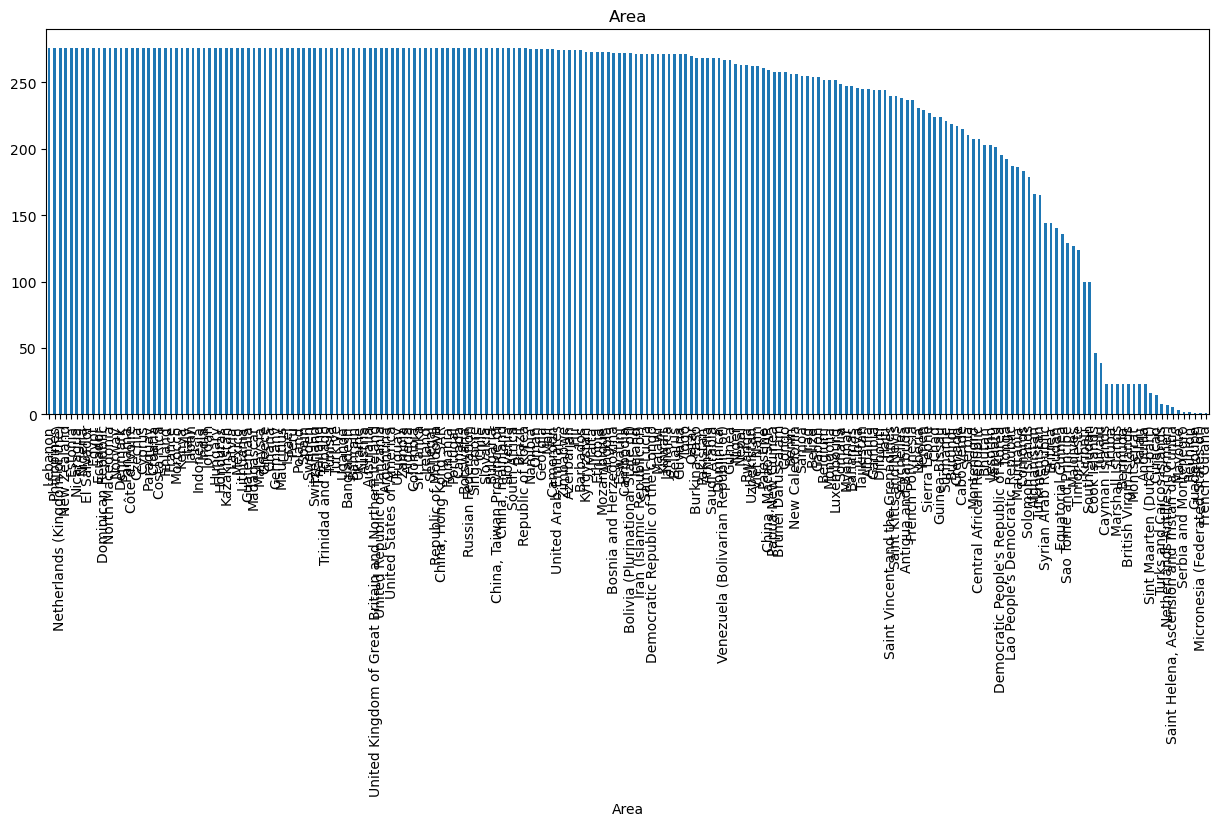

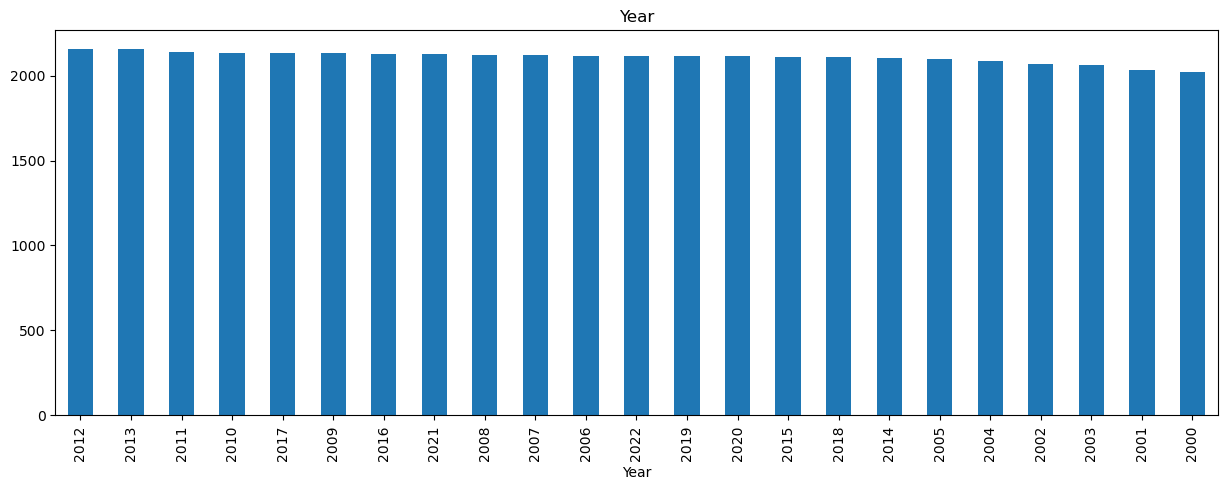

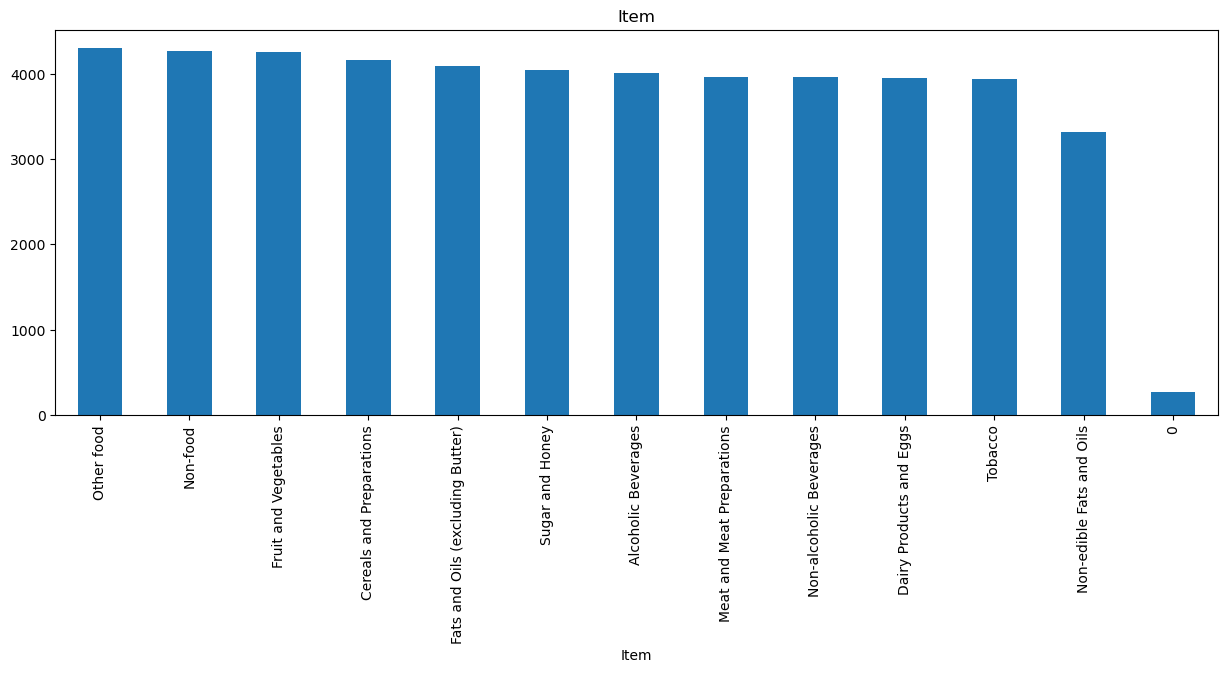

In [31]:
for col in object_columns:  # Add a colon at the end of the for loop statement
    df_merged[col].value_counts().plot(kind="bar", figsize=(15, 5))
    plt.title(col)
    plt.show()  # Call the show() function

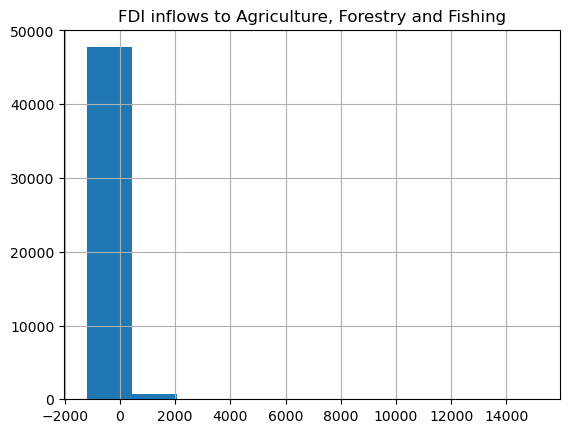

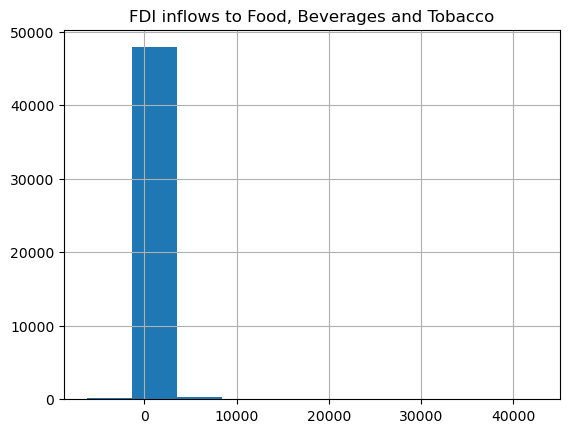

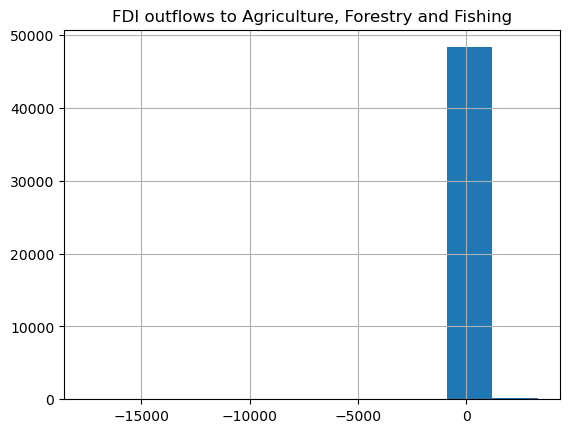

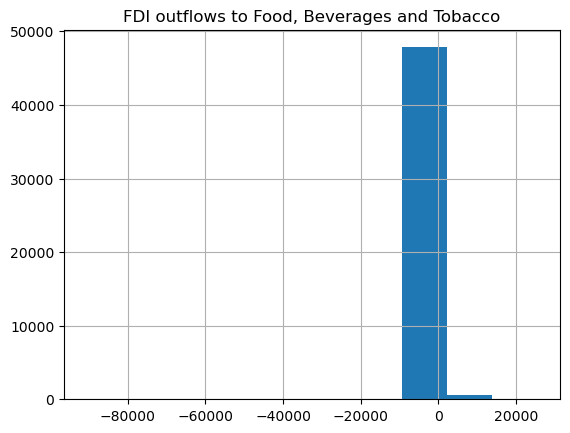

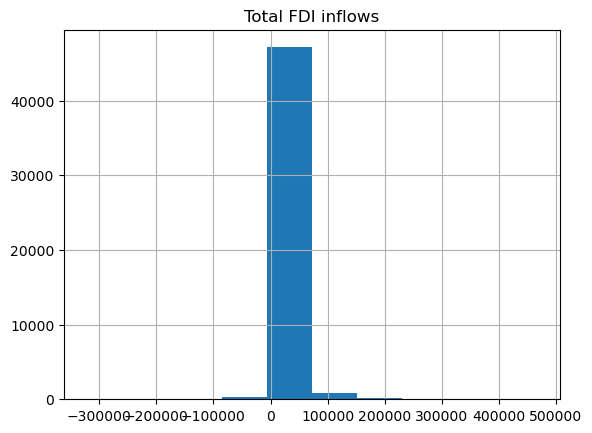

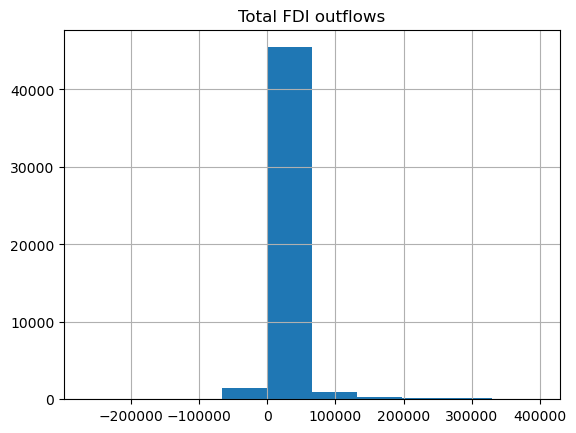

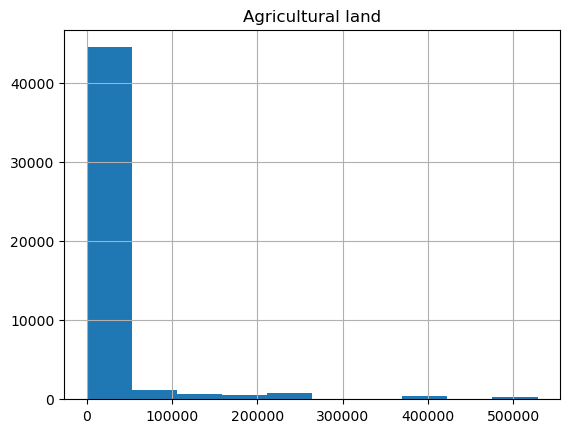

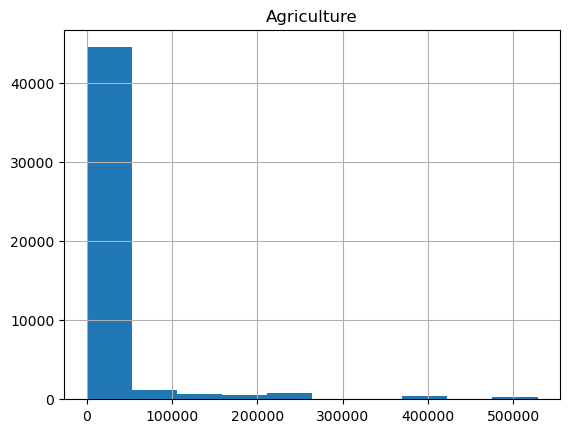

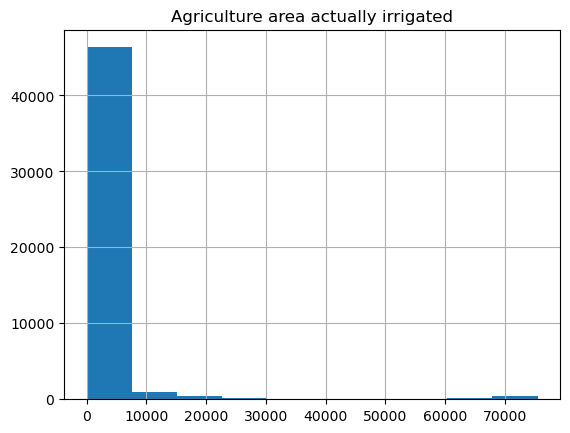

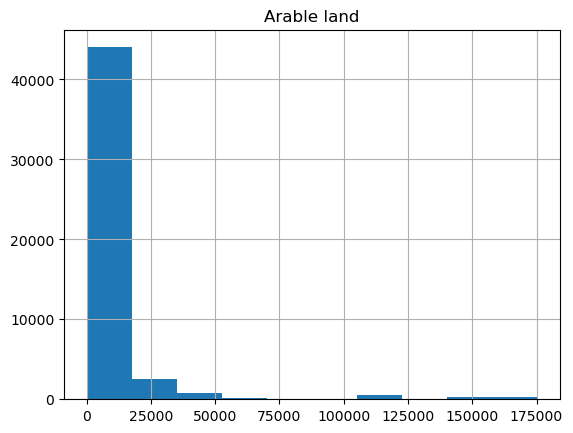

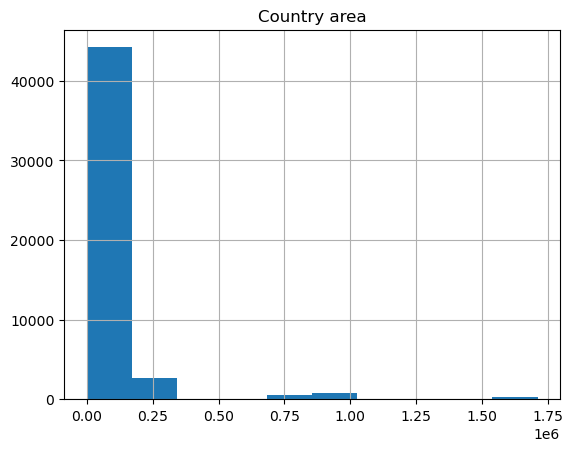

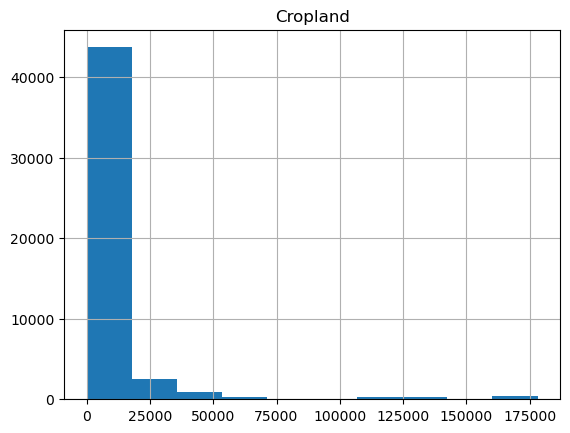

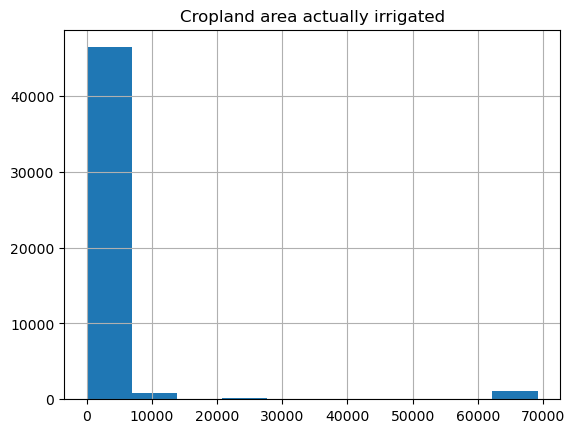

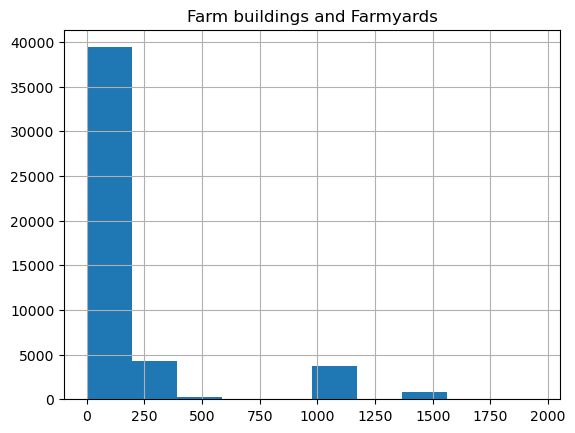

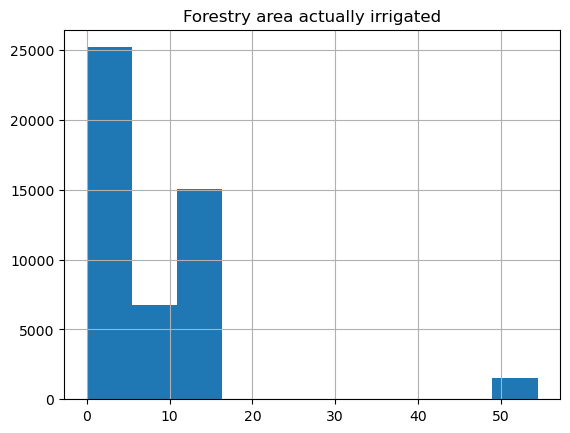

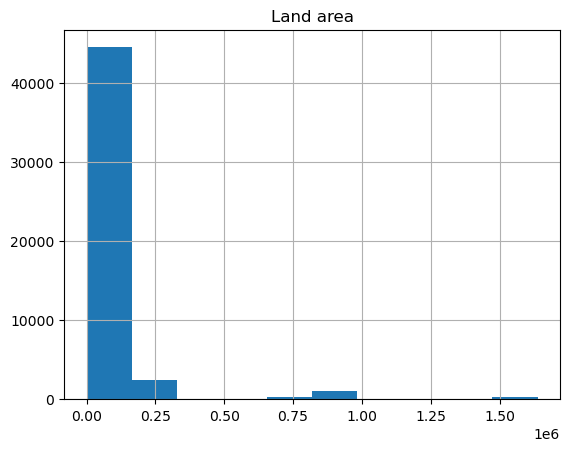

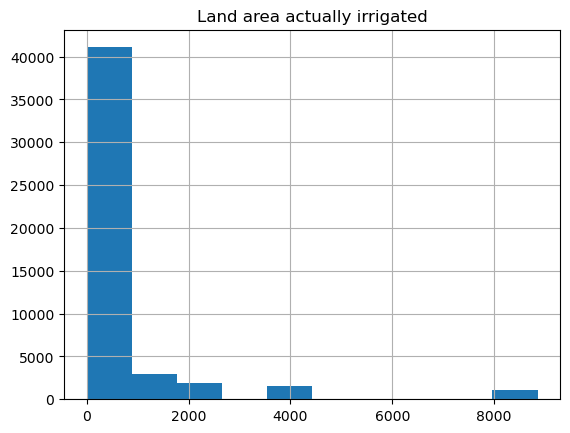

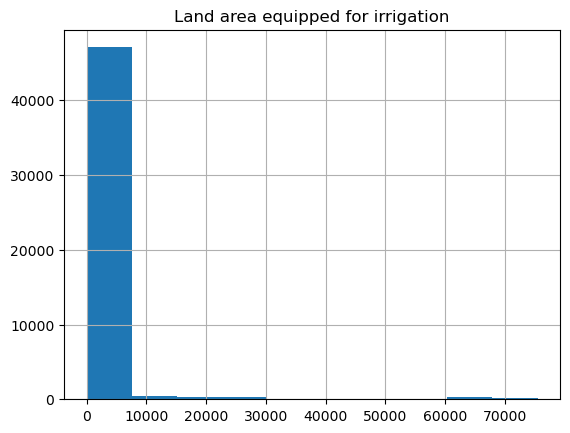

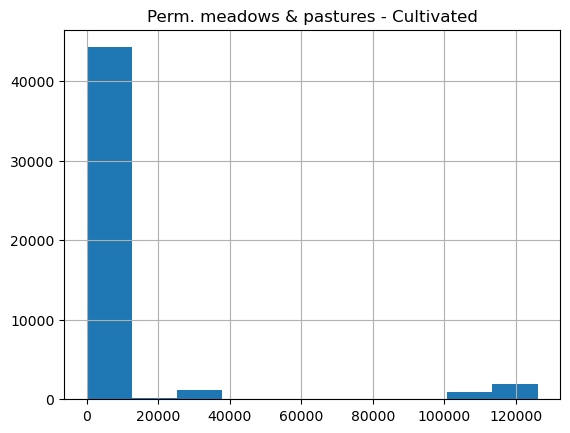

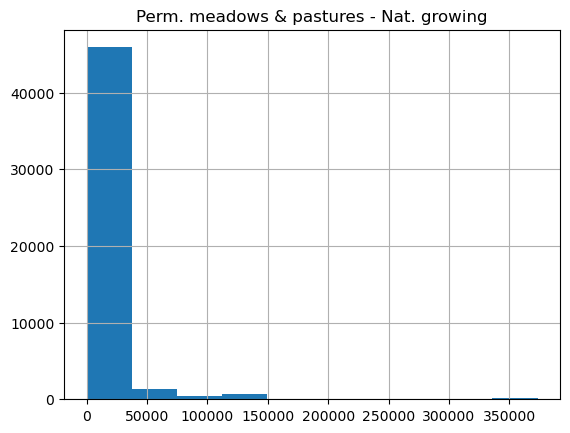

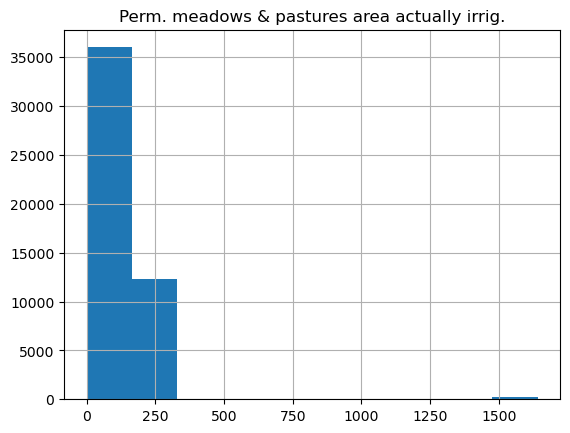

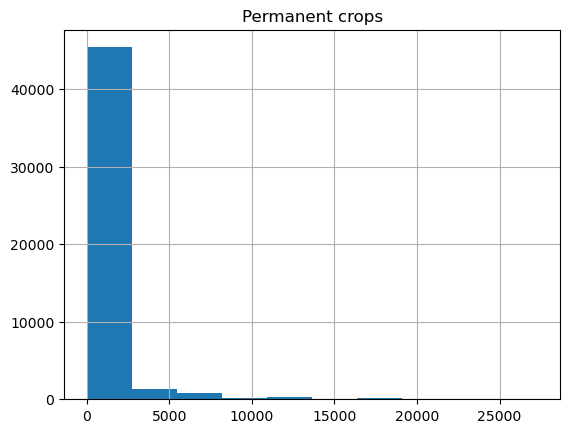

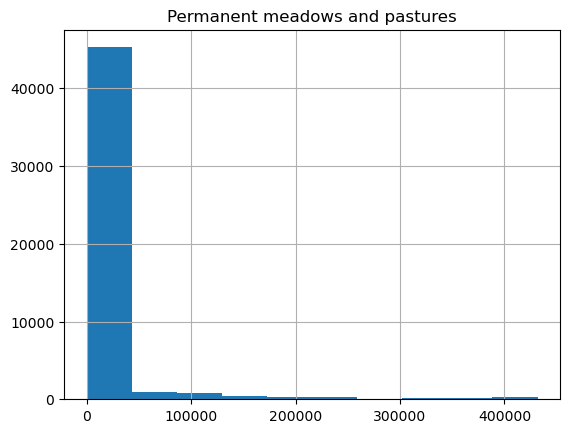

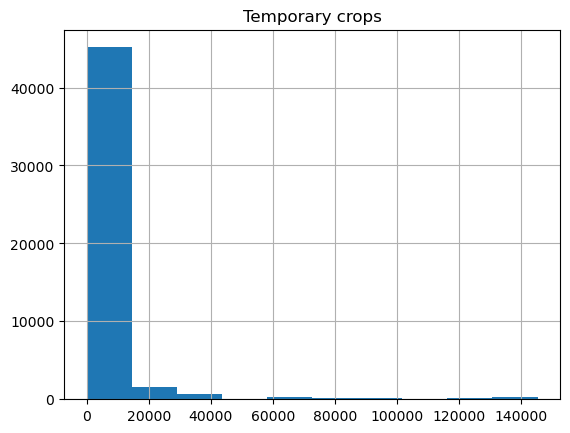

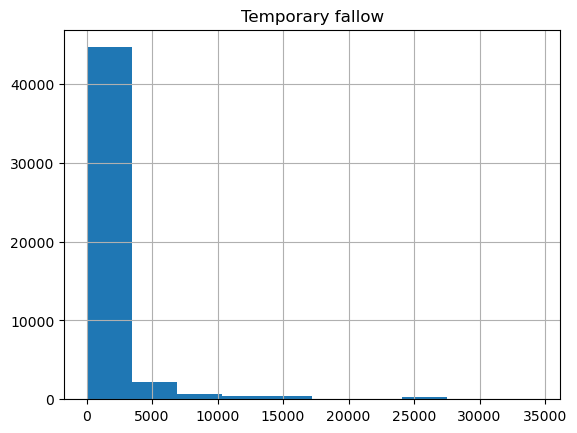

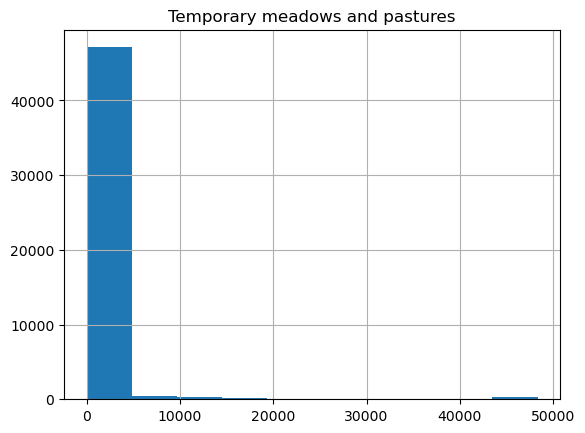

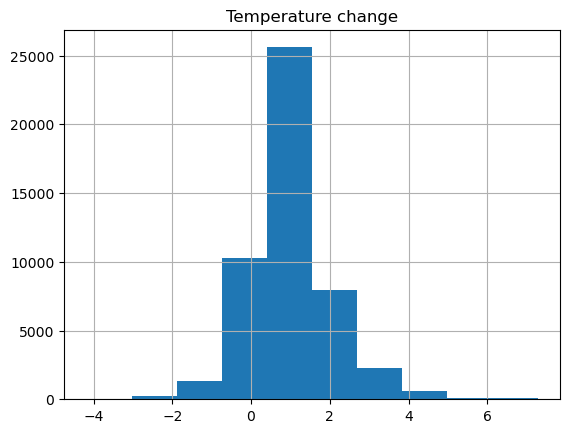

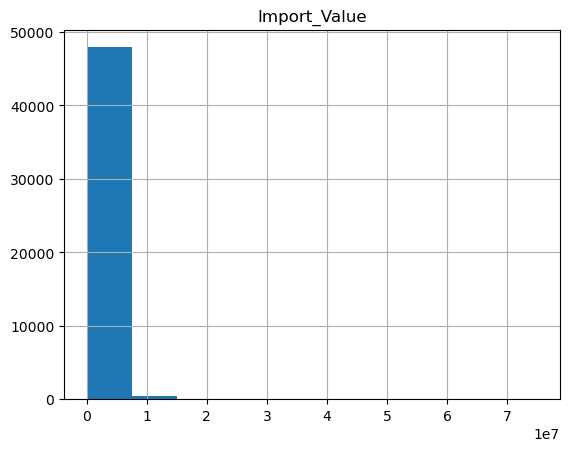

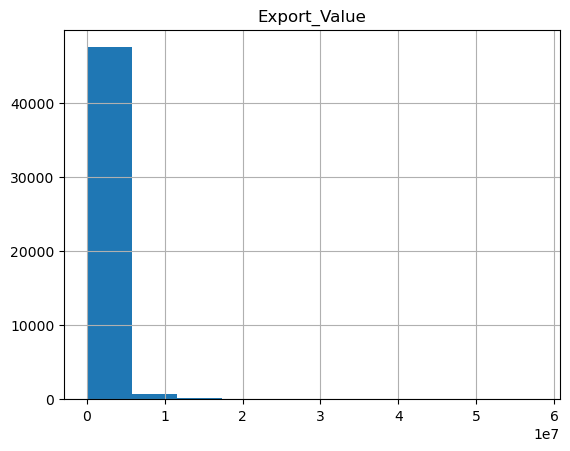

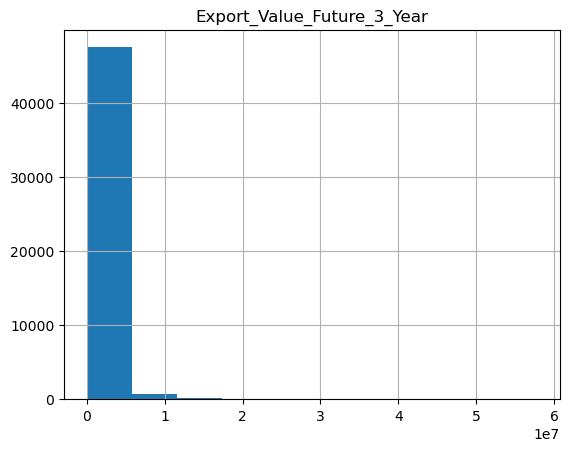

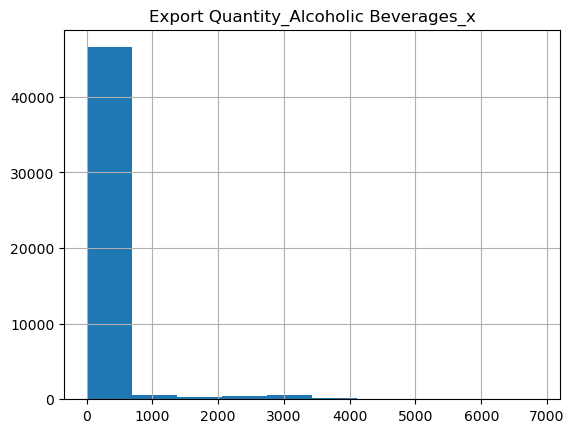

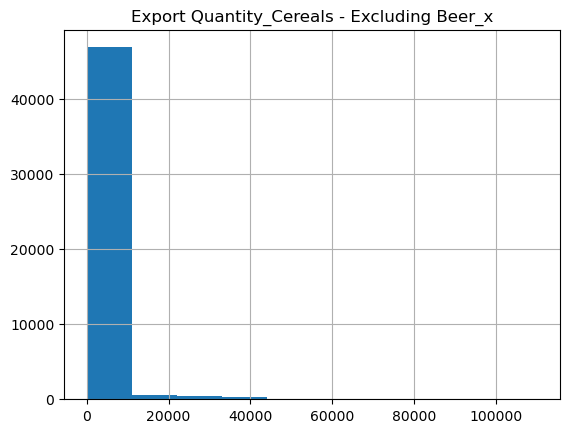

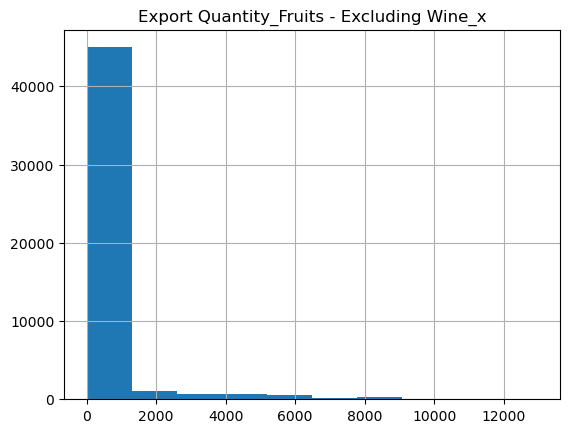

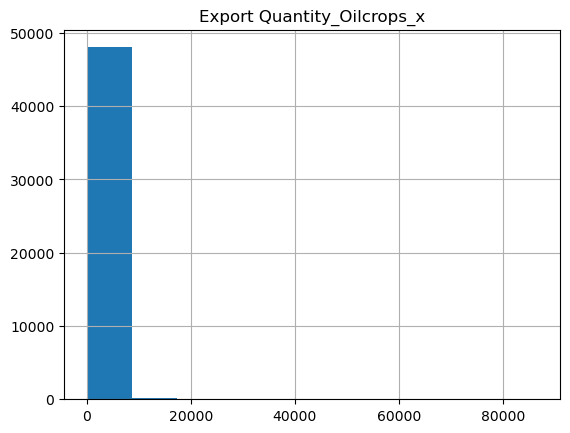

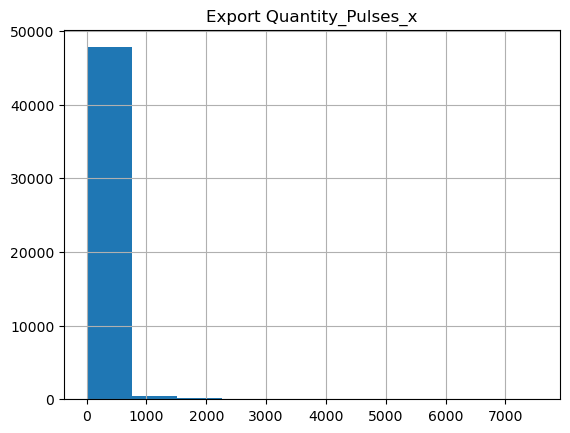

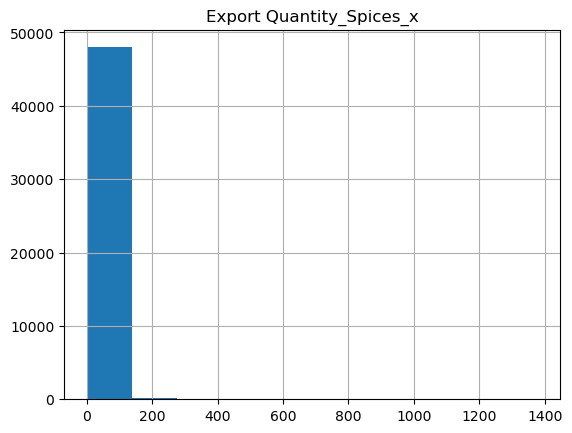

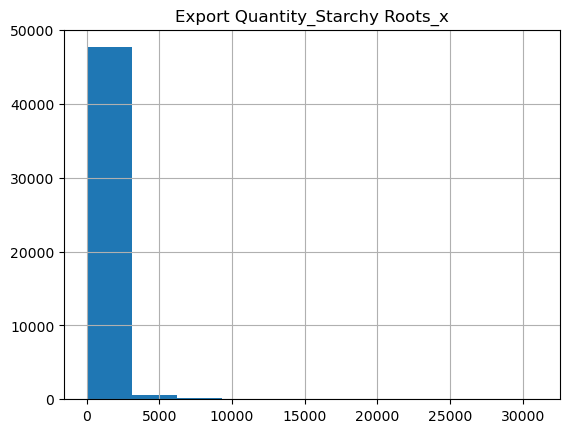

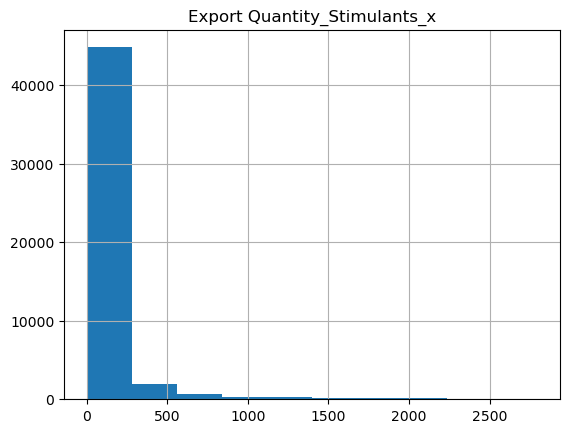

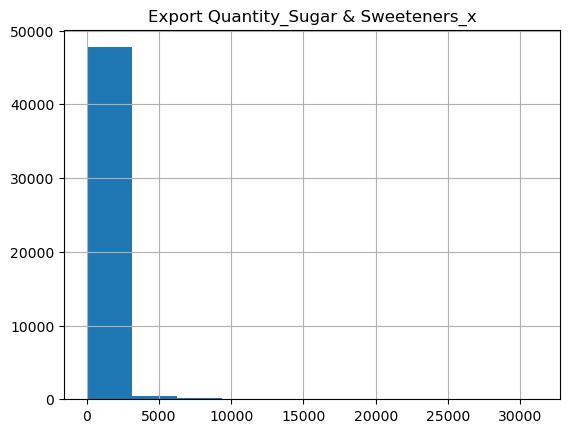

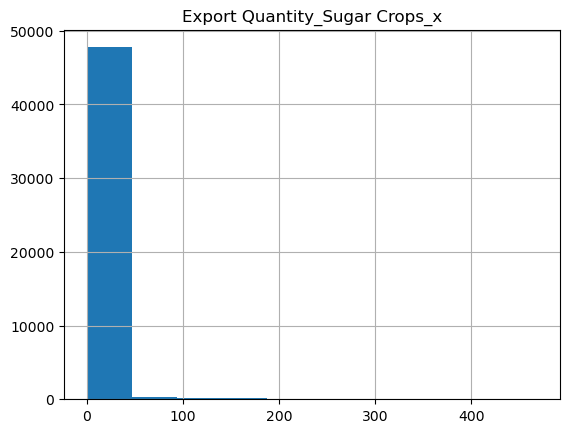

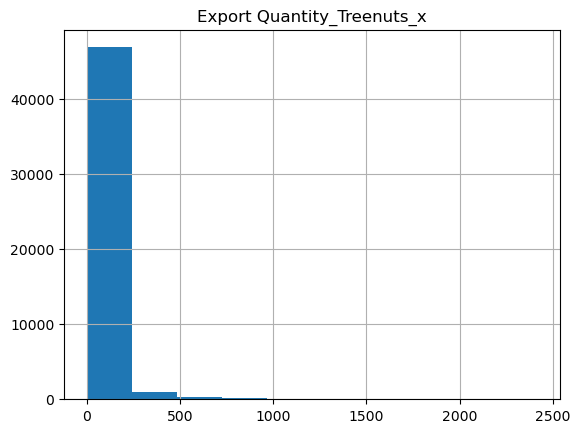

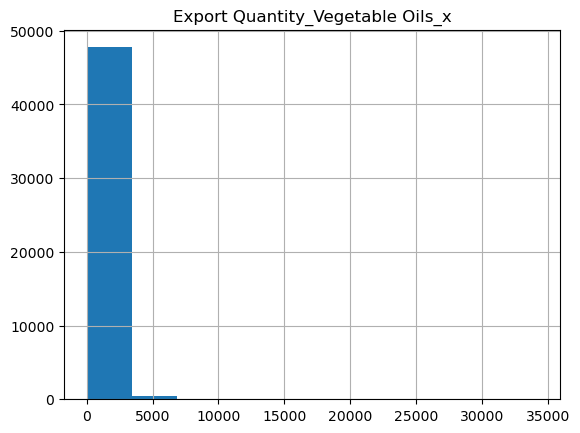

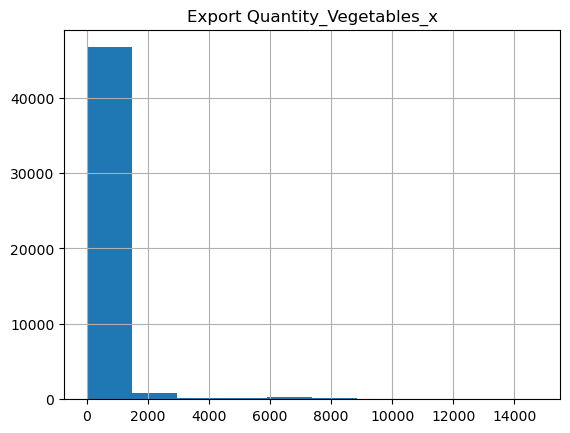

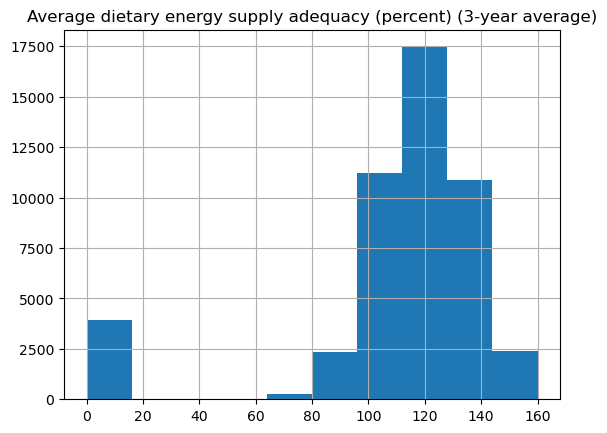

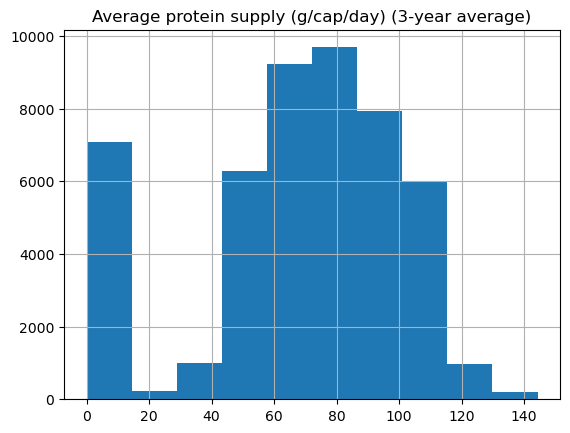

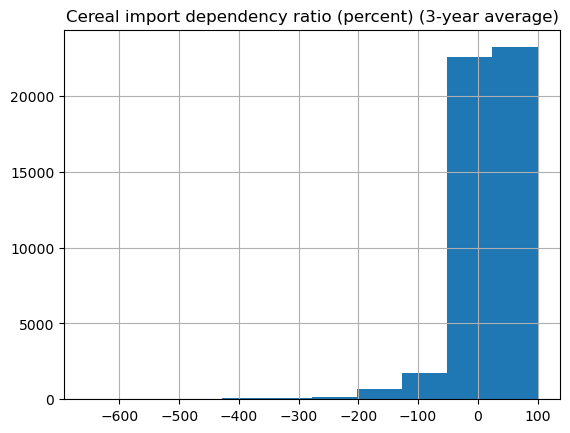

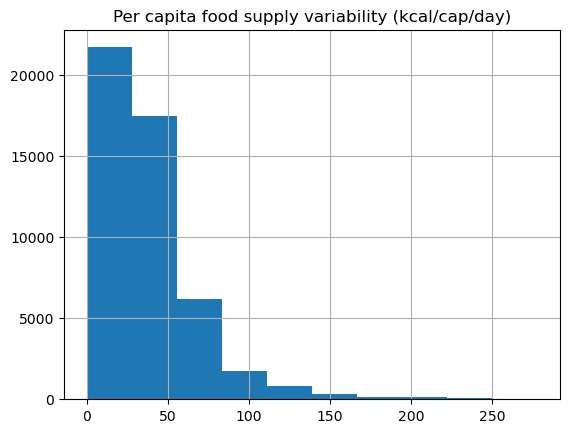

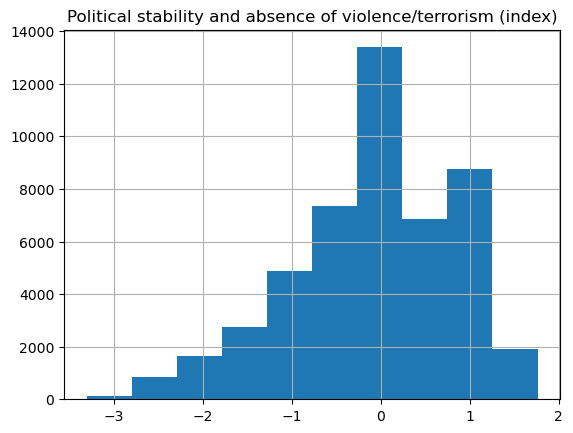

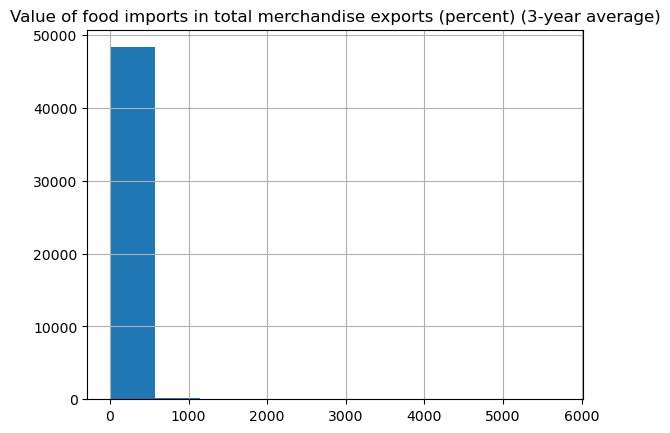

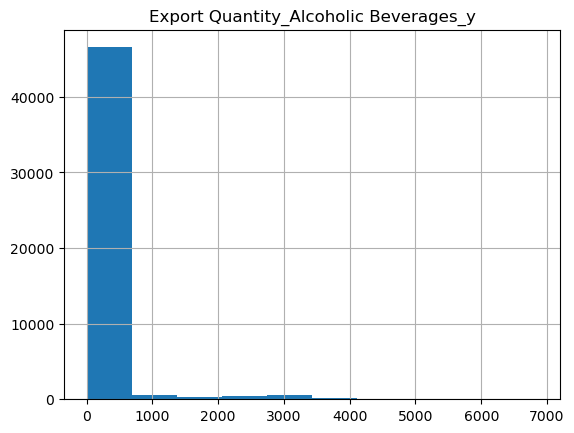

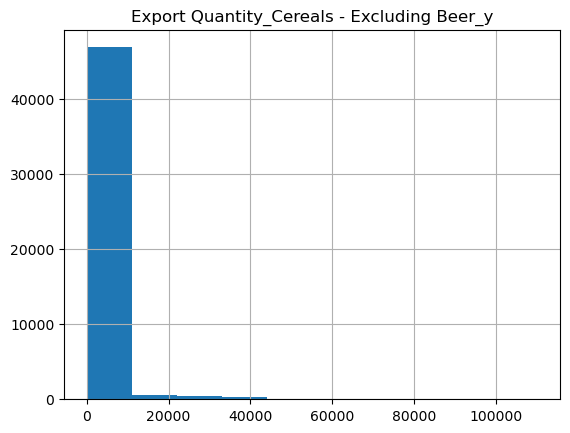

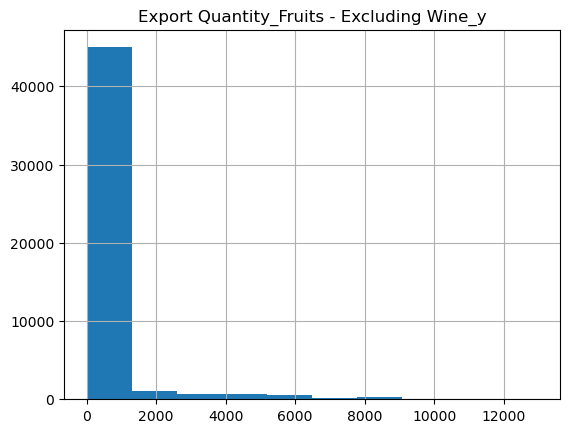

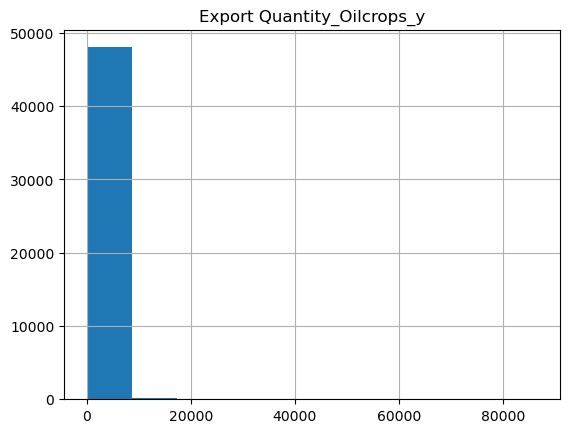

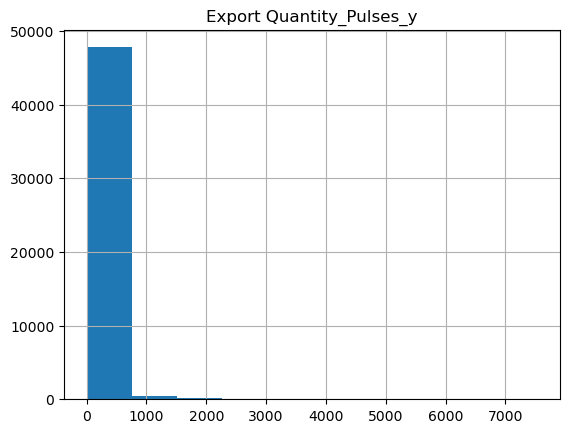

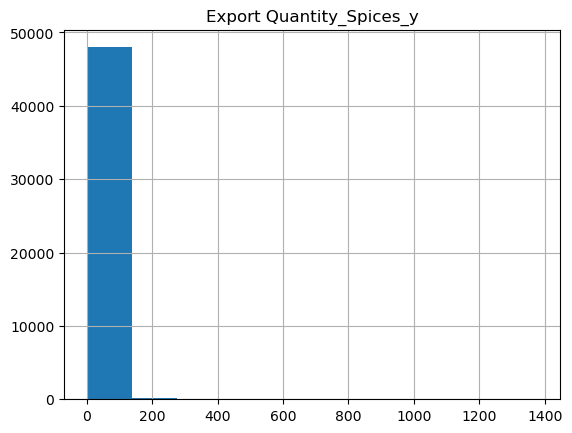

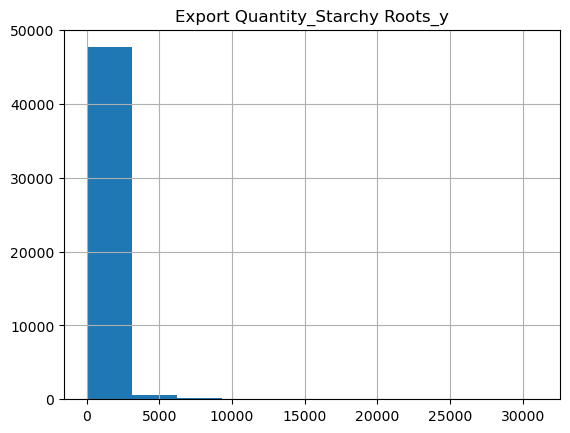

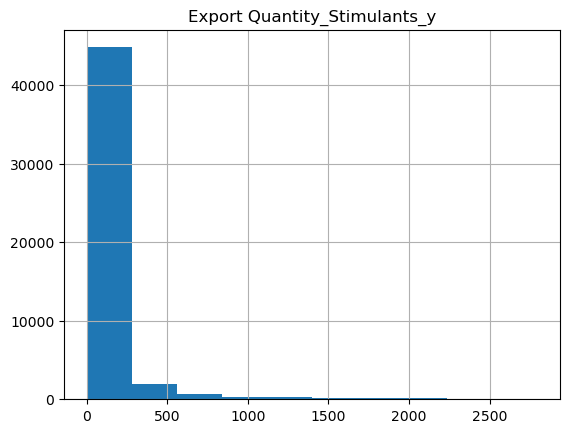

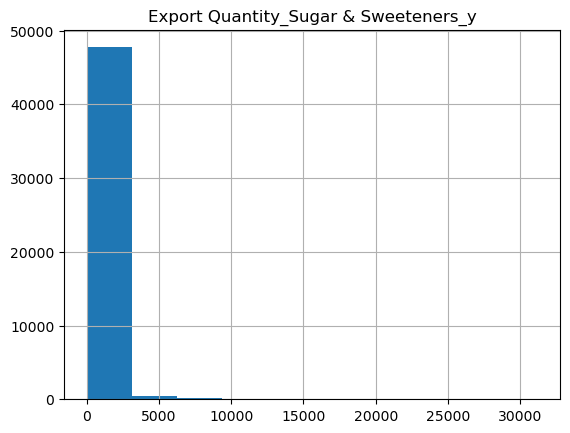

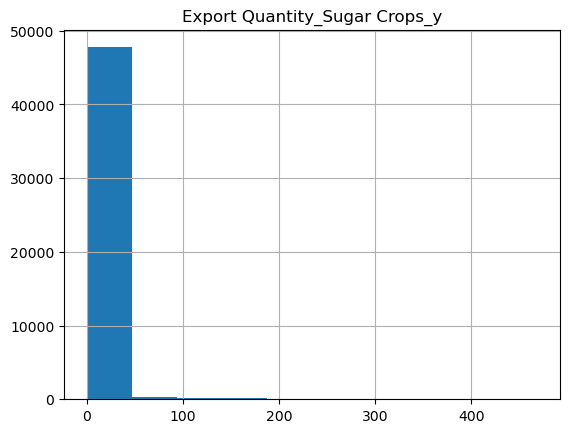

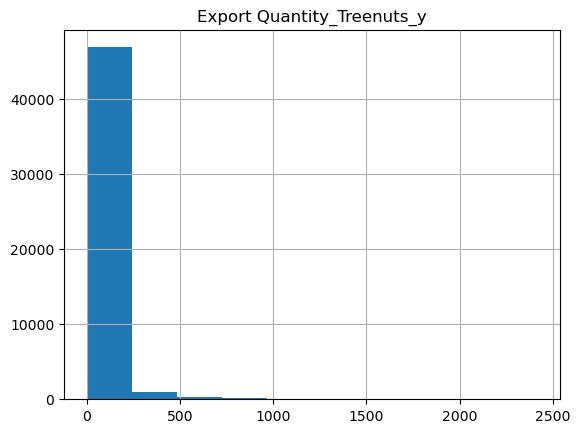

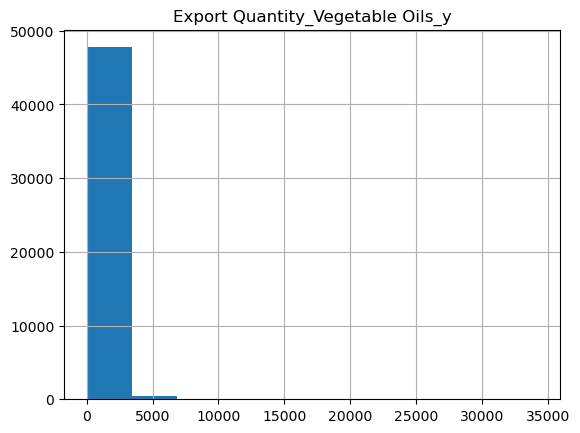

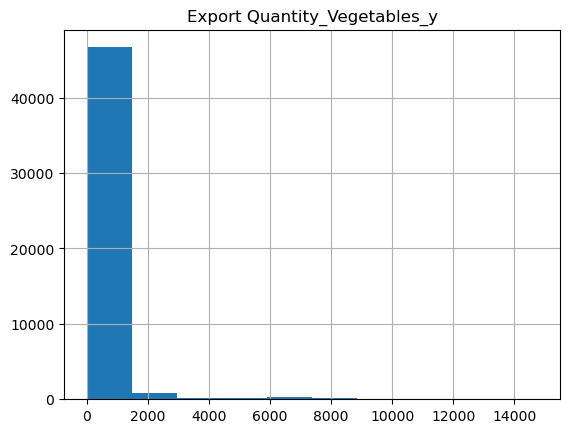

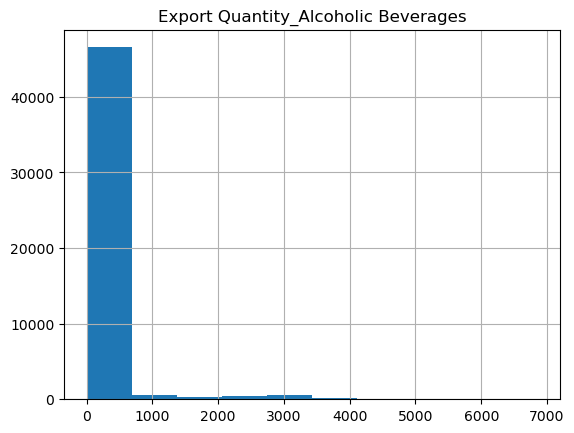

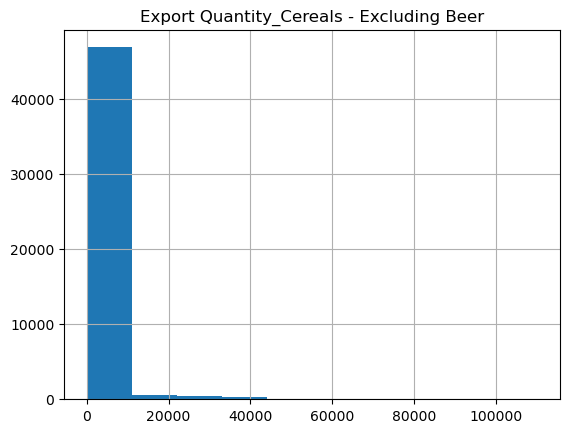

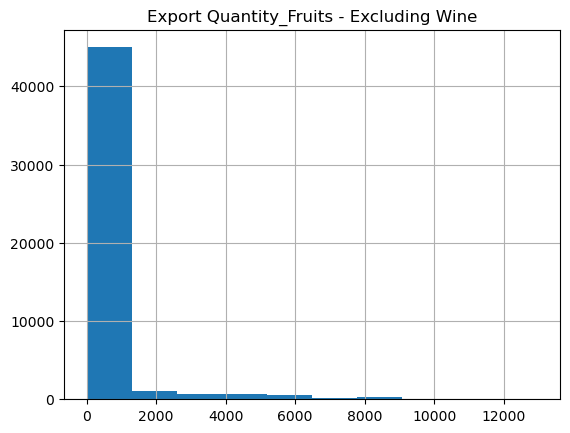

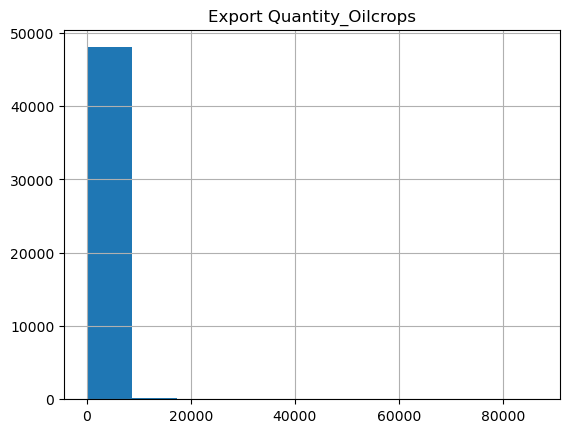

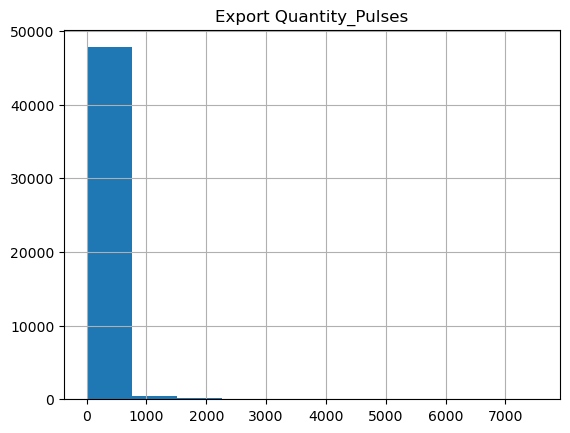

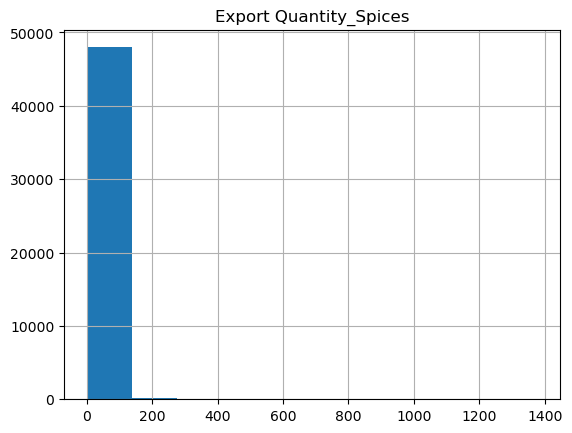

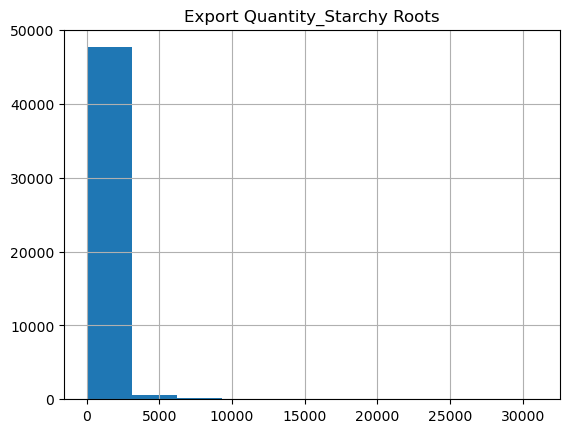

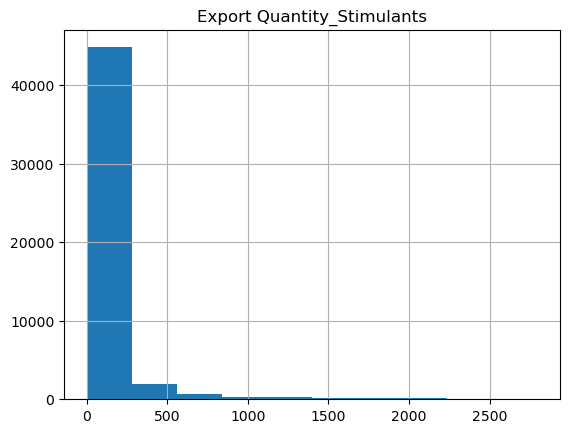

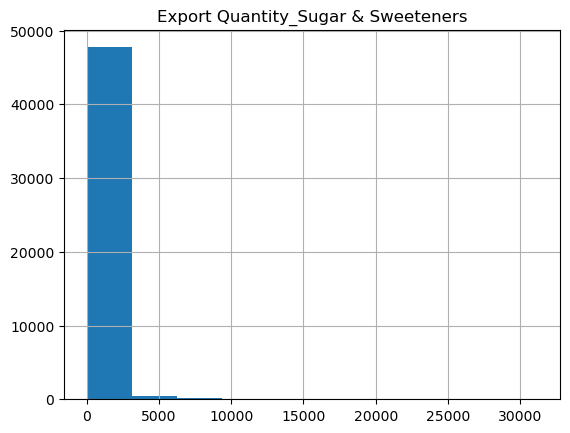

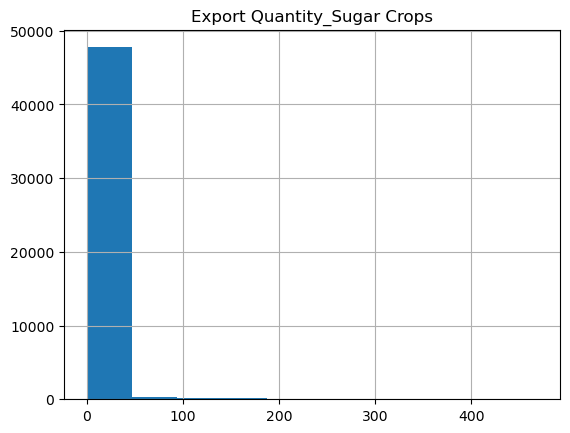

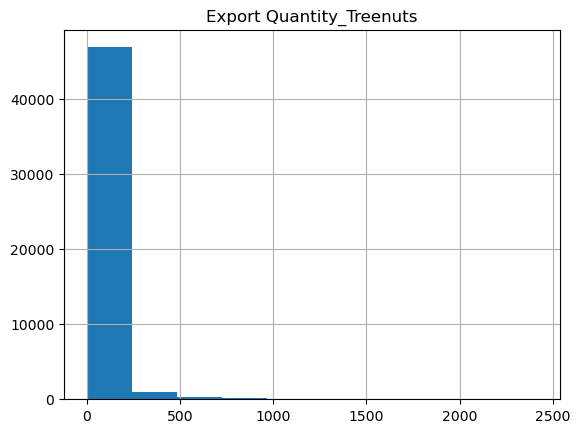

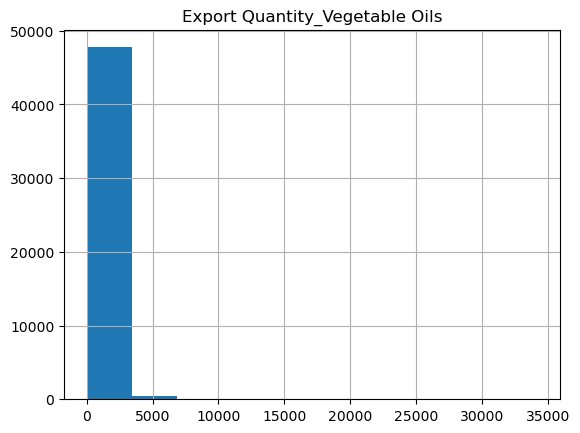

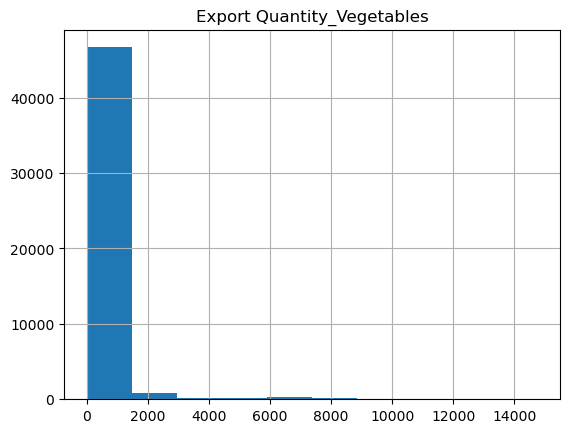

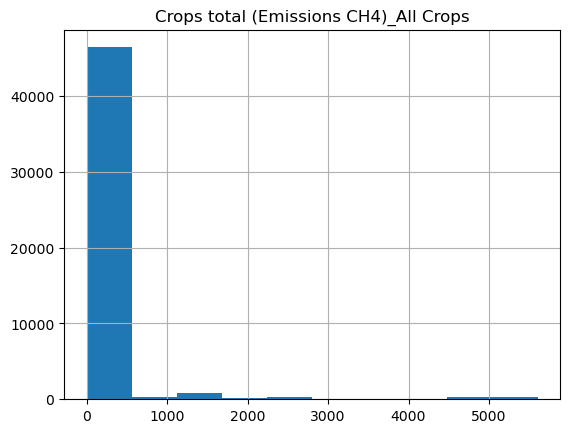

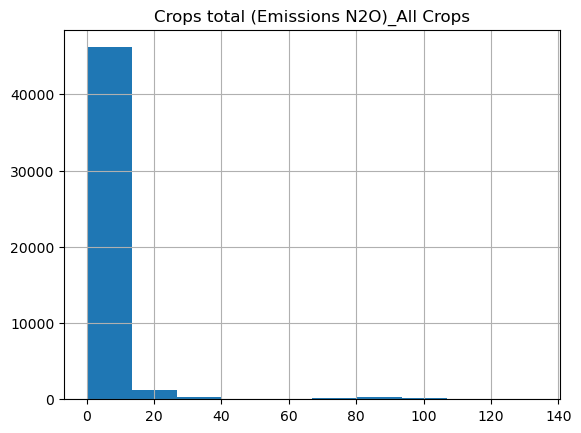

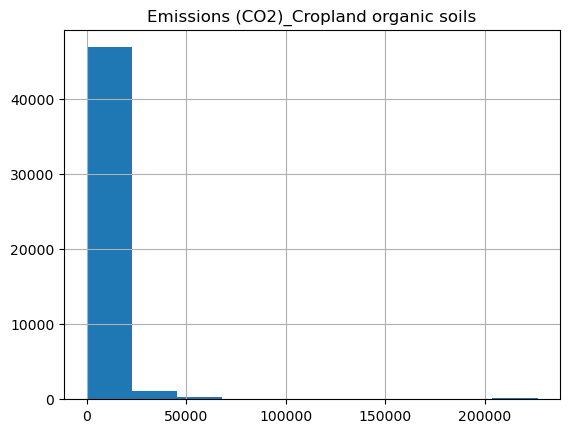

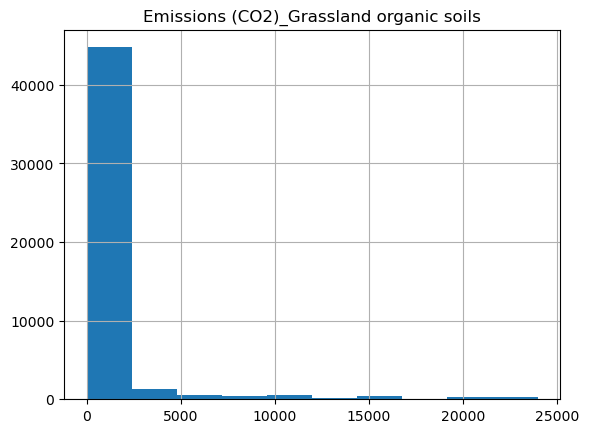

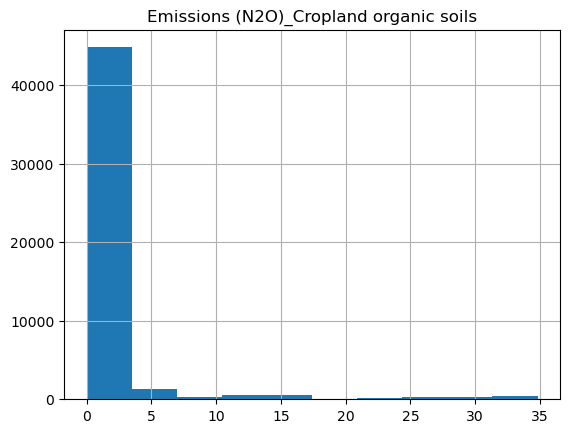

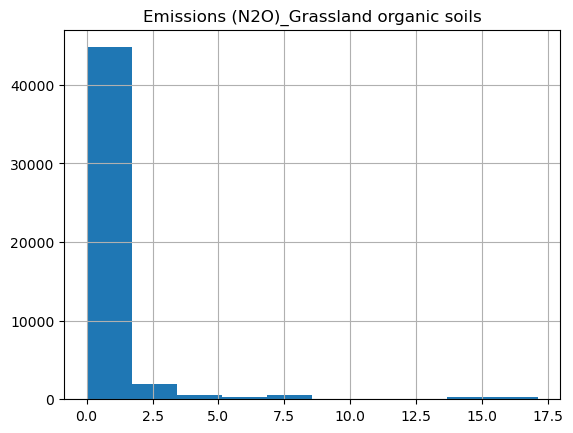

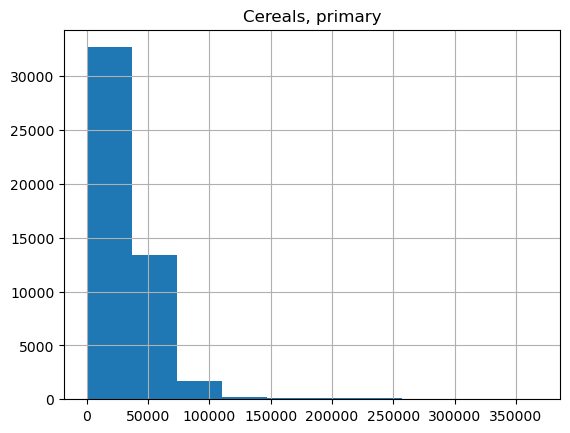

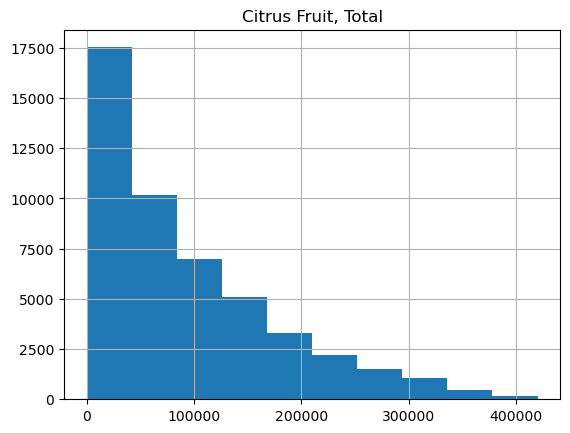

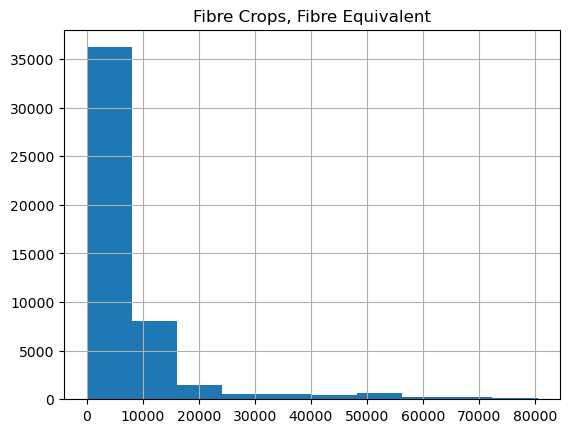

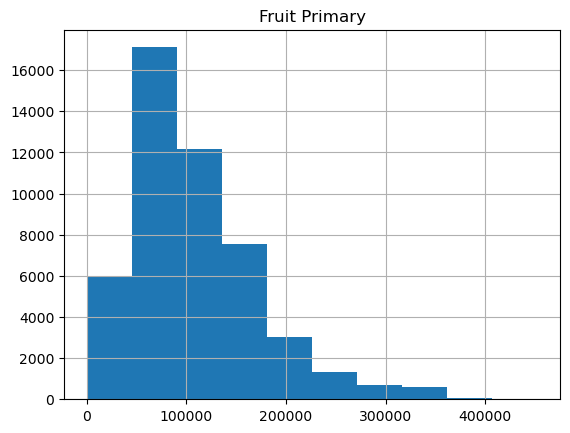

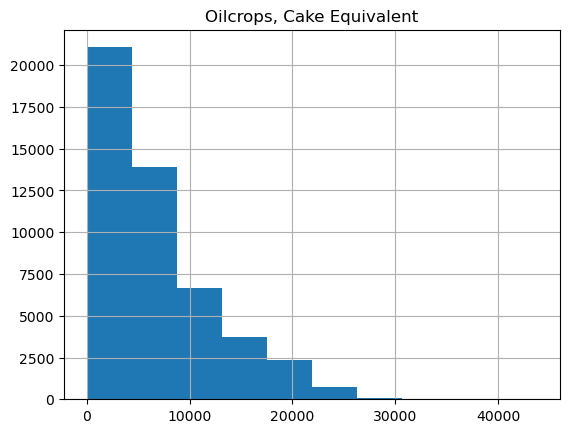

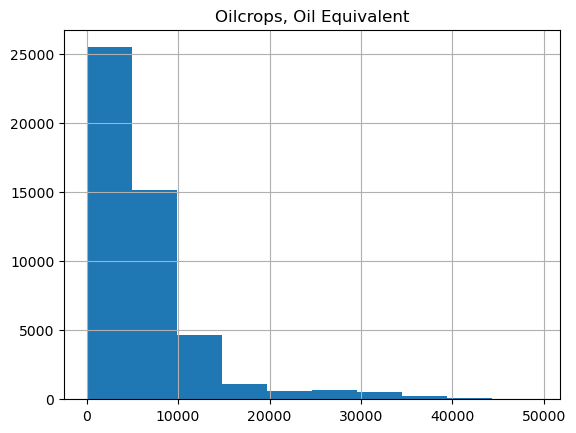

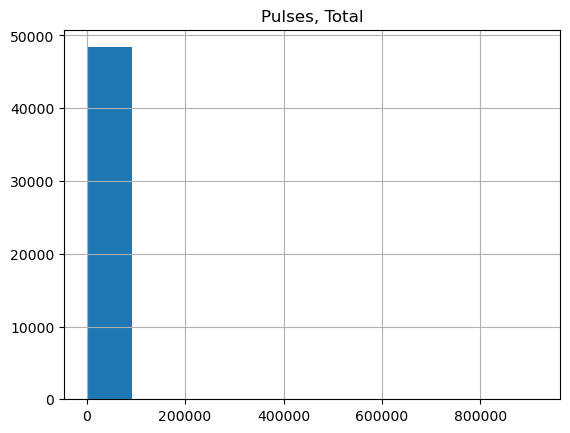

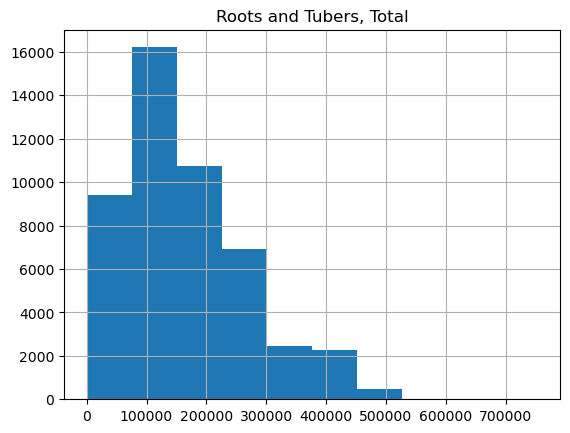

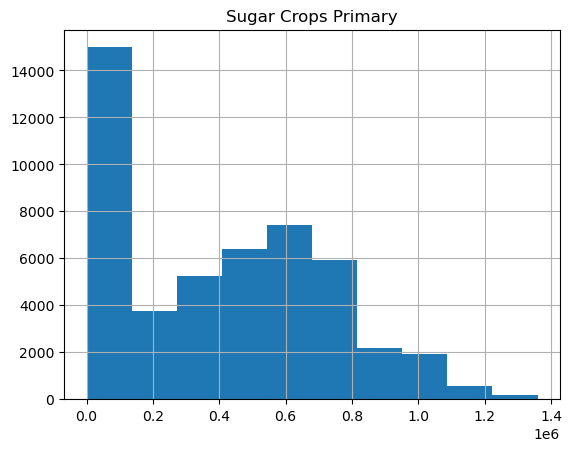

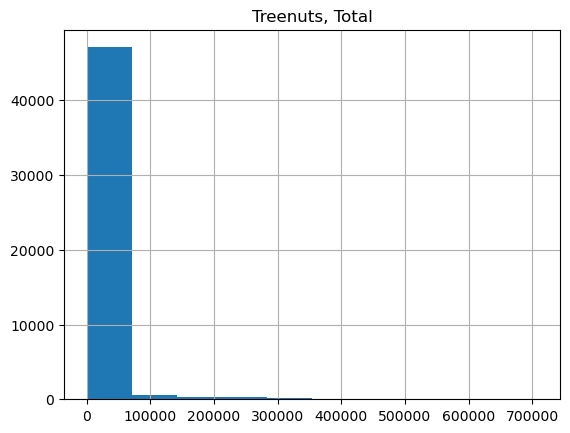

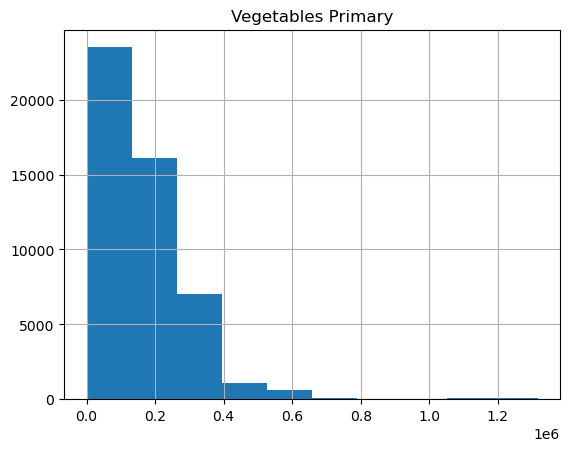

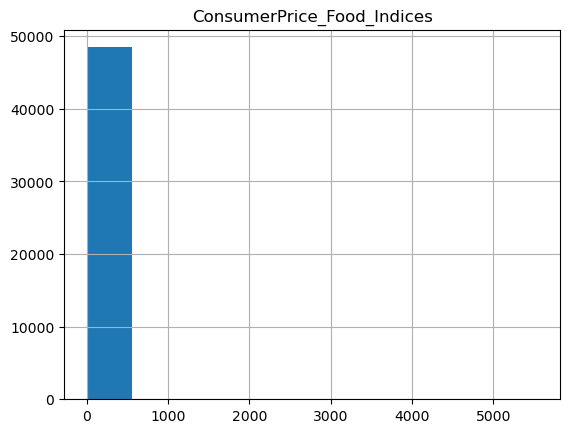

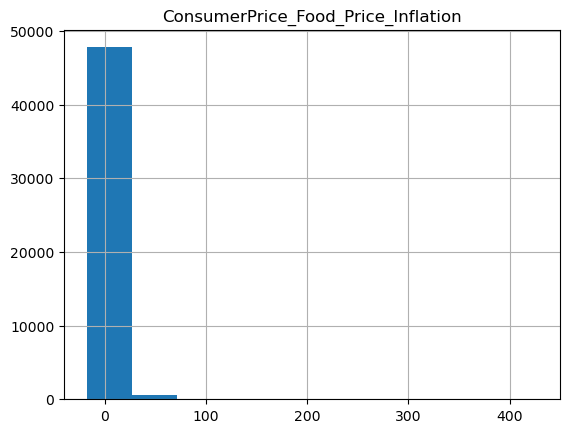

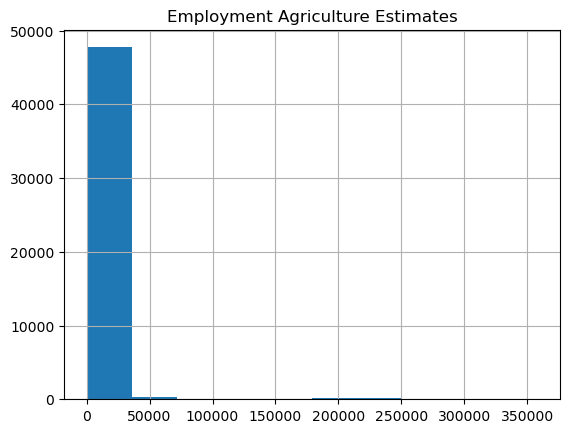

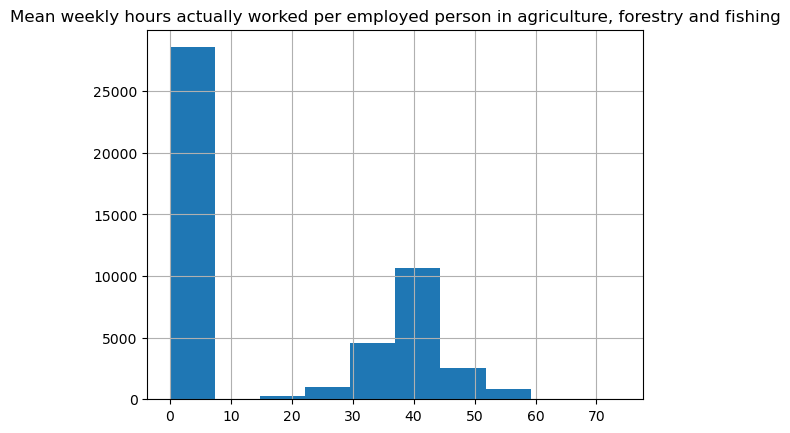

In [32]:
numeric_columns = [f for f in df_merged.columns if df_merged[f].dtype != "O"]
numeric_columns

for col in numeric_columns:  
    df_merged[col].hist()  # Fixing the typo here
    plt.title(col)
    plt.show()  # Call the show() function

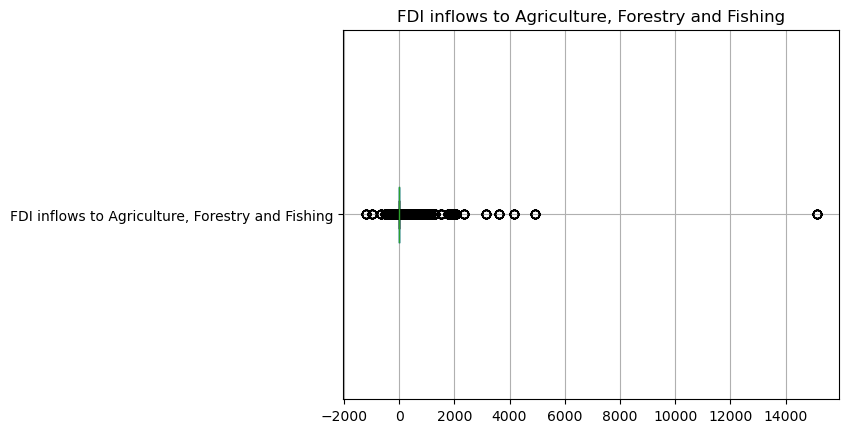

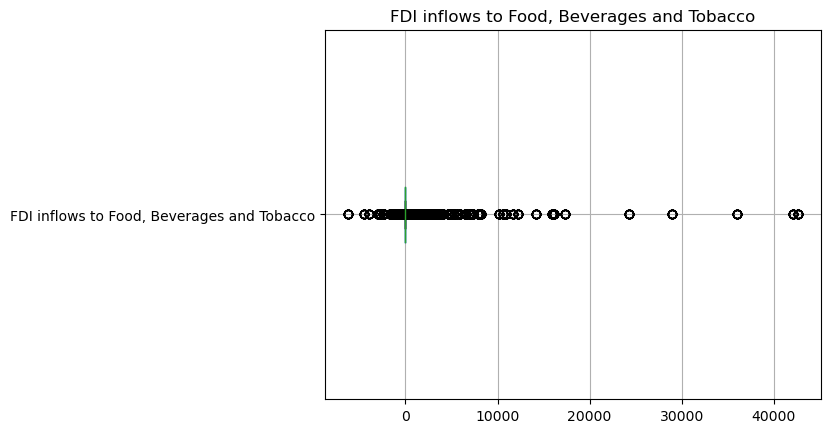

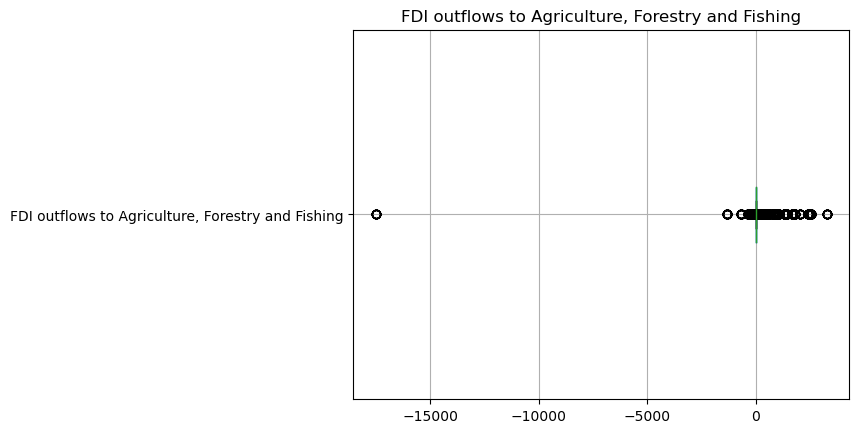

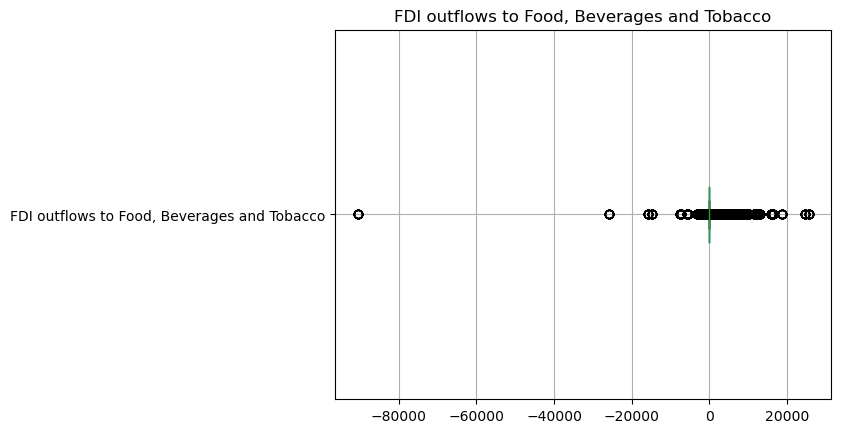

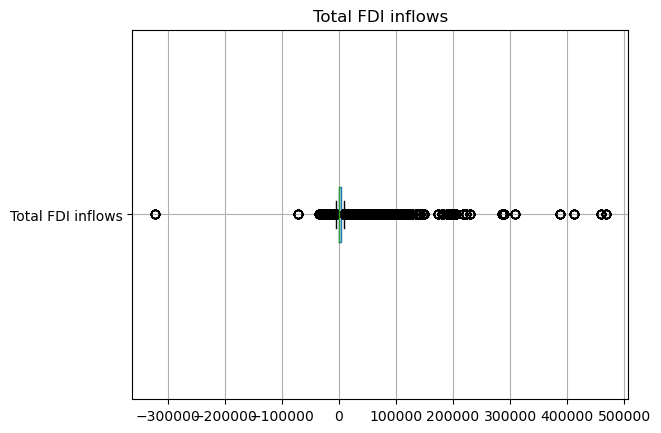

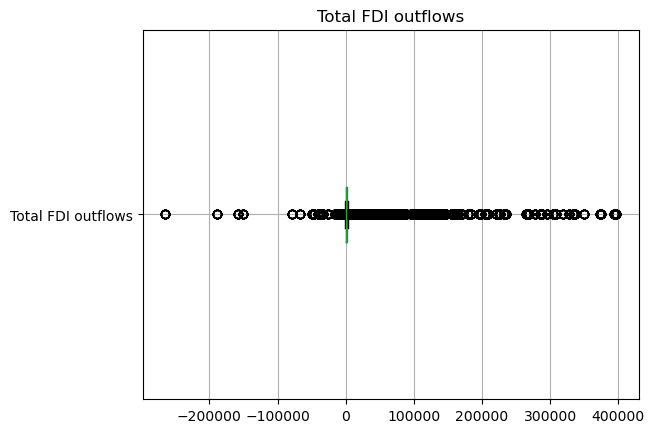

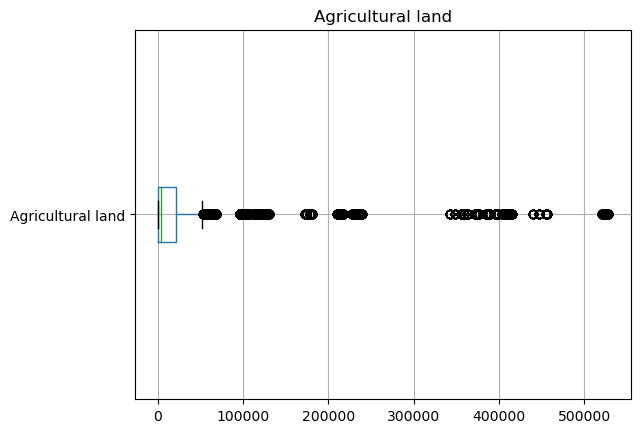

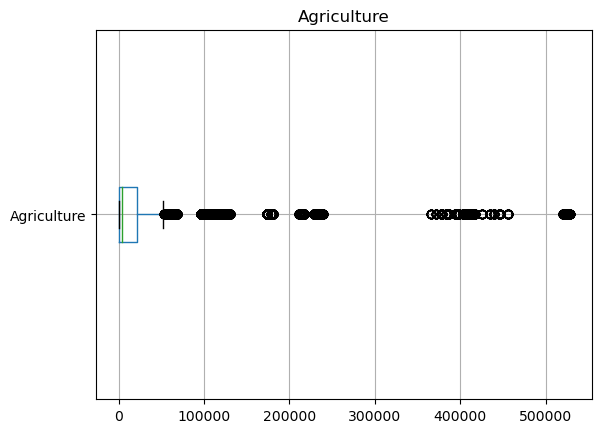

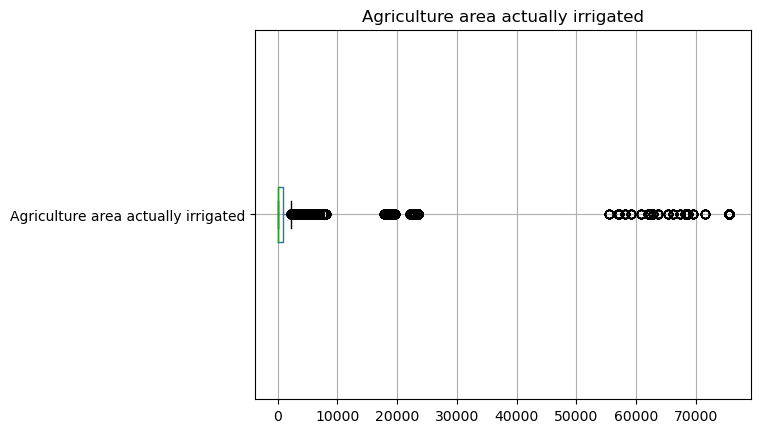

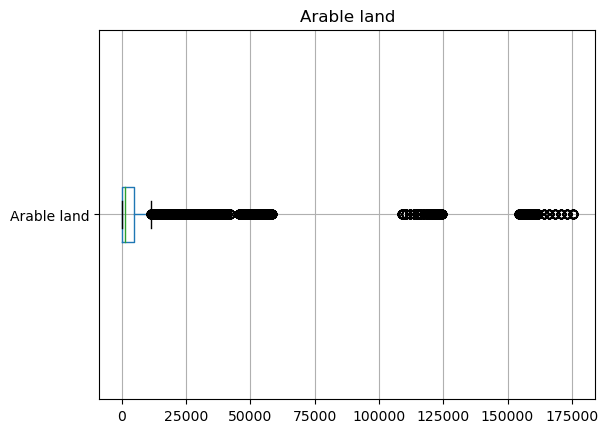

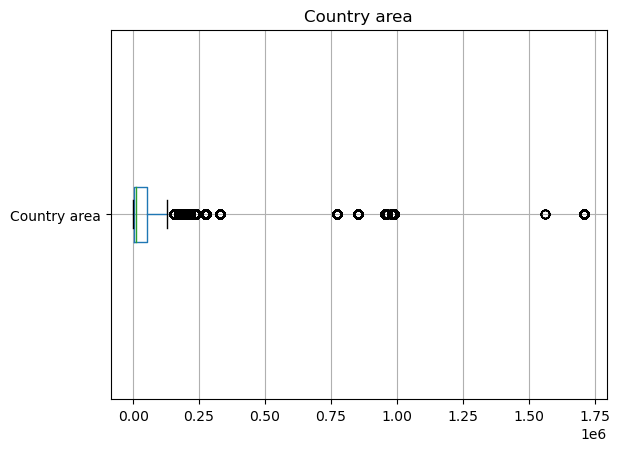

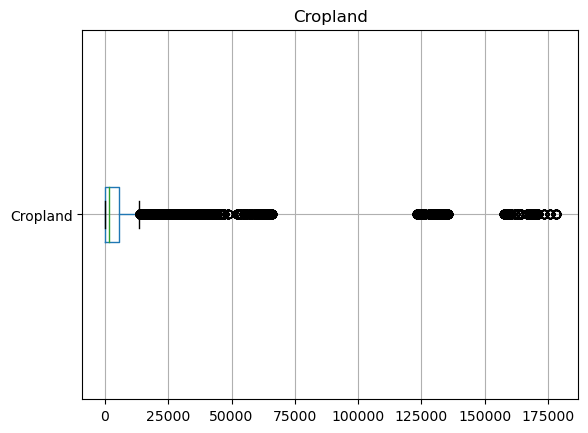

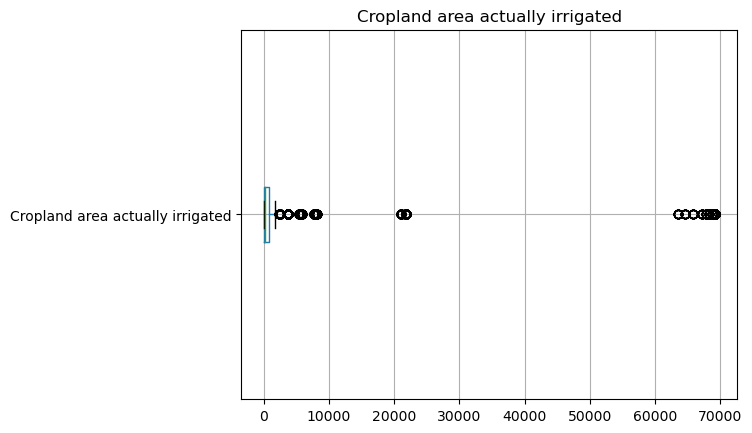

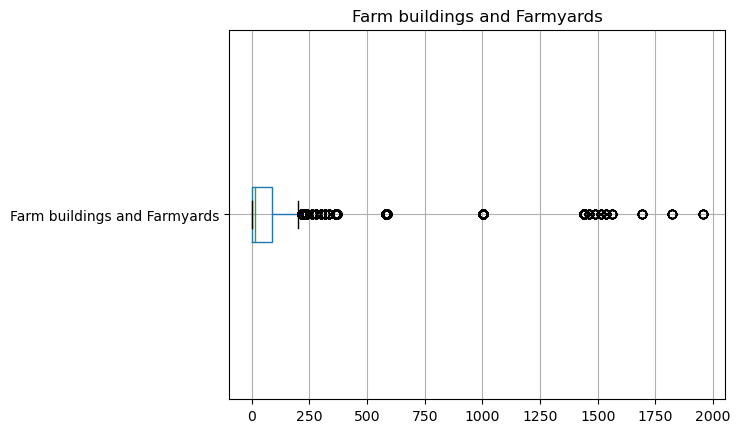

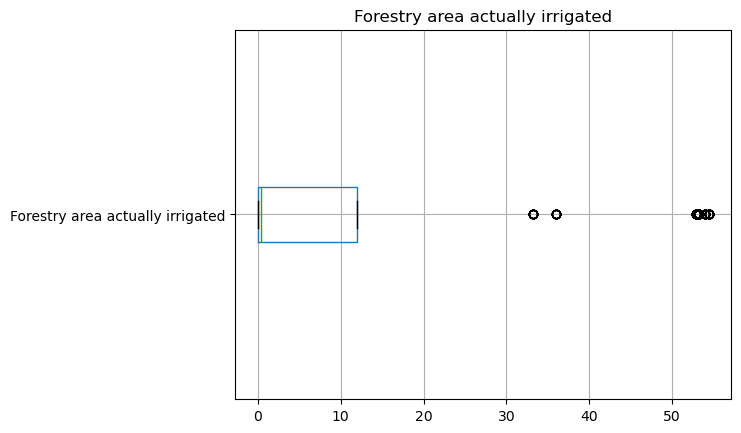

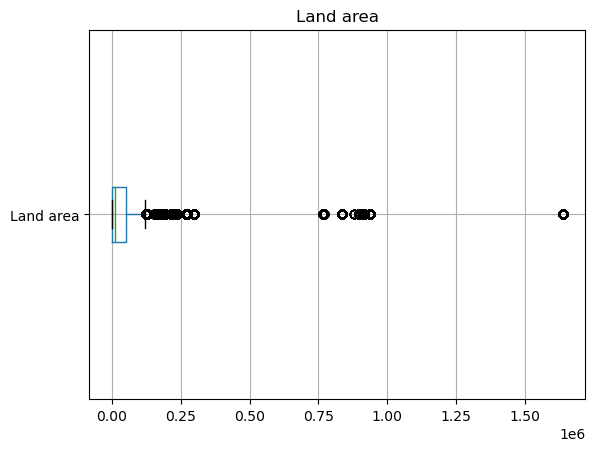

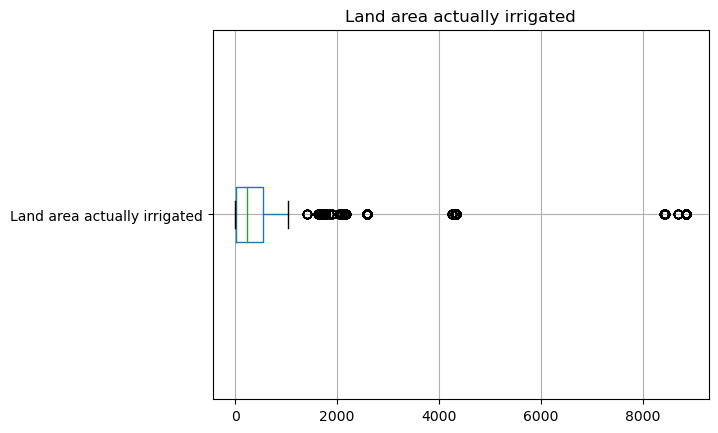

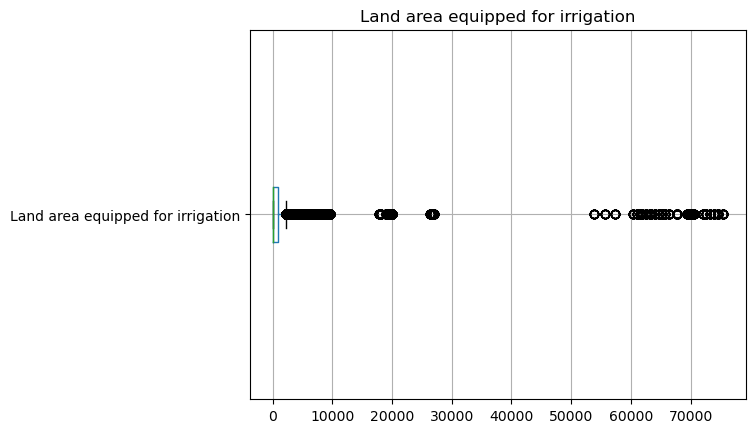

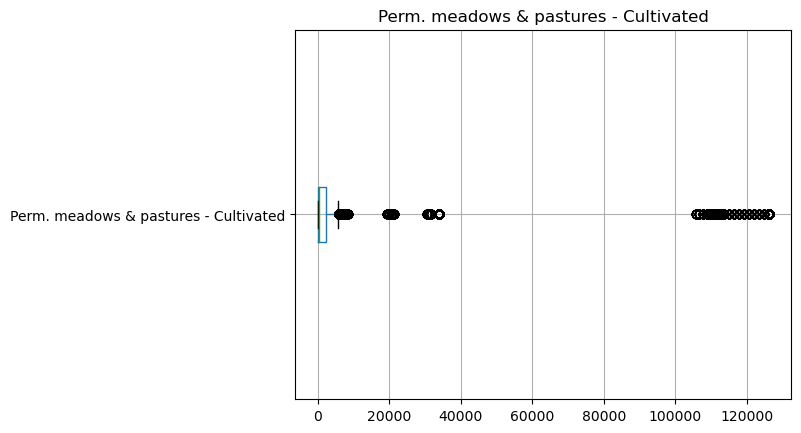

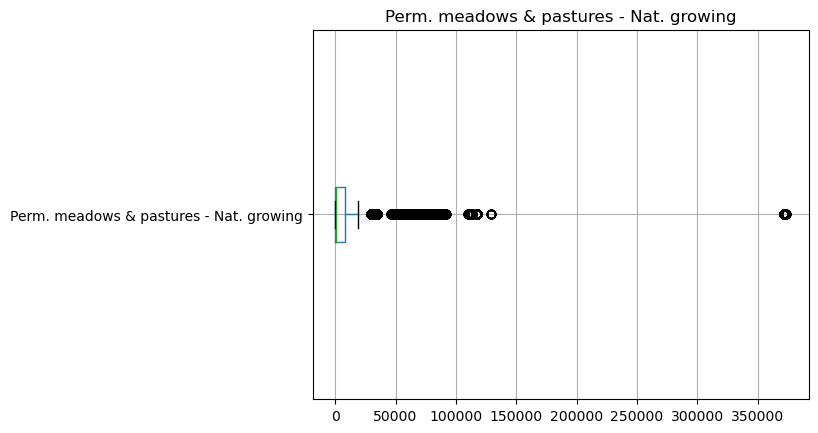

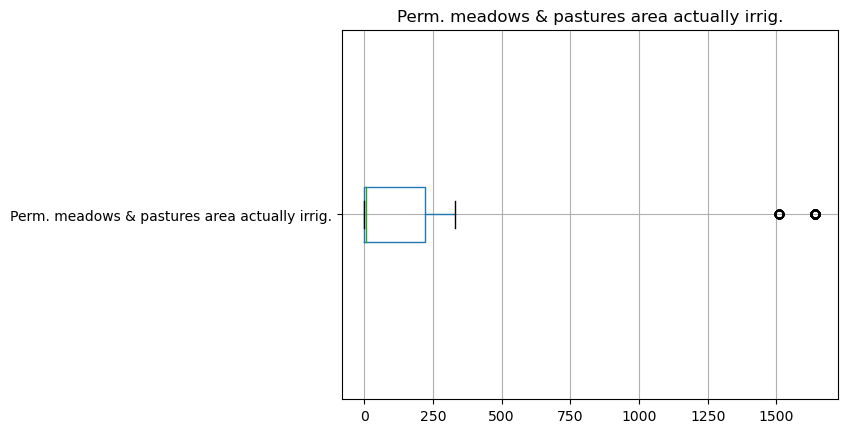

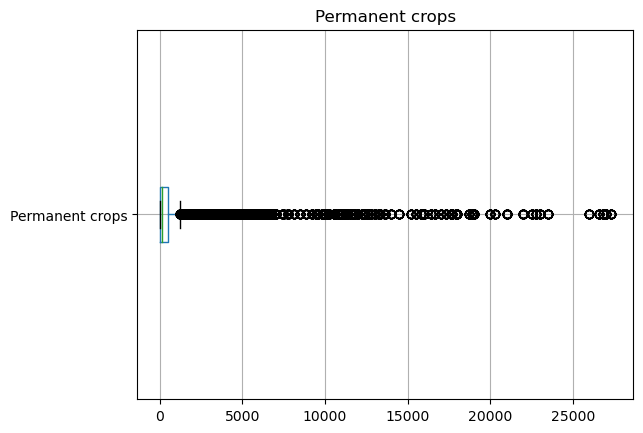

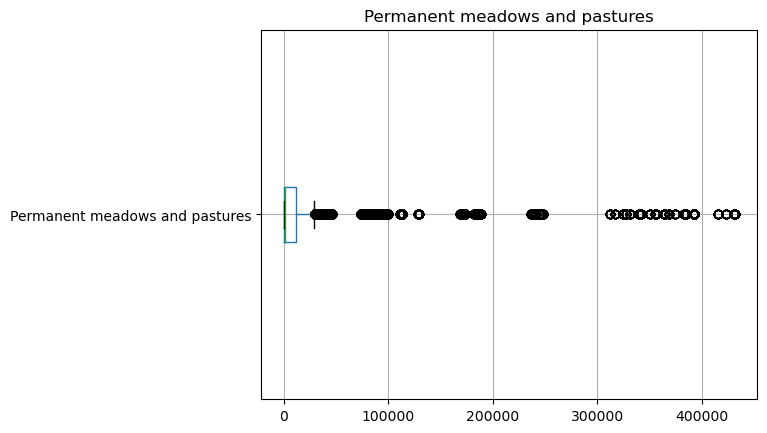

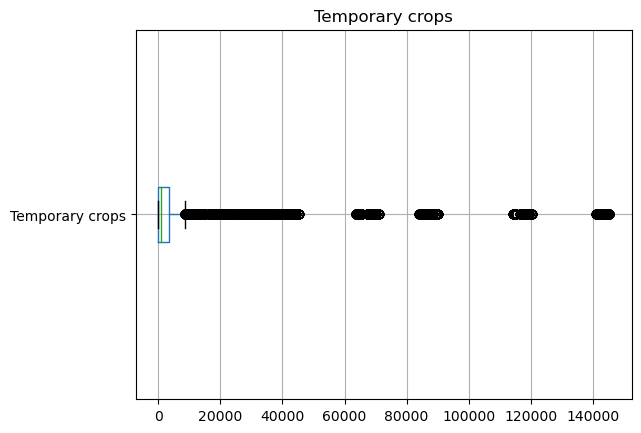

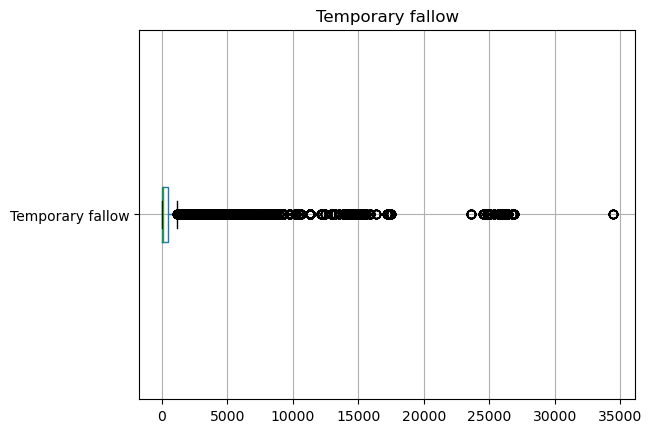

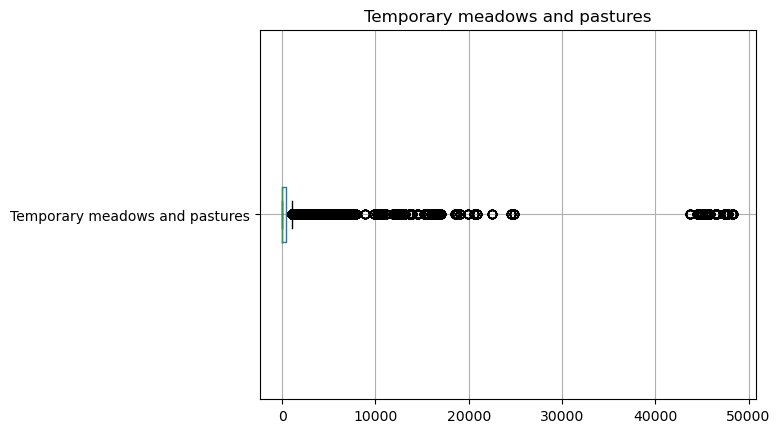

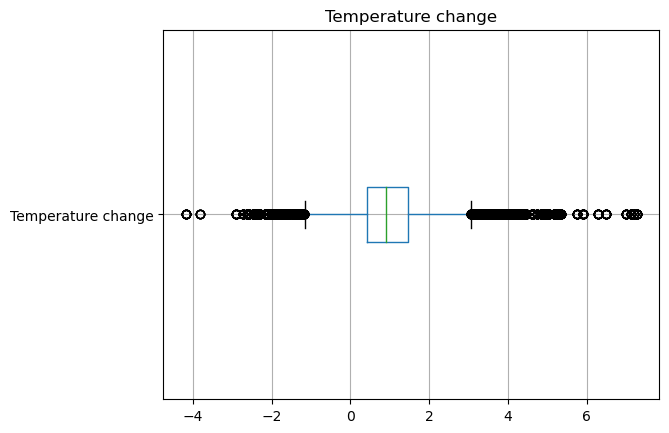

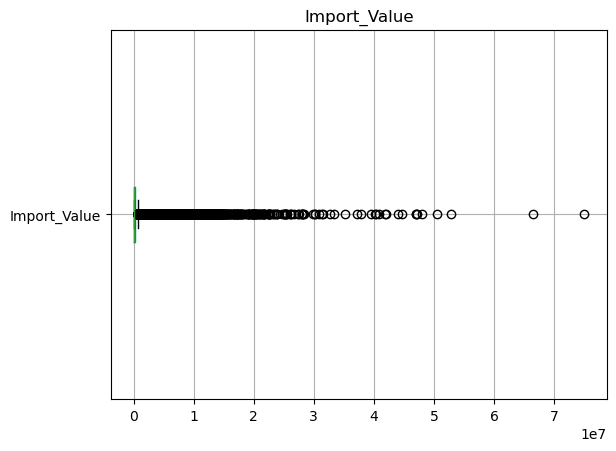

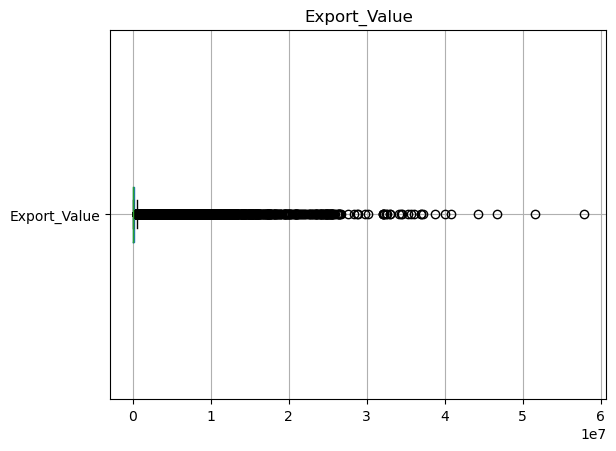

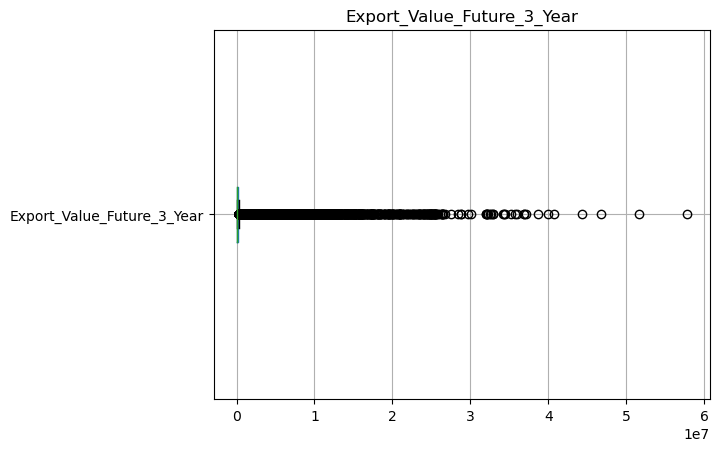

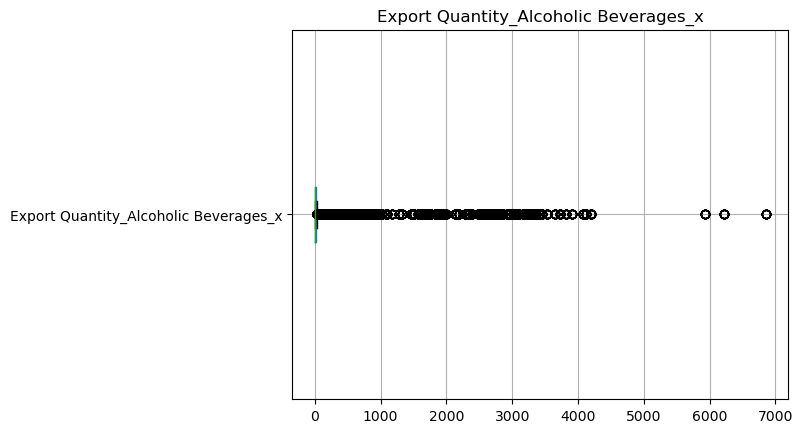

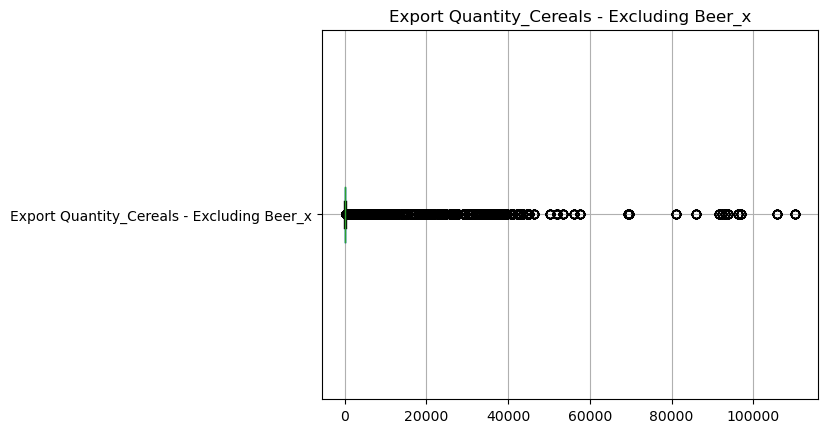

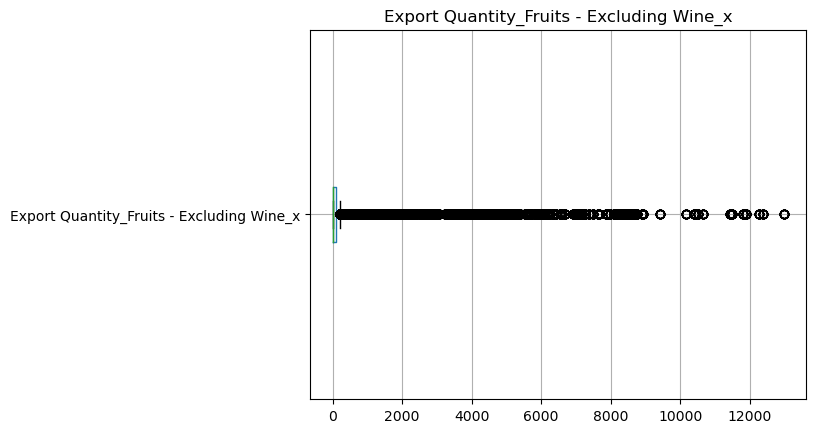

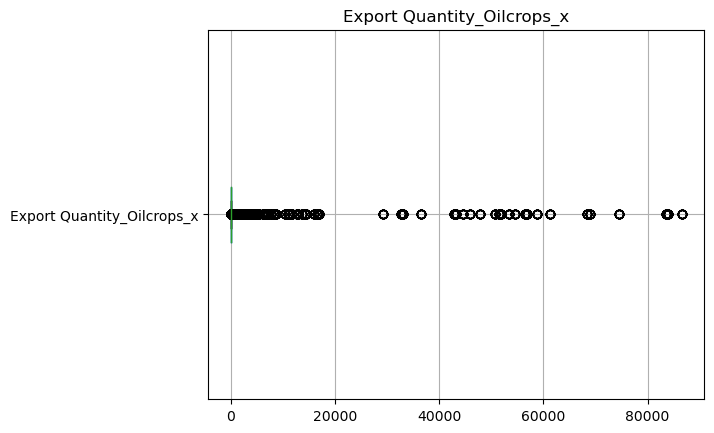

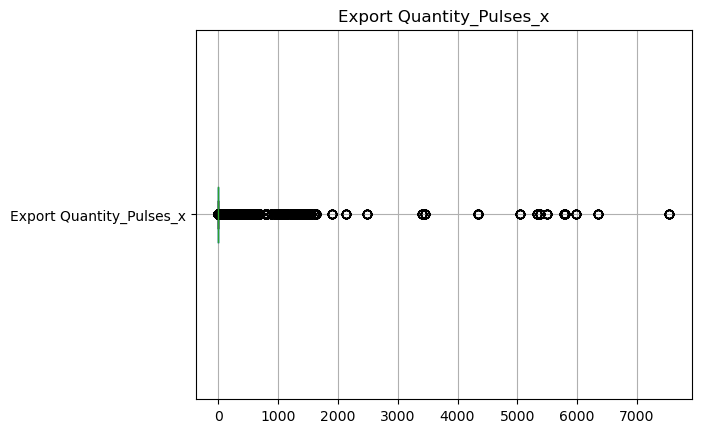

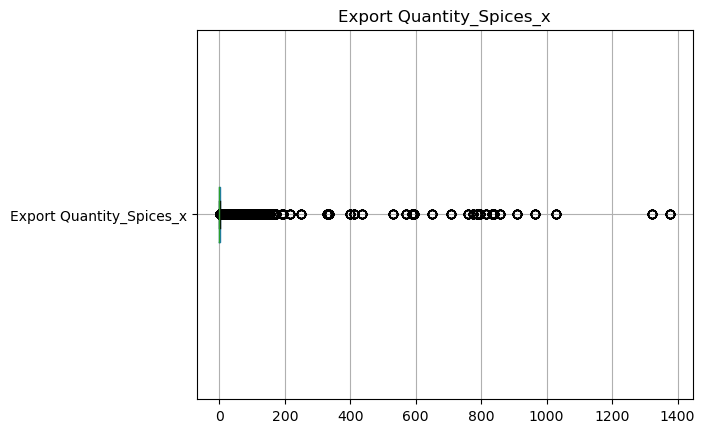

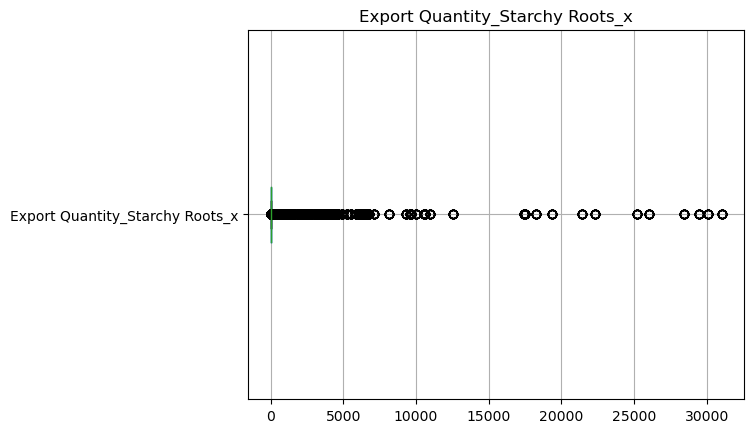

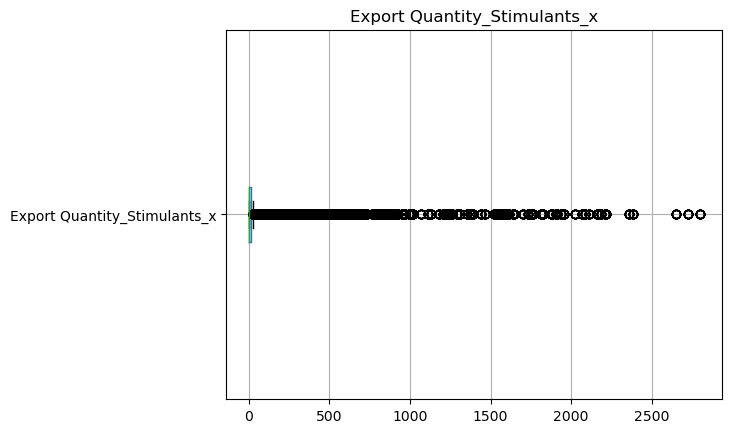

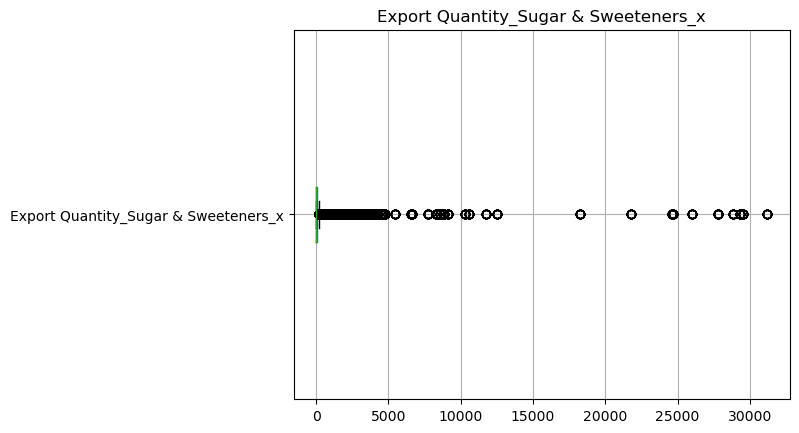

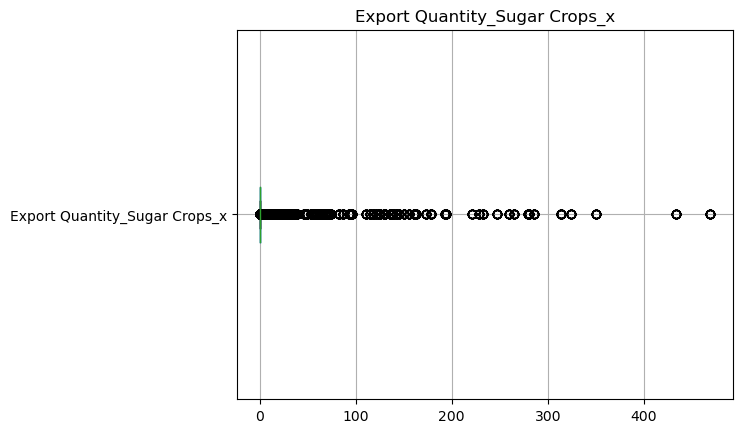

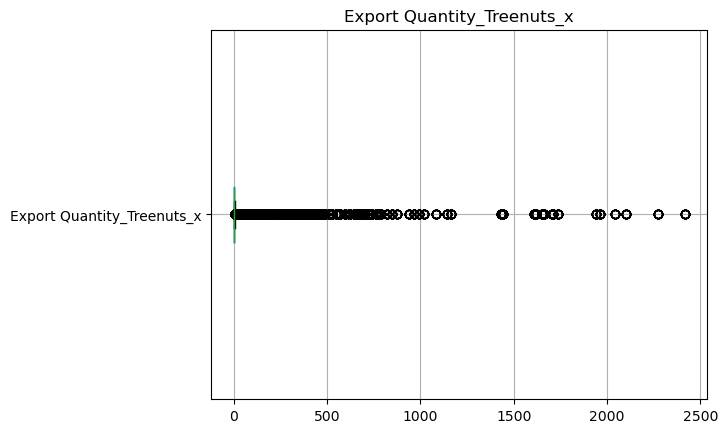

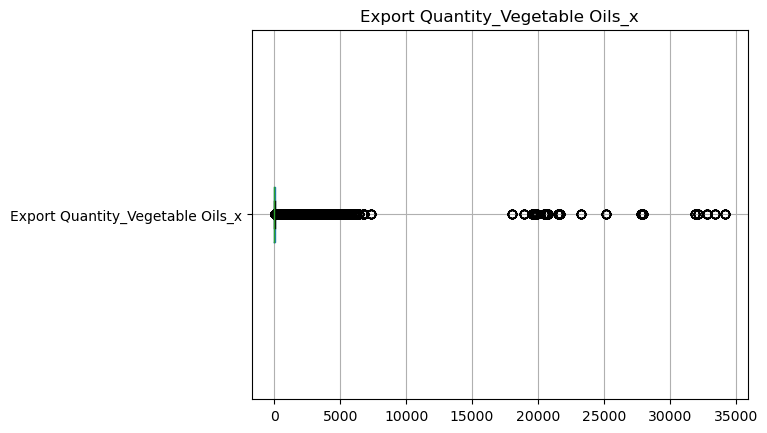

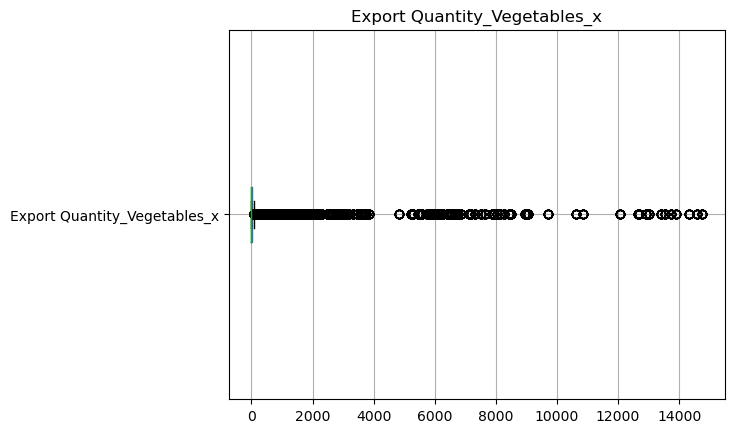

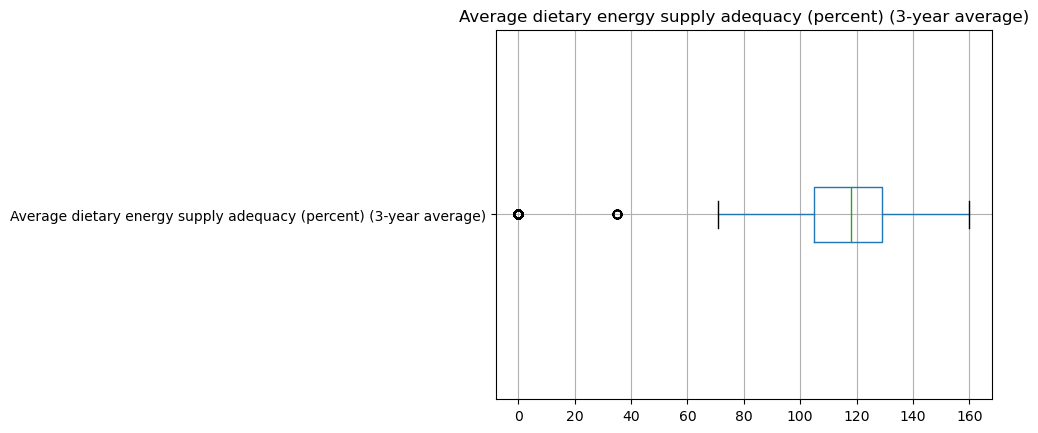

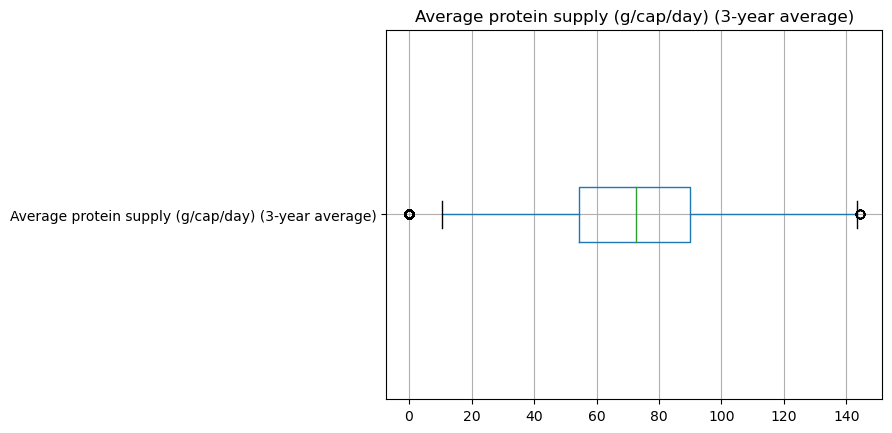

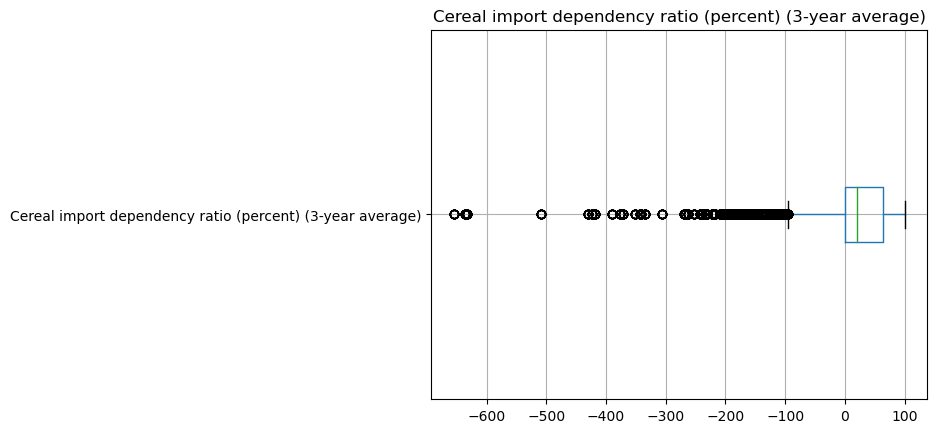

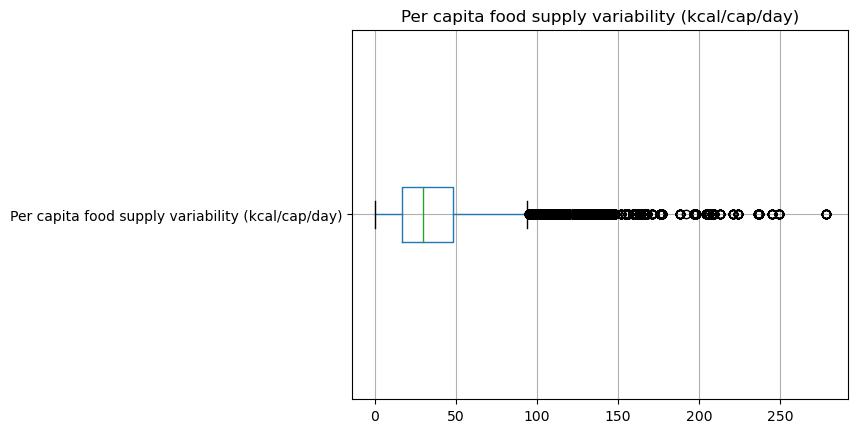

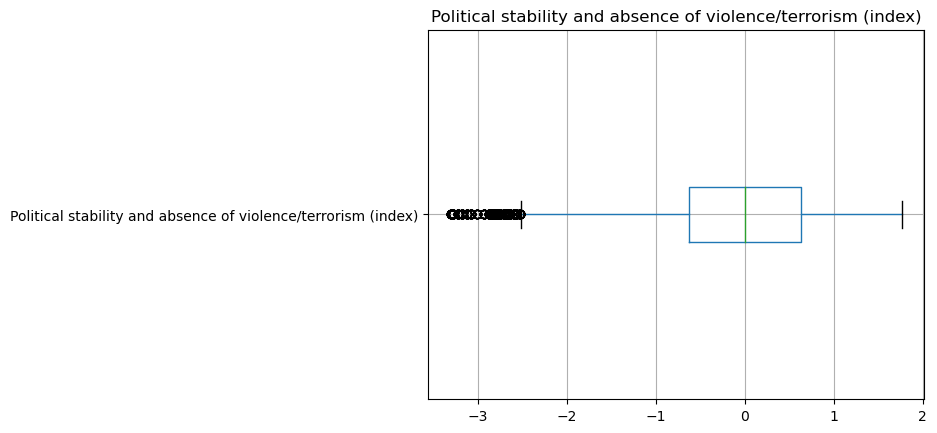

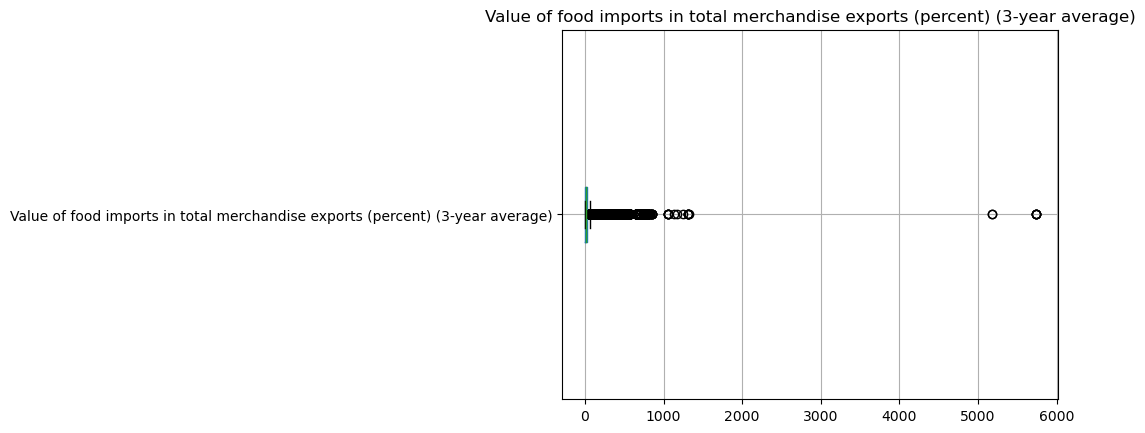

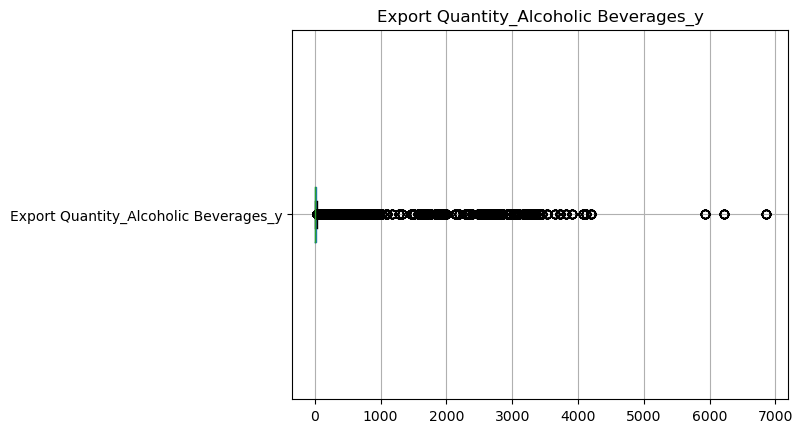

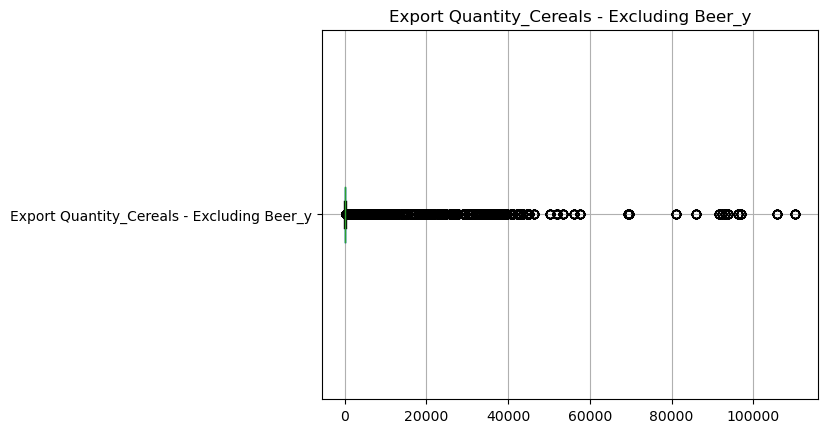

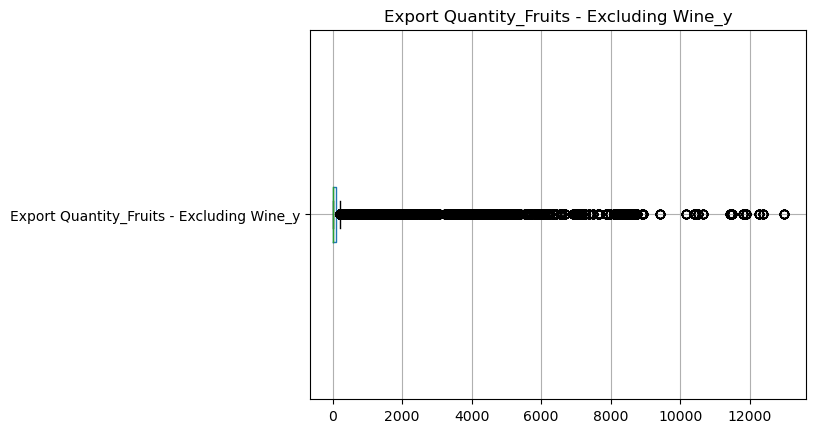

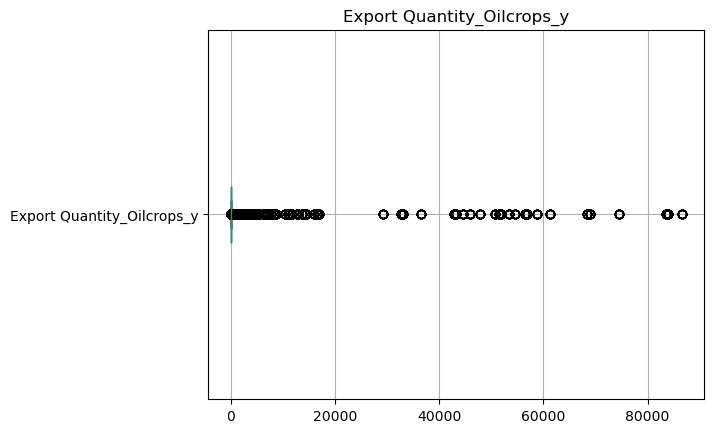

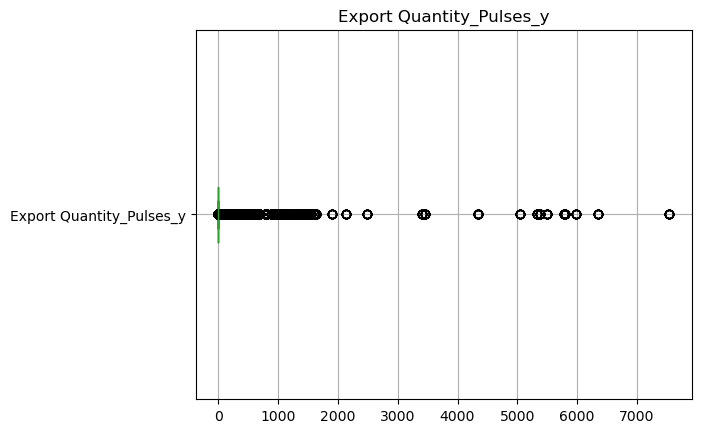

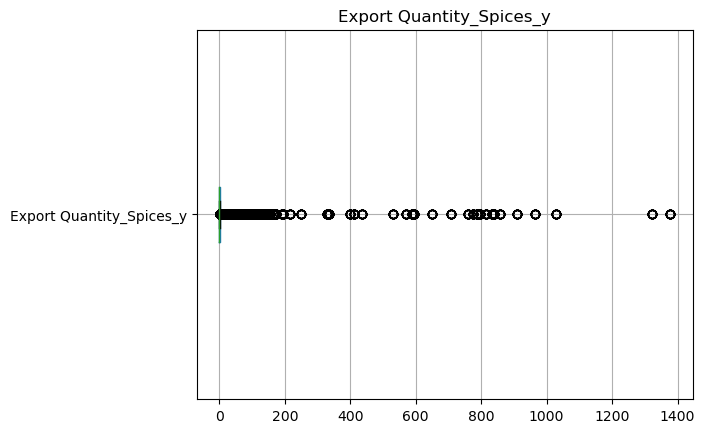

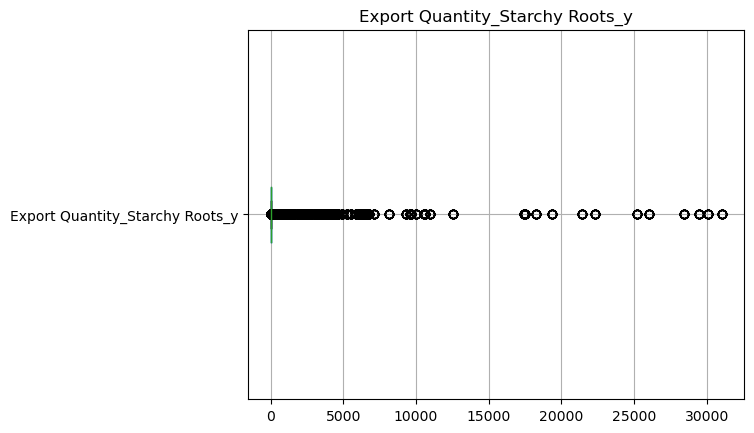

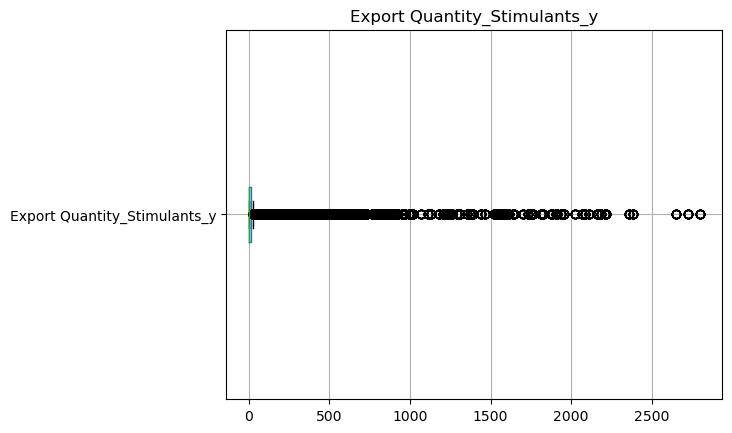

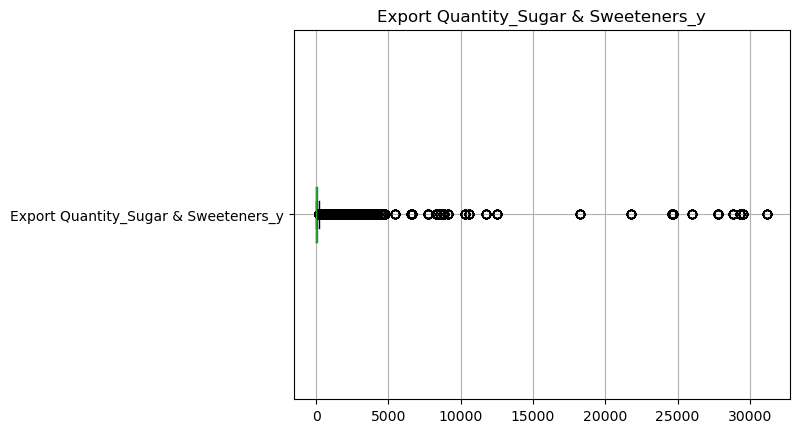

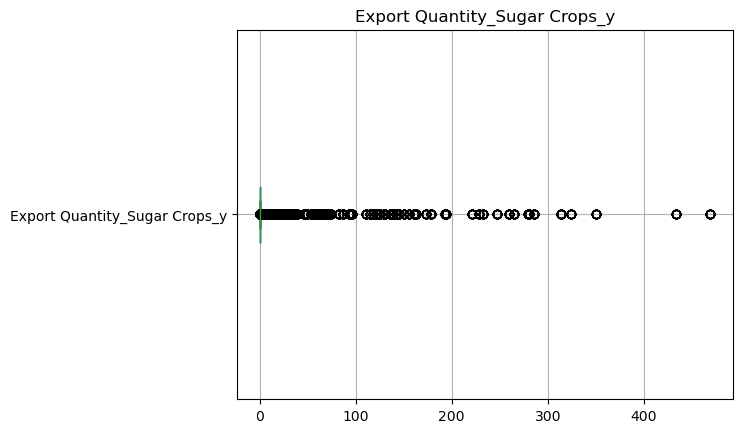

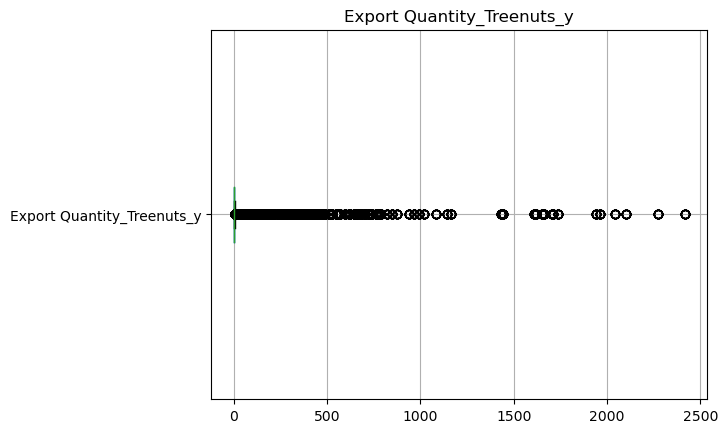

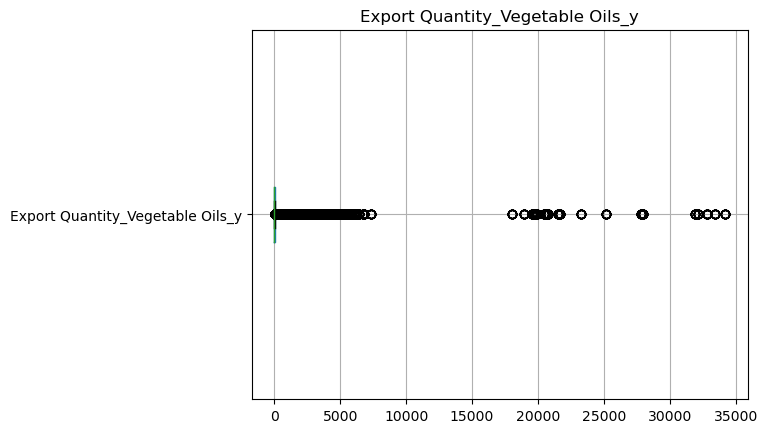

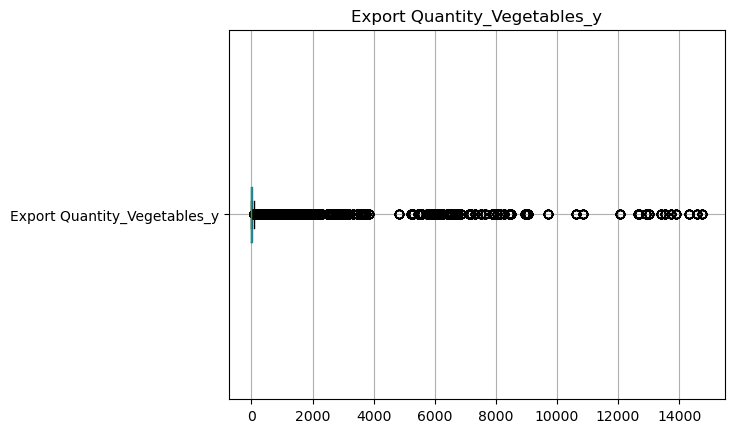

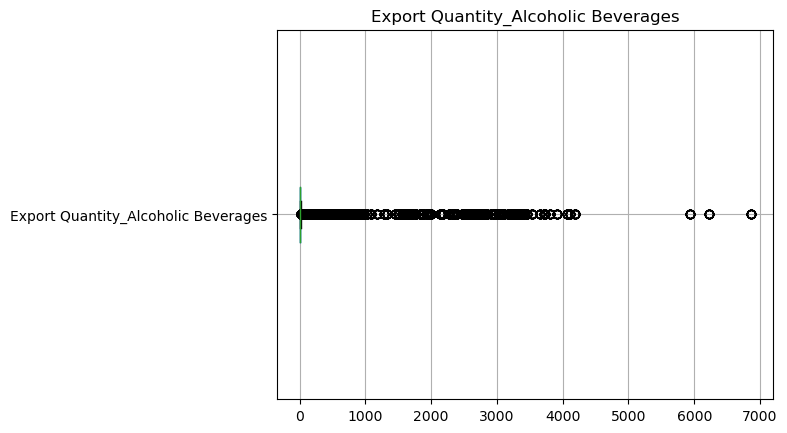

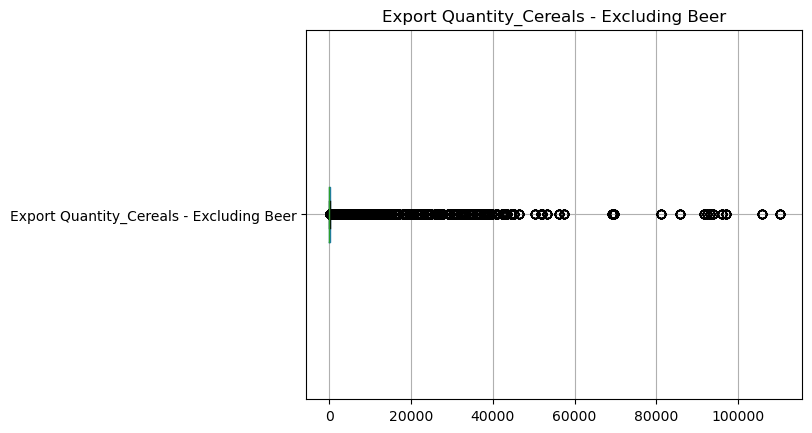

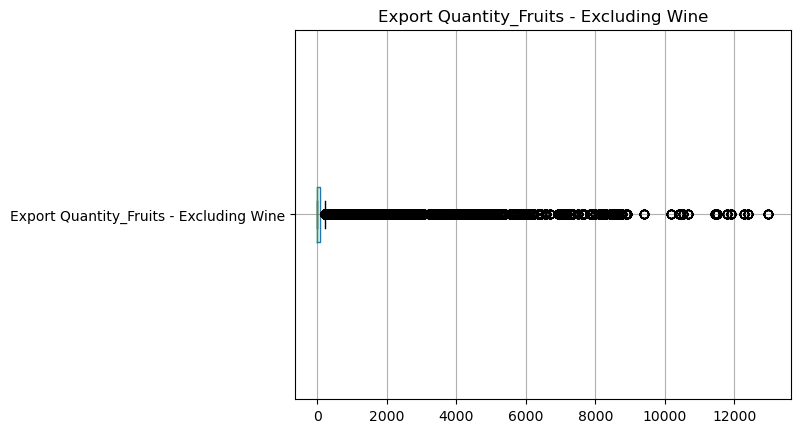

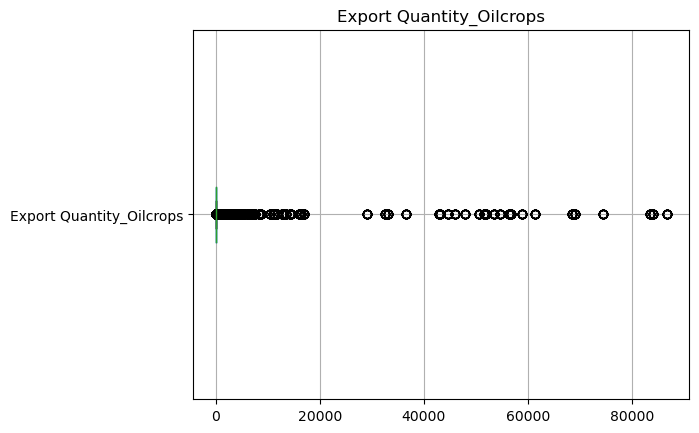

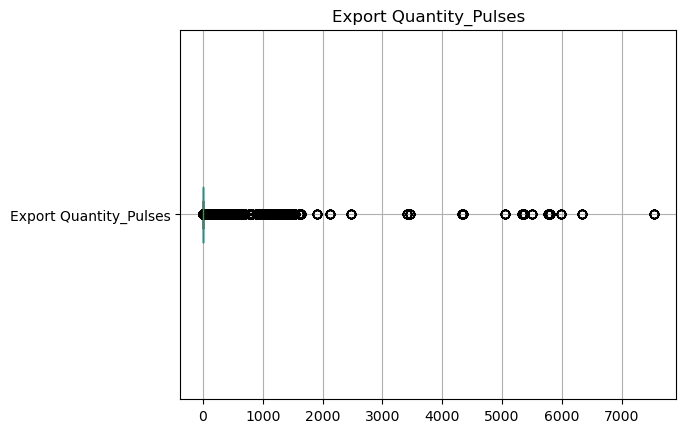

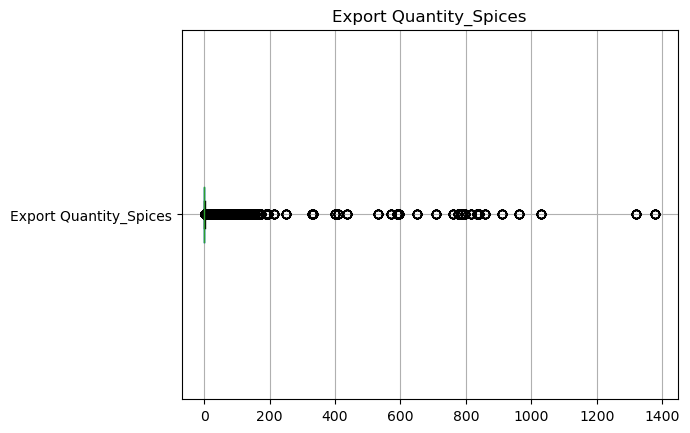

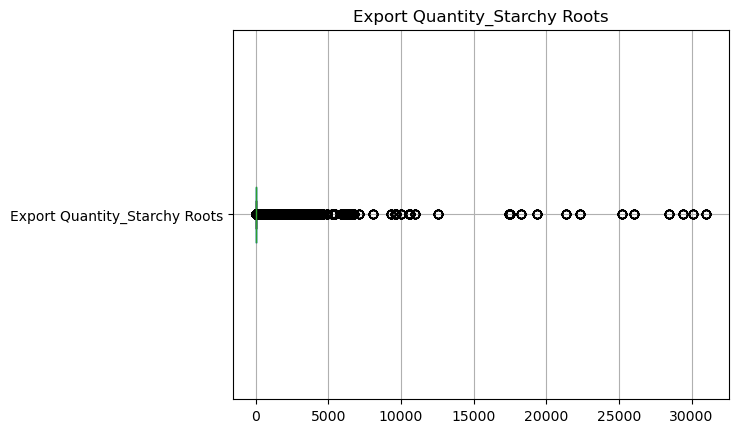

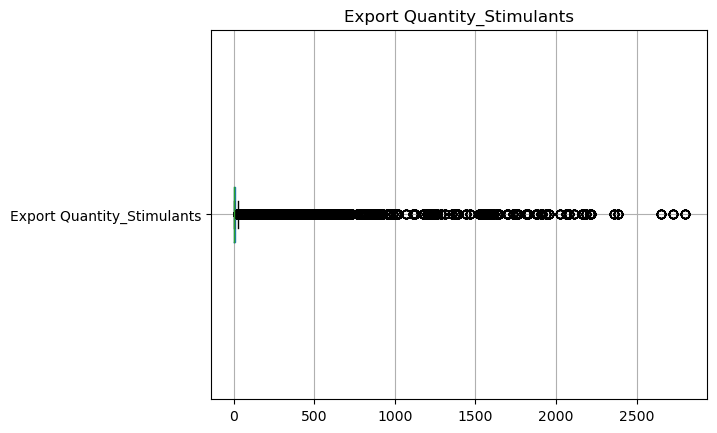

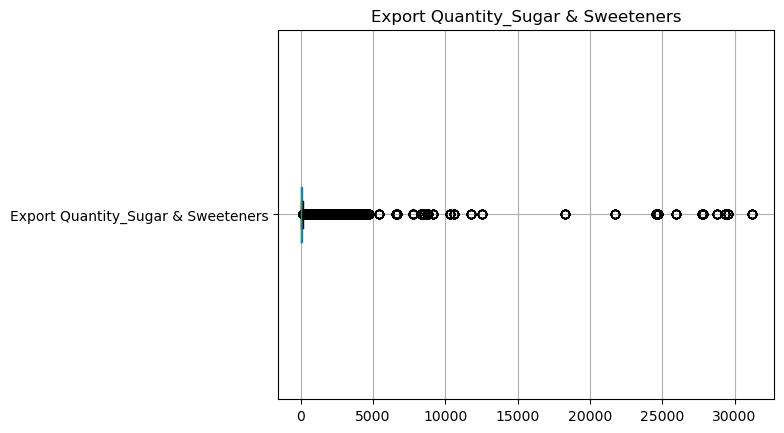

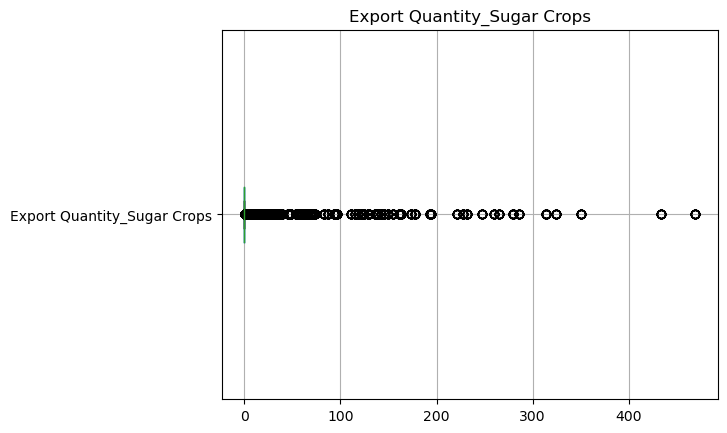

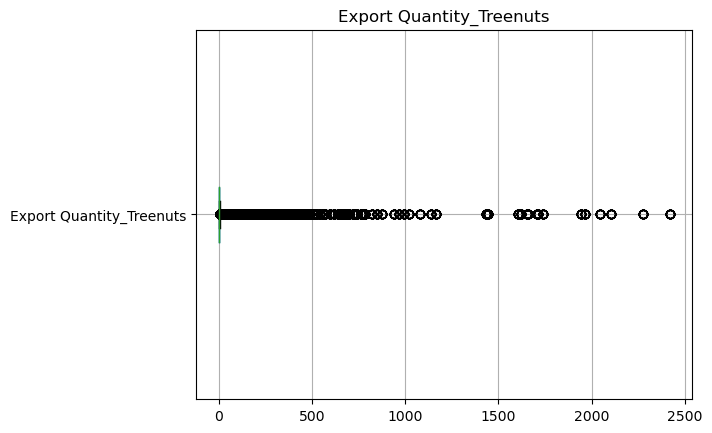

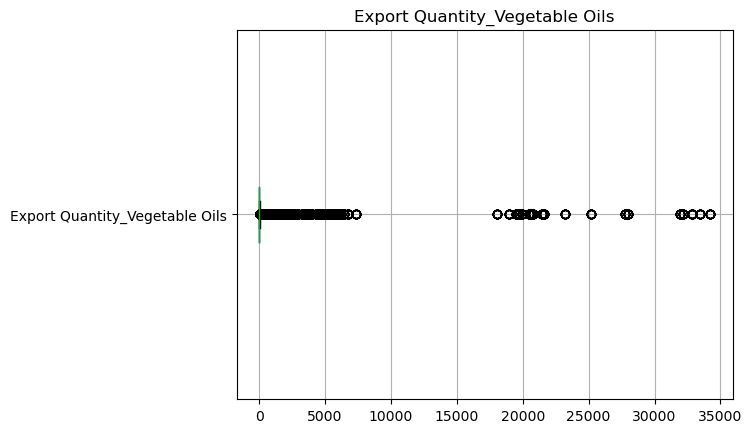

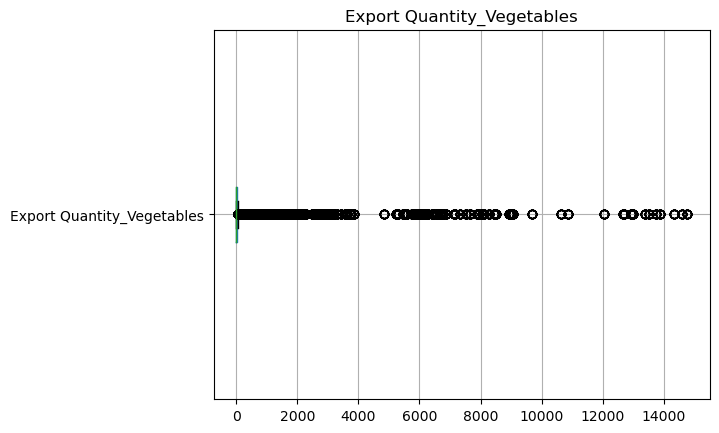

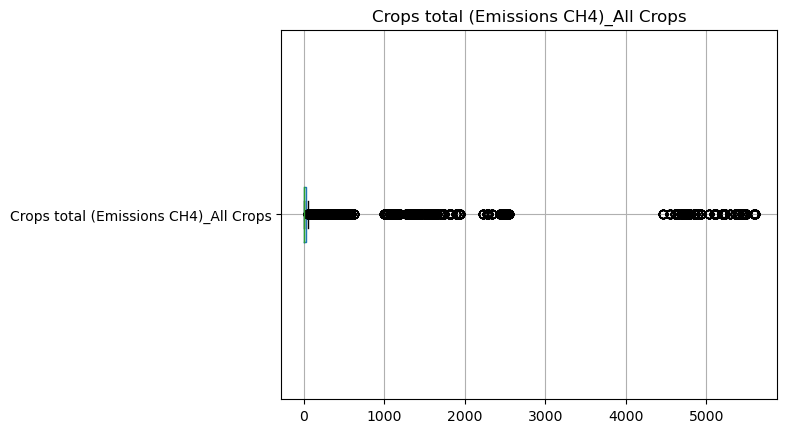

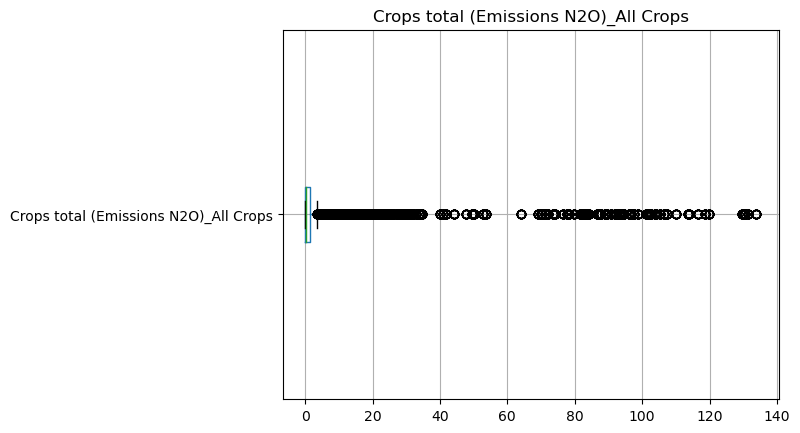

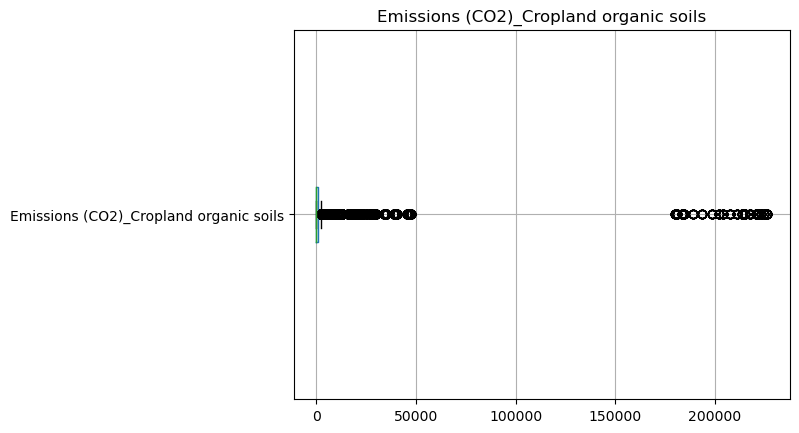

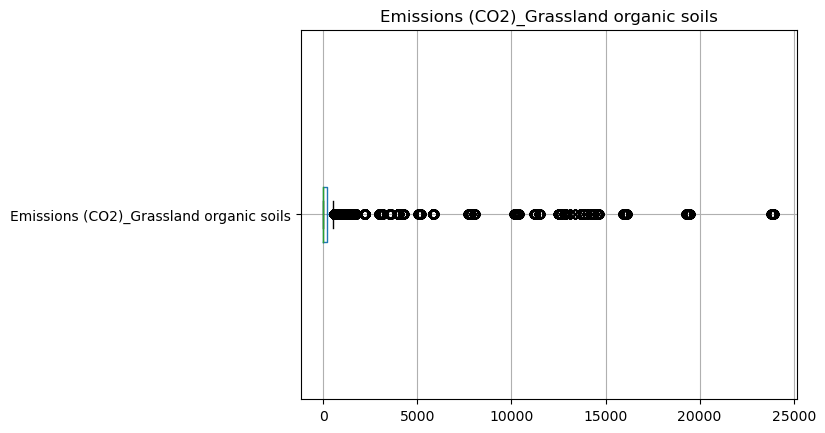

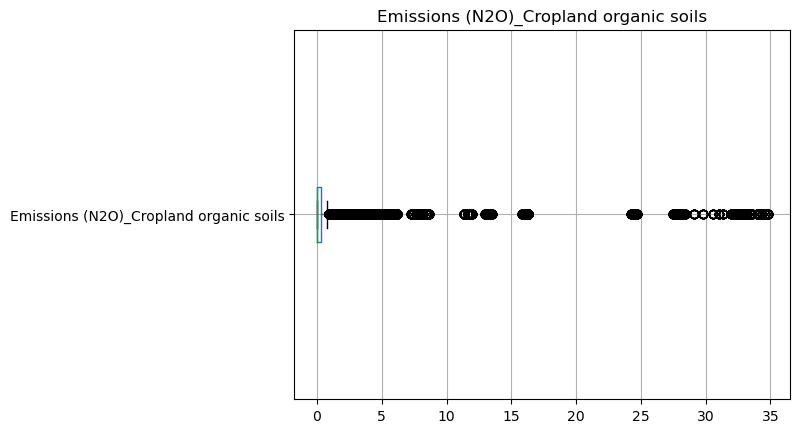

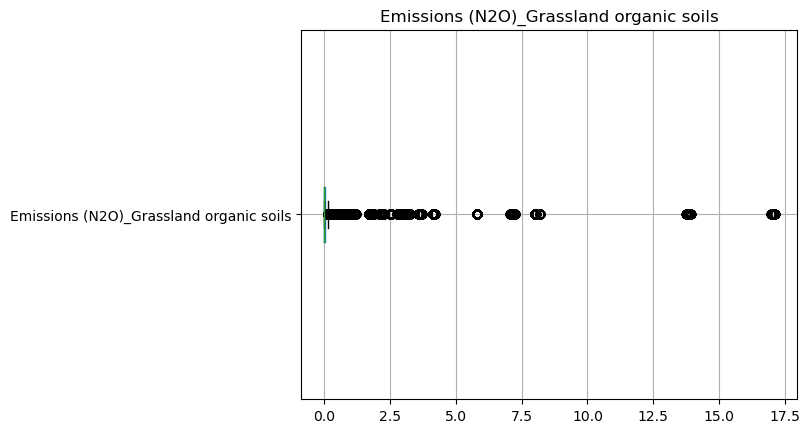

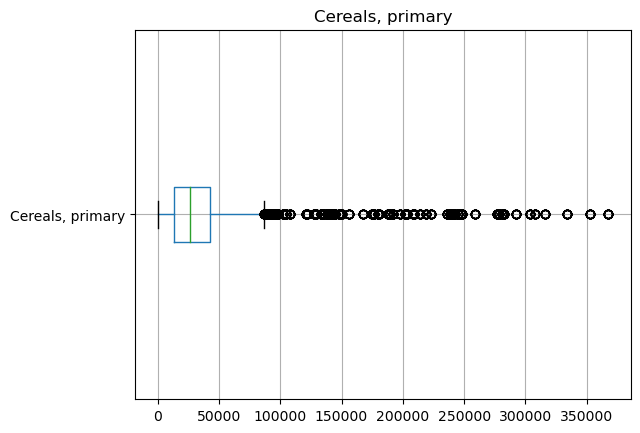

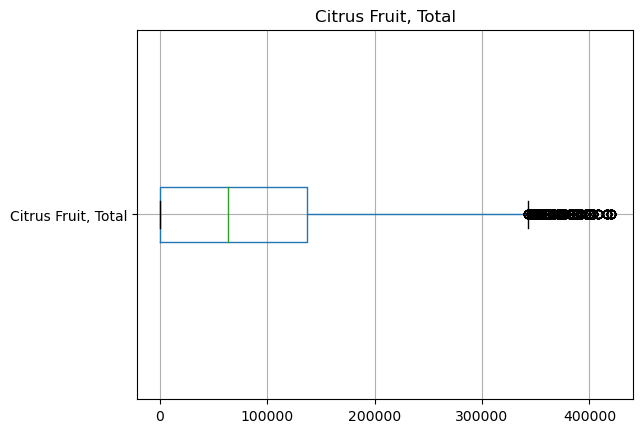

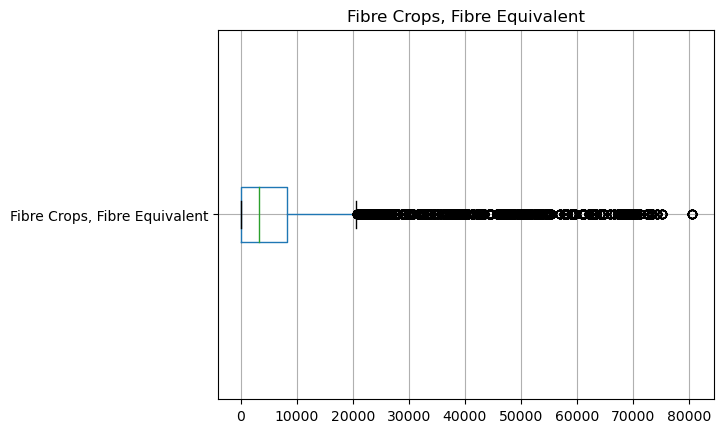

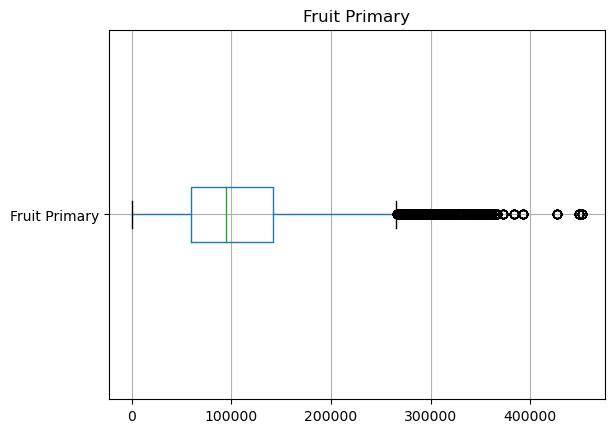

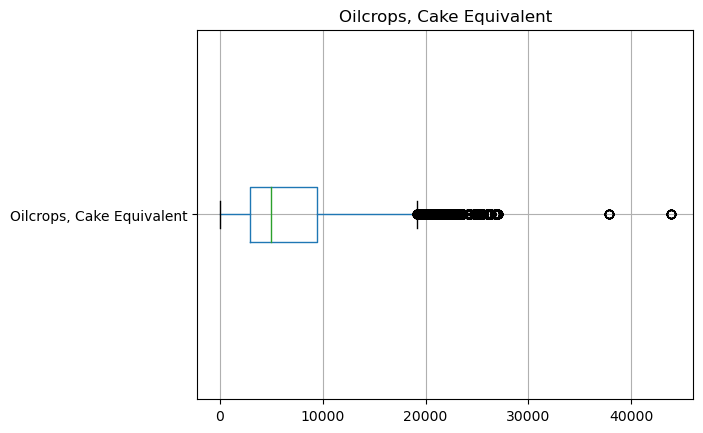

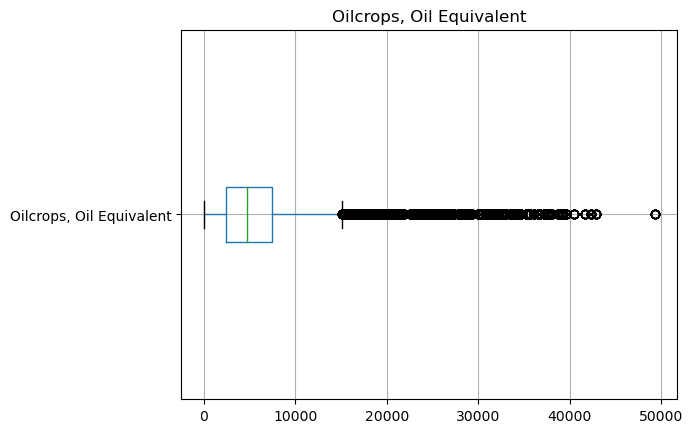

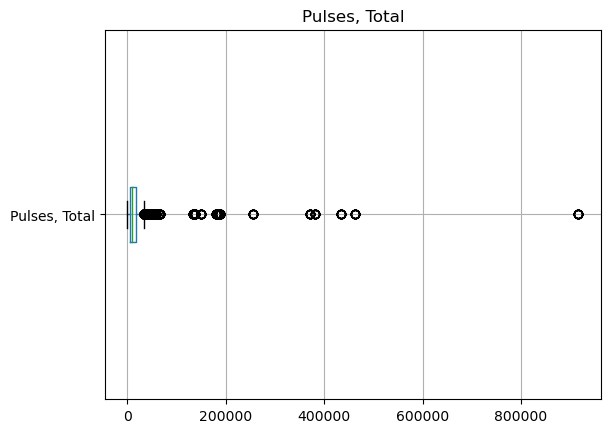

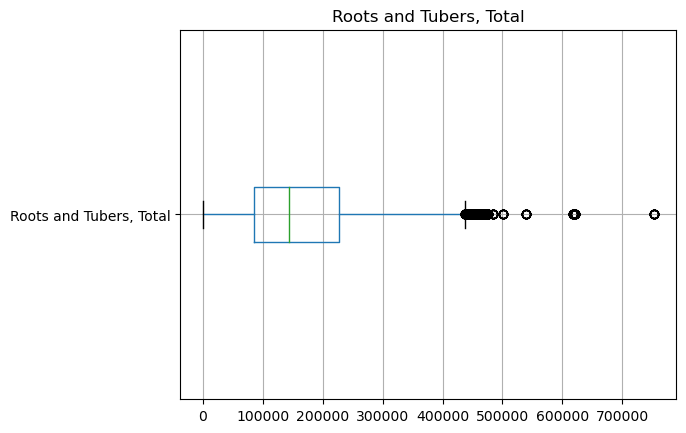

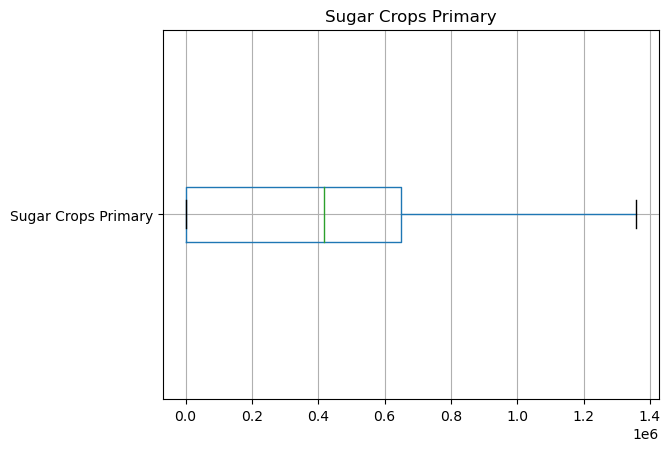

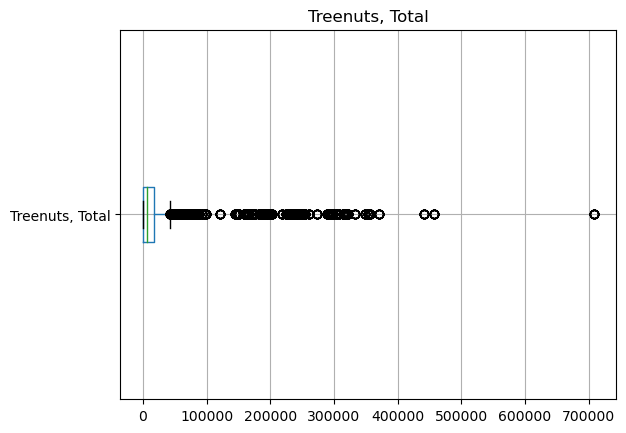

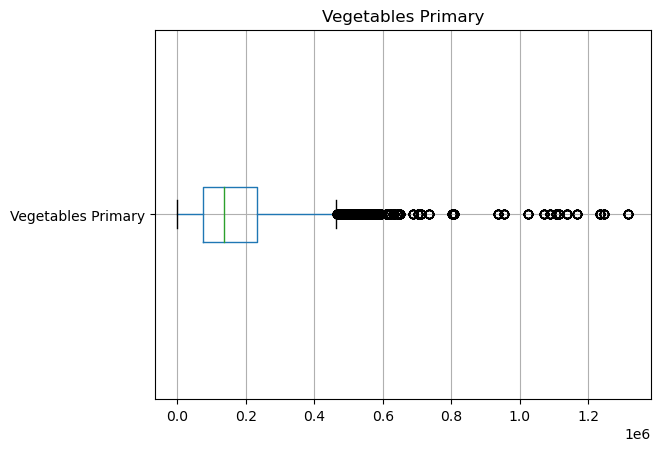

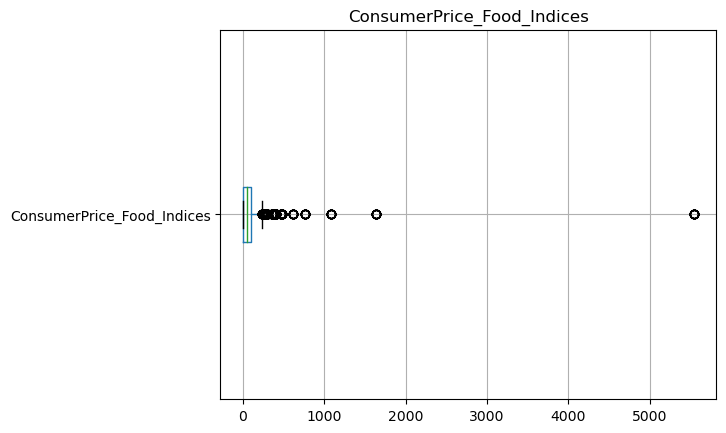

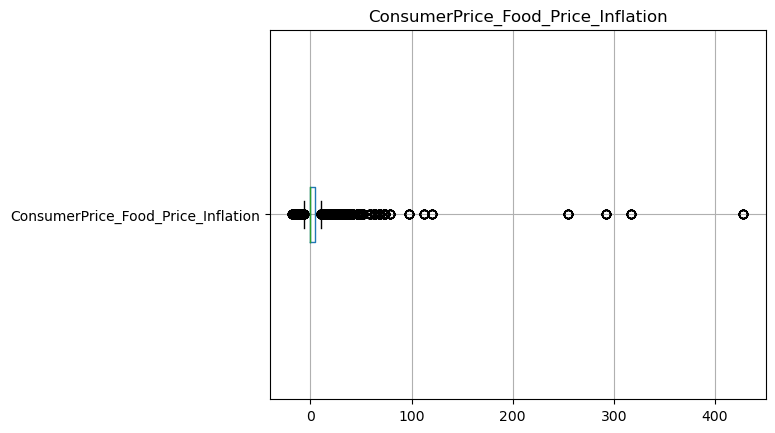

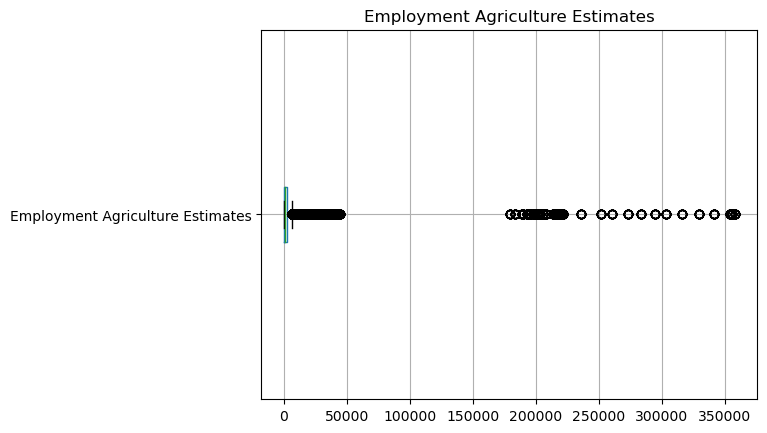

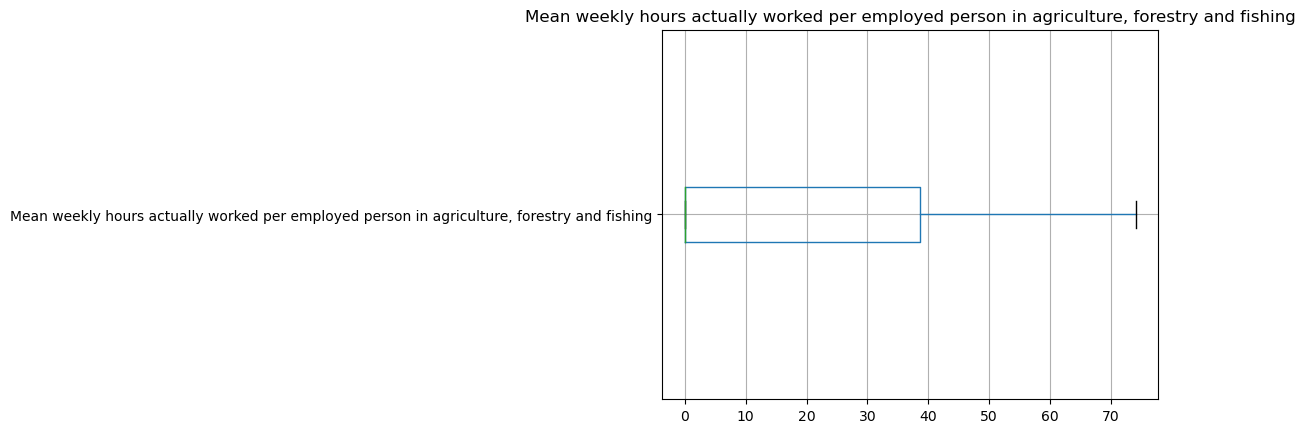

In [33]:
for col in numeric_columns:  
    df_merged.boxplot(column=col, vert=False)  # Specify column argument here and set vert to False
    plt.title(col)
    plt.show()


In [34]:
df_merged

Area  Year  FDI inflows to Agriculture, Forestry and Fishing  \
0      Afghanistan  2000                                               0.0   
1      Afghanistan  2000                                               0.0   
2      Afghanistan  2000                                               0.0   
3      Afghanistan  2000                                               0.0   
4      Afghanistan  2000                                               0.0   
...            ...   ...                                               ...   
48522     Zimbabwe  2022                                               0.0   
48523     Zimbabwe  2022                                               0.0   
48524     Zimbabwe  2022                                               0.0   
48525     Zimbabwe  2022                                               0.0   
48526     Zimbabwe  2022                                               0.0   

       FDI inflows to Food, Beverages and Tobacco  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
48522                                         0.0   
48523                                         0.0   
48524                                         0.0   
48525                                         0.0   
48526                                         0.0   

       FDI outflows to Agriculture, Forestry and Fishing  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
48522                                                0.0   
48523                                                0.0   
48524                                                0.0   
48525                                                0.0   
48526                                                0.0   

       FDI outflows to Food, Beverages and Tobacco  Total FDI inflows  \
0                                              0.0               0.17   
1                                              0.0               0.17   
2                                              0.0               0.17   
3                                              0.0               0.17   
4                                              0.0               0.17   
...                                            ...                ...   
48522                                          0.0             341.50   
48523                                          0.0             341.50   
48524                                          0.0             341.50   
48525                                          0.0             341.50   
48526                                          0.0             341.50   

       Total FDI outflows  Agricultural land  Agriculture  \
0                     0.0            37794.0      37794.0   
1                     0.0            37794.0      37794.0   
2                     0.0            37794.0      37794.0   
3                     0.0            37794.0      37794.0   
4                     0.0            37794.0      37794.0   
...                   ...                ...          ...   
48522                17.0                0.0          0.0   
48523                17.0                0.0          0.0   
48524                17.0                0.0          0.0   
48525                17.0                0.0          0.0   
48526                17.0                0.0          0.0   

       Agriculture area actually irrigated  Arable land  Country area  \
0                                   

Drop text columns

In [35]:
df_merged.drop('Item', axis=1, inplace=True)
df_merged.drop('Area', axis=1, inplace=True)
df_merged.drop('Year', axis=1, inplace=True)

## Handling Outlier

In [36]:
# Calculate the Z-scores for each data point
z_scores = (df_merged - df_merged.mean()) / df_merged.std()

# Identify data points that are outliers (if the Z-score exceeds a certain threshold)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers from the DataFrame
df_merged = df_merged[~outliers.any(axis=1)]

# Section 2: Features And Lable

In [37]:
X = df_merged.drop(columns=['Export_Value_Future_3_Year'])
y = df_merged['Export_Value_Future_3_Year']

# Initialize the model
model = ExtraTreesRegressor()

# Fit the model
model.fit(X, y)

# Plotting the top 19 features by importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(19)  # Select top 19 features

# Keep the top 19 features
selected_features = top_features.index

# Add 'Export_Value_Future_3_Year' to the selected features
selected_features = ['Export_Value_Future_3_Year'] + list(selected_features)

# Select the top 19 features including 'Export_Value_Future_3_Year'
df_selected = df_merged[selected_features]

# Print the selected features
df_selected

Export_Value_Future_3_Year  Export_Value  \
0                         47612.0      31080.00   
1                          7534.0      10300.00   
2                          3636.0       1715.00   
3                             0.0          0.00   
4                             0.0          0.00   
...                           ...           ...   
48522                         0.0        270.43   
48523                         0.0    1075098.72   
48524                         0.0      31469.38   
48525                         0.0      27722.63   
48526                         0.0     998057.60   

       Average protein supply (g/cap/day) (3-year average)  Import_Value  \
0                                                   51.4         3625.00   
1                                                   51.4        13000.00   
2                                                   51.4        88200.00   
3                                                   51.4        14200.00   
4                                                   51.4        13000.00   
...                                                  ...             ...   
48522                                                0.0        14181.34   
48523                                                0.0       137610.78   
48524                                                0.0       111122.41   
48525                                                0.0        27105.89   
48526                                                0.0        27138.09   

       Per capita food supply variability (kcal/cap/day)  \
0                                                   58.0   
1                                                   58.0   
2                                                   58.0   
3                                                   58.0   
4                                                   58.0   
...                                                  ...   
48522                                                0.0   
48523                                                0.0   
48524                                                0.0   
48525                                                0.0   
48526                                                0.0   

       Mean weekly hours actually worked per employed person in agriculture, forestry and fishing  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
48522                                                0.0                                            
48523                                                0.0                                            
48524                                                0.0                                            
48525                                                0.0                                            
48526                                                0.0                                            

       Roots and Tubers, Total  Land area equipped for irrigation  \
0                     167857.0                             3203.0   
1                     167857.0                             3203.0   
2                     167857.0                             3203.0   
3                     167857.0                             3203.0   
4                     167857.0                             3203.0   
...                        ...                                ...   
48522                  44479.0                                0.

In [38]:
df_selected = pd.get_dummies(df_selected, drop_first=True)

# Exploratory Data Analysis

In [39]:
corr = df_selected.corr()
styled_corr = corr.style.background_gradient(cmap='coolwarm').format(precision=2)
styled_corr

In [40]:
# Loại bỏ các cột từ DataFrame df_selected
columns_to_drop = ["Cropland"]
df_selected = df_selected.drop(columns_to_drop, axis=1)

# In ra DataFrame sau khi loại bỏ các cột
df_selected

Export_Value_Future_3_Year  Export_Value  \
0                         47612.0      31080.00   
1                          7534.0      10300.00   
2                          3636.0       1715.00   
3                             0.0          0.00   
4                             0.0          0.00   
...                           ...           ...   
48522                         0.0        270.43   
48523                         0.0    1075098.72   
48524                         0.0      31469.38   
48525                         0.0      27722.63   
48526                         0.0     998057.60   

       Average protein supply (g/cap/day) (3-year average)  Import_Value  \
0                                                   51.4         3625.00   
1                                                   51.4        13000.00   
2                                                   51.4        88200.00   
3                                                   51.4        14200.00   
4                                                   51.4        13000.00   
...                                                  ...             ...   
48522                                                0.0        14181.34   
48523                                                0.0       137610.78   
48524                                                0.0       111122.41   
48525                                                0.0        27105.89   
48526                                                0.0        27138.09   

       Per capita food supply variability (kcal/cap/day)  \
0                                                   58.0   
1                                                   58.0   
2                                                   58.0   
3                                                   58.0   
4                                                   58.0   
...                                                  ...   
48522                                                0.0   
48523                                                0.0   
48524                                                0.0   
48525                                                0.0   
48526                                                0.0   

       Mean weekly hours actually worked per employed person in agriculture, forestry and fishing  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
48522                                                0.0                                            
48523                                                0.0                                            
48524                                                0.0                                            
48525                                                0.0                                            
48526                                                0.0                                            

       Roots and Tubers, Total  Land area equipped for irrigation  \
0                     167857.0                             3203.0   
1                     167857.0                             3203.0   
2                     167857.0                             3203.0   
3                     167857.0                             3203.0   
4                     167857.0                             3203.0   
...                        ...                                ...   
48522                  44479.0                                0.

In [41]:
corr = df_selected.corr()
styled_corr = corr.style.background_gradient(cmap='coolwarm').format(precision=2)
styled_corr

# Recording Lable

In [42]:
# Calculate the mean of the 'Export_Value' column
export_value_stats = df_selected['Export_Value_Future_3_Year'].describe().astype(int)

export_value_stats

count      25223
mean      143842
std       459984
min            0
25%           45
50%         5606
75%        74336
max      6653721
Name: Export_Value_Future_3_Year, dtype: int64

In [43]:
export_value_mean = df_selected['Export_Value_Future_3_Year'].mean()

print("Mean Export Value: {:.2f}".format(export_value_mean))

Mean Export Value: 143842.73


In [44]:
# Set values greater than or equal to 506827 to 1 and less than to 0
df_selected['Export_Value_Future_3_Year'] = (df_selected['Export_Value_Future_3_Year'] >= 143842).astype(int)

# Verify the changes
df_selected['Export_Value_Future_3_Year'].value_counts()

df_selected

Export_Value_Future_3_Year  Export_Value  \
0                               0      31080.00   
1                               0      10300.00   
2                               0       1715.00   
3                               0          0.00   
4                               0          0.00   
...                           ...           ...   
48522                           0        270.43   
48523                           0    1075098.72   
48524                           0      31469.38   
48525                           0      27722.63   
48526                           0     998057.60   

       Average protein supply (g/cap/day) (3-year average)  Import_Value  \
0                                                   51.4         3625.00   
1                                                   51.4        13000.00   
2                                                   51.4        88200.00   
3                                                   51.4        14200.00   
4                                                   51.4        13000.00   
...                                                  ...             ...   
48522                                                0.0        14181.34   
48523                                                0.0       137610.78   
48524                                                0.0       111122.41   
48525                                                0.0        27105.89   
48526                                                0.0        27138.09   

       Per capita food supply variability (kcal/cap/day)  \
0                                                   58.0   
1                                                   58.0   
2                                                   58.0   
3                                                   58.0   
4                                                   58.0   
...                                                  ...   
48522                                                0.0   
48523                                                0.0   
48524                                                0.0   
48525                                                0.0   
48526                                                0.0   

       Mean weekly hours actually worked per employed person in agriculture, forestry and fishing  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
48522                                                0.0                                            
48523                                                0.0                                            
48524                                                0.0                                            
48525                                                0.0                                            
48526                                                0.0                                            

       Roots and Tubers, Total  Land area equipped for irrigation  \
0                     167857.0                             3203.0   
1                     167857.0                             3203.0   
2                     167857.0                             3203.0   
3                     167857.0                             3203.0   
4                     167857.0                             3203.0   
...                        ...                                ...   
48522                  44479.0                                0.

In [45]:
df_selected['Export_Value_Future_3_Year'].value_counts()

Export_Value_Future_3_Year
0    20669
1     4554
Name: count, dtype: int64

In [46]:
df_selected = pd.get_dummies(df_selected, drop_first=True)

# Scaling/normalization

## Selecting training, validation, and test sets

In [47]:
# Assume df_merged is your DataFrame
data = df_selected

# Define X and y
X = data.drop(columns=['Export_Value_Future_3_Year'])  # Remove 'Export_Value_Future_3_Year' column from features
y = data['Export_Value_Future_3_Year']  # Set 'Export_Value_Future_3_Year' as target

# Binarize y to convert it into a binary classification problem
binarizer = Binarizer()
y = binarizer.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on training data and transform both training and validation data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the print_scores function
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Trial Testing with several models

In [48]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Print classification report
print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4159
           1       0.85      0.48      0.61       886

    accuracy                           0.89      5045
   macro avg       0.87      0.73      0.78      5045
weighted avg       0.89      0.89      0.88      5045



In [49]:
# Calculate class weights
class_values, class_counts = np.unique(y_train, return_counts=True)
class_weights = dict(zip(class_values, len(y_train) / (len(y_train) * class_counts)))

# Instantiate and train a LogisticRegression with class weights
model = LogisticRegression(random_state=42, class_weight=class_weights)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_preds = model.predict(X_test)

# Define a function to print classification report
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Call the print_scores function with y_test (true labels) and y_preds (predicted labels)
print_scores(y_test, y_preds)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4159
           1       0.38      0.69      0.49       886

    accuracy                           0.75      5045
   macro avg       0.65      0.72      0.66      5045
weighted avg       0.83      0.75      0.77      5045



In [50]:
# Instantiate the RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model
model_RFC.fit(X_train, y_train)

# Make predictions on the validation set
y_preds = model_RFC.predict(X_test)

# Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4159
           1       0.92      0.92      0.92       886

    accuracy                           0.97      5045
   macro avg       0.95      0.95      0.95      5045
weighted avg       0.97      0.97      0.97      5045



In [51]:
# Instantiate the GradientBoostingClassifier
model_GBC = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Fit the model
model_GBC.fit(X_train, y_train)

# Make predictions on the validation set
y_preds = model_GBC.predict(X_test)

# Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4159
           1       0.88      0.91      0.90       886

    accuracy                           0.96      5045
   macro avg       0.93      0.94      0.94      5045
weighted avg       0.96      0.96      0.96      5045



In [52]:
# Instantiate the XGBClassifier
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)

# Fit the model
model_XGB.fit(X_train, y_train)

# Make predictions on the validation set
y_preds = model_XGB.predict(X_test)

# Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4159
           1       0.90      0.92      0.91       886

    accuracy                           0.97      5045
   macro avg       0.94      0.95      0.94      5045
weighted avg       0.97      0.97      0.97      5045



# Handling Undersampling

In [53]:
df_selected_0 = df_selected[df_selected['Export_Value_Future_3_Year'] == 0]
df_selected_1 = df_selected[df_selected['Export_Value_Future_3_Year'] == 1]
df_selected_0.shape, df_selected_1.shape

((20669, 19), (4554, 19))

In [54]:
# Assuming 'Export_Value' is the target column
# Identify the minority and majority classes
minority_class = df_selected[df_selected['Export_Value_Future_3_Year'] == 1]
majority_class = df_selected[df_selected['Export_Value_Future_3_Year'] == 0]

# Determine the size of the minority class
minority_class_size = len(minority_class)

# Sample a subset of the majority class to balance the dataset
majority_class_sampled = majority_class.sample(n=minority_class_size, random_state=42)

# Concatenate the minority class and the sampled majority class
df_selected = pd.concat([minority_class, majority_class_sampled])

# Shuffle the rows of the balanced dataset
df_selected = df_selected.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution in the balanced dataset
print(df_selected['Export_Value_Future_3_Year'].value_counts())

# Now you can use balanced_df for further analysis or modeling

Export_Value_Future_3_Year
0    4554
1    4554
Name: count, dtype: int64


In [55]:
# Assume df_merged is your DataFrame
data = df_selected

# Define X and y
X = data.drop(columns=['Export_Value_Future_3_Year'])  # Remove 'Export_Value_Future_3_Year' column from features
y = data['Export_Value_Future_3_Year']  # Set 'Export_Value_Future_3_Yeare' as target

# Binarize y to convert it into a binary classification problem
binarizer = Binarizer()
y = binarizer.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on training data and transform both training and validation data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the print_scores function
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [56]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Print classification report
print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       914
           1       0.82      0.77      0.80       908

    accuracy                           0.80      1822
   macro avg       0.81      0.80      0.80      1822
weighted avg       0.81      0.80      0.80      1822



In [57]:
!pip install --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7d/d7/fb80c63062b60b1fa5dcb2d4dd3a4e83bd8c68cdc83cf6ff8c016228f184/scikit_learn-1.5.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 17.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpo

# Handling Missing Data

In [58]:
# Import necessary libraries
from imblearn.under_sampling import NearMiss

# Assuming df_merged is your DataFrame
data = df_selected  # Replace df_selected with your actual DataFrame

# Define X and y
X = data.drop(columns=['Export_Value_Future_3_Year'])  # Features
y = data['Export_Value_Future_3_Year']  # Target

# Convert y to numeric if it's not already in numeric format
y = pd.to_numeric(y)

# Initialize NearMiss instance
nm = NearMiss()

# Perform near-miss undersampling
X_res, y_res = nm.fit_resample(X, y)

# Print shape of resampled data
print("Shape of resampled data:")
print("X_res shape:", X_res.shape)
print("y_res shape:", y_res.shape)

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/Users/vuongducthang/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py)

In [ ]:
# Assume df_merged is your DataFrame
data = df_selected

# Define X and y
X = data.drop(columns=['Export_Value_Future_3_Year'])  # Remove 'Export_Value' column from features
y = data['Export_Value_Future_3_Year']  # Set 'Export_Value' as target

# Binarize y to convert it into a binary classification problem
binarizer = Binarizer()
y = binarizer.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on training data and transform both training and validation data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the print_scores function
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [ ]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Print classification report
print_scores(y_test, y_pred)

# Section 3: Building and evaluating a multilayer perceptron (MLP)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers, callbacks
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

n_classes = 2

# Split the data into features and labels
X = df_selected.drop(columns=['Export_Value_Future_3_Year'])
y = df_selected['Export_Value_Future_3_Year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(256, activation='relu',
                 input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu',
                 input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu',
                 input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(n_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# add early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(
    X_test, y_test,
    verbose=0
)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Check if validation loss is available and plot it
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Section 4: Performance of the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming model is already trained and df_selected contains test data

# Generate predictions on the test data
predictions = model.predict(df_selected.drop(columns=['Export_Value_Future_3_Year']))
predicted_classes = np.argmax(predictions, axis=1)
true_labels = df_selected['Export_Value_Future_3_Year'].values

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
conf_matrix = confusion_matrix(true_labels, predicted_classes)
class_report = classification_report(true_labels, predicted_classes)

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the results to a CSV file
results_df = pd.DataFrame({
'Id': range(1, len(predicted_classes) + 1), 'True_Label': true_labels, 'Predicted_Class': predicted_classes,
})
results_df.to_csv('classification_results.csv', index=False)